In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils import weight_norm
import torch.utils.data as Data
import torch.optim as optim
import matplotlib.pyplot as plt
import sklearn.metrics as MK
from matplotlib import rcParams
from torchsummary import summary
import pywt
device = torch.device('cpu')

In [2]:
x = np.array(pd.read_excel(r'F:\OneDrive\桌面\混合气体差分谱.xlsx'))
print(x.shape)

(3300, 500)


In [3]:
# def normalization(x):     
#     data = []
#     for i in x:
#         shuju = (i-np.min(i))/(np.max(i)-np.min(i))
#         data.append(shuju)
#     return np.array(data)
# x = normalization(x)

In [4]:
pp = np.ones(100)
y1 = pp*0
y2 = pp*0
y3 = pp*0
y4 = pp*0
y5 = pp*0
y6 = pp*0
y7 = pp*0
y8 = pp*0
y9 = pp*0.1
y10 = pp*0.5
y11 = pp*6
y12 = pp*10
y13 = pp*8
y14 = pp*2
y15 = pp*6
y16 = pp*4
y17 = pp*0.5
y18 = pp*2
y19 = pp*0.1
y20 = pp*4
y21 = pp*0
y22 = pp*0
y23 = pp*0
y24 = pp*0
y25 = pp*8
y26 = pp*10
y27 = pp*6
y28 = pp*4
y29 = pp*2
y30 = pp*0.5
y31 = pp*8
y32 = pp*10
y33 = pp*0.1
ySO2 = np.r_[y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20,y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33]

pp = np.ones(100)
yy1 = pp*0
yy2 = pp*0
yy3 = pp*0
yy4 = pp*0
yy5 = pp*0.1
yy6 = pp*0.5
yy7 = pp*4
yy8 = pp*6
yy9 = pp*0
yy10 = pp*0
yy11 = pp*0
yy12 = pp*0
yy13 = pp*0.5
yy14 = pp*4
yy15 = pp*0.1
yy16 = pp*2
yy17 = pp*0
yy18 = pp*0
yy19 = pp*0
yy20 = pp*0
yy21 = pp*6
yy22 = pp*10
yy23 = pp*2
yy24 = pp*8
yy25 = pp*2
yy26 = pp*8
yy27 = pp*10
yy28 = pp*10
yy29 = pp*0.5
yy30 = pp*6
yy31 = pp*0.1
yy32 = pp*8
yy33 = pp*4
yCS2 = np.r_[yy1,yy2,yy3,yy4,yy5,yy6,yy7,yy8,yy9,yy10,yy11,yy12,yy13,yy14,yy15,yy16,yy17,yy18,yy19,yy20,yy21,yy22,yy23,yy24,yy25,yy26,yy27,yy28,yy29,yy30,yy31,yy32,yy33]

pp = np.ones(100)
yyy1 = pp*0.1
yyy2 = pp*0.5
yyy3 = pp*2
yyy4 = pp*8
yyy5 = pp*0
yyy6 = pp*0
yyy7 = pp*0
yyy8 = pp*0
yyy9 = pp*0
yyy10 = pp*0
yyy11 = pp*0
yyy12 = pp*0
yyy13 = pp*0
yyy14 = pp*0
yyy15 = pp*0
yyy16 = pp*0
yyy17 = pp*6
yyy18 = pp*0.1
yyy19 = pp*4
yyy20 = pp*10
yyy21 = pp*0.5
yyy22 = pp*2
yyy23 = pp*6
yyy24 = pp*4
yyy25 = pp*6
yyy26 = pp*10
yyy27 = pp*8
yyy28 = pp*0.5
yyy29 = pp*8
yyy30 = pp*0.1
yyy31 = pp*2
yyy32 = pp*4
yyy33 = pp*10
yNO = np.r_[yyy1,yyy2,yyy3,yyy4,yyy5,yyy6,yyy7,yyy8,yyy9,yyy10,yyy11,yyy12,yyy13,yyy14,yyy15,yyy16,yyy17,yyy18,yyy19,yyy20,yyy21,yyy22,yyy23,yyy24,yyy25,yyy26,yyy27,yyy28,yyy29,yyy30,yyy31,yyy32,yyy33]
y = np.c_[ySO2,yCS2,yNO]
print(y.shape)

(3300, 3)


In [5]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 17)

In [6]:
print(f'x_train:{x_train.shape}')
x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)
print("Shapes:\nx_train:%s\ny_train:%s\n" % (x_train.shape, y_train.shape))
print("x_test:%s\ny_test:%s\n" % (x_test.shape, y_test.shape))

x_train:(2640, 500)
Shapes:
x_train:(2640, 500, 1)
y_train:(2640, 3)

x_test:(660, 500, 1)
y_test:(660, 3)



In [7]:
torch.manual_seed(20)   
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
torch_dataset = Data.TensorDataset(x_train, y_train)    
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=64,  
    shuffle=False  
)

TCN

In [20]:
class Crop(nn.Module):
    def __init__(self, crop_size):
        super(Crop, self).__init__()
        self.crop_size = crop_size

    def forward(self, x):
        return x[:, :, :-self.crop_size].contiguous()

class TemporalCasualLayer(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, dropout=0.3):
        super(TemporalCasualLayer, self).__init__()
        padding = (kernel_size - 1) * dilation
        conv_params = {
            'kernel_size': kernel_size,
            'stride': stride,
            'padding': padding,
            'dilation': dilation
        }

        self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, **conv_params))
        self.crop1 = Crop(padding)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, **conv_params))
        self.crop2 = Crop(padding)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout)

        self.net = nn.Sequential(
            self.conv1, self.crop1, self.relu1, self.dropout1,
            self.conv2, self.crop2, self.relu2, self.dropout2
        )

        self.bias = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.relu = nn.ReLU()

    def forward(self, x):
        y = self.net(x)
        res = x if self.bias is None else self.bias(x)
        return self.relu(y + res)

class TemporalConvolutionNetwork(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.3):
        super(TemporalConvolutionNetwork, self).__init__()
        layers = []
        num_levels = len(num_channels)
        tcl_params = {
            'kernel_size': kernel_size,
            'stride': 1,
            'dropout': dropout
        }

        for i in range(num_levels):
            dilation = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i - 1]
            out_channels = num_channels[i]
            tcl_params['dilation'] = dilation
            tcl = TemporalCasualLayer(in_channels, out_channels, **tcl_params)
            layers.append(tcl)

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TCN(nn.Module):
    def __init__(self, input_size, output_size, num_channels, kernel_size=2, dropout=0.3):
        super(TCN, self).__init__()
        self.tcn = TemporalConvolutionNetwork(input_size, num_channels, kernel_size, dropout)
        self.linear1 = nn.Linear(num_channels[-1], output_size)
        self.linear2 = nn.Linear(num_channels[-1], output_size)
        self.linear3 = nn.Linear(num_channels[-1], output_size)

    def forward(self, x):
        y = self.tcn(x)
        a = self.linear1(y[:, :, -1])
        b = self.linear2(y[:, :, -1])
        c = self.linear3(y[:, :, -1])
        return a, b, c
from torchsummary import summary
summary(TCN(500,1,[100,100,100,100]),(500,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 100, 2]         100,100
            Conv1d-2               [-1, 100, 2]         100,100
              Crop-3               [-1, 100, 1]               0
              Crop-4               [-1, 100, 1]               0
              ReLU-5               [-1, 100, 1]               0
              ReLU-6               [-1, 100, 1]               0
           Dropout-7               [-1, 100, 1]               0
           Dropout-8               [-1, 100, 1]               0
            Conv1d-9               [-1, 100, 2]          20,100
           Conv1d-10               [-1, 100, 2]          20,100
             Crop-11               [-1, 100, 1]               0
             Crop-12               [-1, 100, 1]               0
             ReLU-13               [-1, 100, 1]               0
             ReLU-14               [-1,

2TCN-T

In [21]:
class Crop(nn.Module):
    def __init__(self, crop_size):
        super(Crop, self).__init__()
        self.crop_size = crop_size

    def forward(self, x):
        return x[:, :, :-self.crop_size].contiguous()

class TemporalCasualLayer(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, dropout=0.3):
        super(TemporalCasualLayer, self).__init__()
        padding = (kernel_size - 1) * dilation
        conv_params = {
            'kernel_size': kernel_size,
            'stride': stride,
            'padding': padding,
            'dilation': dilation
        }

        self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, **conv_params))
        self.crop1 = Crop(padding)
        self.tanh1 = nn.Tanh()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, **conv_params))
        self.crop2 = Crop(padding)
        self.tanh2 = nn.Tanh()
        self.dropout2 = nn.Dropout(dropout)

        self.net1 = nn.Sequential(
            self.conv1, self.crop1, self.tanh1, self.dropout1
        )
        self.net2 = nn.Sequential(
            self.conv1, self.crop1, self.tanh1, self.dropout1
        )
        self.net3 = nn.Sequential(
            self.conv2, self.crop2, self.tanh2, self.dropout2
        )
        self.net4 = nn.Sequential(
            self.conv2, self.crop2, self.tanh2, self.dropout2
        )
        self.bias = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.tanh = nn.Tanh()

    def forward(self, x):
        y1 = self.net1(x)
        y2 = self.net2(x)
        y = y1*y2
        y3 = self.net3(y)
        y4 = self.net4(y)
        y = y3*y4
        
        res = x if self.bias is None else self.bias(x)
        return self.tanh(y + res)

class TemporalConvolutionNetwork(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.3):
        super(TemporalConvolutionNetwork, self).__init__()
        layers = []
        num_levels = len(num_channels)
        tcl_params = {
            'kernel_size': kernel_size,
            'stride': 1,
            'dropout': dropout
        }

        for i in range(num_levels):
            dilation = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i - 1]
            out_channels = num_channels[i]
            tcl_params['dilation'] = dilation
            tcl = TemporalCasualLayer(in_channels, out_channels, **tcl_params)
            layers.append(tcl)

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TCN2_T(nn.Module):
    def __init__(self, input_size, output_size, num_channels, kernel_size=2, dropout=0.3):
        super(TCN2_T, self).__init__()
        self.tcn = TemporalConvolutionNetwork(input_size, num_channels, kernel_size, dropout)
        self.linear1 = nn.Linear(num_channels[-1], output_size)
        self.linear2 = nn.Linear(num_channels[-1], output_size)
        self.linear3 = nn.Linear(num_channels[-1], output_size)

    def forward(self, x):
        y = self.tcn(x)
        a = self.linear1(y[:, :, -1])
        b = self.linear2(y[:, :, -1])
        c = self.linear3(y[:, :, -1])
        return a, b, c
from torchsummary import summary
summary(TCN2_T(500,1,[100,100,100,100]),(500,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 100, 2]         100,100
            Conv1d-2               [-1, 100, 2]         100,100
            Conv1d-3               [-1, 100, 2]         100,100
              Crop-4               [-1, 100, 1]               0
              Crop-5               [-1, 100, 1]               0
              Crop-6               [-1, 100, 1]               0
              Tanh-7               [-1, 100, 1]               0
              Tanh-8               [-1, 100, 1]               0
              Tanh-9               [-1, 100, 1]               0
          Dropout-10               [-1, 100, 1]               0
          Dropout-11               [-1, 100, 1]               0
          Dropout-12               [-1, 100, 1]               0
           Conv1d-13               [-1, 100, 2]         100,100
           Conv1d-14               [-1,

2TCN-S

In [22]:
class Crop(nn.Module):
    def __init__(self, crop_size):
        super(Crop, self).__init__()
        self.crop_size = crop_size

    def forward(self, x):
        return x[:, :, :-self.crop_size].contiguous()

class TemporalCasualLayer(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, dropout=0.3):
        super(TemporalCasualLayer, self).__init__()
        padding = (kernel_size - 1) * dilation
        conv_params = {
            'kernel_size': kernel_size,
            'stride': stride,
            'padding': padding,
            'dilation': dilation
        }

        self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, **conv_params))
        self.crop1 = Crop(padding)
        self.sigmoid1 = nn.Sigmoid()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, **conv_params))
        self.crop2 = Crop(padding)
        self.sigmoid2 = nn.Sigmoid()
        self.dropout2 = nn.Dropout(dropout)

        self.net1 = nn.Sequential(
            self.conv1, self.crop1, self.sigmoid1, self.dropout1
        )
        self.net2 = nn.Sequential(
            self.conv1, self.crop1, self.sigmoid1, self.dropout1
        )
        self.net3 = nn.Sequential(
            self.conv2, self.crop2, self.sigmoid2, self.dropout2
        )
        self.net4 = nn.Sequential(
            self.conv2, self.crop2, self.sigmoid2, self.dropout2
        )
        self.bias = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y1 = self.net1(x)
        y2 = self.net2(x)
        y = y1*y2
        y3 = self.net3(y)
        y4 = self.net4(y)
        y = y3*y4
        
        res = x if self.bias is None else self.bias(x)
        return self.sigmoid(y + res)

class TemporalConvolutionNetwork(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.3):
        super(TemporalConvolutionNetwork, self).__init__()
        layers = []
        num_levels = len(num_channels)
        tcl_params = {
            'kernel_size': kernel_size,
            'stride': 1,
            'dropout': dropout
        }

        for i in range(num_levels):
            dilation = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i - 1]
            out_channels = num_channels[i]
            tcl_params['dilation'] = dilation
            tcl = TemporalCasualLayer(in_channels, out_channels, **tcl_params)
            layers.append(tcl)

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TCN2_S(nn.Module):
    def __init__(self, input_size, output_size, num_channels, kernel_size=2, dropout=0.3):
        super(TCN2_S, self).__init__()
        self.tcn = TemporalConvolutionNetwork(input_size, num_channels, kernel_size, dropout)
        self.linear1 = nn.Linear(num_channels[-1], output_size)
        self.linear2 = nn.Linear(num_channels[-1], output_size)
        self.linear3 = nn.Linear(num_channels[-1], output_size)

    def forward(self, x):
        y = self.tcn(x)
        a = self.linear1(y[:, :, -1])
        b = self.linear2(y[:, :, -1])
        c = self.linear3(y[:, :, -1])
        return a, b, c
from torchsummary import summary
summary(TCN2_S(500,1,[100,100,100,100]),(500,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 100, 2]         100,100
            Conv1d-2               [-1, 100, 2]         100,100
            Conv1d-3               [-1, 100, 2]         100,100
              Crop-4               [-1, 100, 1]               0
              Crop-5               [-1, 100, 1]               0
              Crop-6               [-1, 100, 1]               0
           Sigmoid-7               [-1, 100, 1]               0
           Sigmoid-8               [-1, 100, 1]               0
           Sigmoid-9               [-1, 100, 1]               0
          Dropout-10               [-1, 100, 1]               0
          Dropout-11               [-1, 100, 1]               0
          Dropout-12               [-1, 100, 1]               0
           Conv1d-13               [-1, 100, 2]         100,100
           Conv1d-14               [-1,

2TCN-N

In [23]:
class Crop(nn.Module):
    def __init__(self, crop_size):
        super(Crop, self).__init__()
        self.crop_size = crop_size

    def forward(self, x):
        return x[:, :, :-self.crop_size].contiguous()

class TemporalCasualLayer(nn.Module):
    def __init__(self, n_inputs, n_outputs, kernel_size, stride, dilation, dropout=0.3):
        super(TemporalCasualLayer, self).__init__()
        padding = (kernel_size - 1) * dilation
        conv_params = {
            'kernel_size': kernel_size,
            'stride': stride,
            'padding': padding,
            'dilation': dilation
        }

        self.conv1 = weight_norm(nn.Conv1d(n_inputs, n_outputs, **conv_params))
        self.crop1 = Crop(padding)
        self.softsign1 = nn.Softsign()
        self.dropout1 = nn.Dropout(dropout)

        self.conv2 = weight_norm(nn.Conv1d(n_outputs, n_outputs, **conv_params))
        self.crop2 = Crop(padding)
        self.softsign2 = nn.Softsign()
        self.dropout2 = nn.Dropout(dropout)

        self.net1 = nn.Sequential(
            self.conv1, self.crop1, self.softsign1, self.dropout1
        )
        self.net2 = nn.Sequential(
            self.conv1, self.crop1, self.softsign1, self.dropout1
        )
        self.net3 = nn.Sequential(
            self.conv2, self.crop2, self.softsign2, self.dropout2
        )
        self.net4 = nn.Sequential(
            self.conv2, self.crop2, self.softsign2, self.dropout2
        )
        self.bias = nn.Conv1d(n_inputs, n_outputs, 1) if n_inputs != n_outputs else None
        self.softsign = nn.Softsign()

    def forward(self, x):
        y1 = self.net1(x)
        y2 = self.net2(x)
        y = y1*y2
        y3 = self.net3(y)
        y4 = self.net4(y)
        y = y3*y4
        
        res = x if self.bias is None else self.bias(x)
        return self.softsign(y + res)

class TemporalConvolutionNetwork(nn.Module):
    def __init__(self, num_inputs, num_channels, kernel_size=2, dropout=0.3):
        super(TemporalConvolutionNetwork, self).__init__()
        layers = []
        num_levels = len(num_channels)
        tcl_params = {
            'kernel_size': kernel_size,
            'stride': 1,
            'dropout': dropout
        }

        for i in range(num_levels):
            dilation = 2 ** i
            in_channels = num_inputs if i == 0 else num_channels[i - 1]
            out_channels = num_channels[i]
            tcl_params['dilation'] = dilation
            tcl = TemporalCasualLayer(in_channels, out_channels, **tcl_params)
            layers.append(tcl)

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class TCN2_N(nn.Module):
    def __init__(self, input_size, output_size, num_channels, kernel_size=2, dropout=0.3):
        super(TCN2_N, self).__init__()
        self.tcn = TemporalConvolutionNetwork(input_size, num_channels, kernel_size, dropout)
        self.linear1 = nn.Linear(num_channels[-1], output_size)
        self.linear2 = nn.Linear(num_channels[-1], output_size)
        self.linear3 = nn.Linear(num_channels[-1], output_size)

    def forward(self, x):
        y = self.tcn(x)
        a = self.linear1(y[:, :, -1])
        b = self.linear2(y[:, :, -1])
        c = self.linear3(y[:, :, -1])
        return a, b, c
from torchsummary import summary
summary(TCN2_N(500,1,[100,100,100,100]),(500,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 100, 2]         100,100
            Conv1d-2               [-1, 100, 2]         100,100
            Conv1d-3               [-1, 100, 2]         100,100
              Crop-4               [-1, 100, 1]               0
              Crop-5               [-1, 100, 1]               0
              Crop-6               [-1, 100, 1]               0
          Softsign-7               [-1, 100, 1]               0
          Softsign-8               [-1, 100, 1]               0
          Softsign-9               [-1, 100, 1]               0
          Dropout-10               [-1, 100, 1]               0
          Dropout-11               [-1, 100, 1]               0
          Dropout-12               [-1, 100, 1]               0
           Conv1d-13               [-1, 100, 2]         100,100
           Conv1d-14               [-1,

In [24]:
def train(model, optimizer, EPOCHS, criterion):
    Loss_all_list = []
    for epoch in range(1, EPOCHS + 1):
        Loss_list = []
        model.train()
        
        for inputs,labels in loader:
            inputs = torch.Tensor(inputs).float()
            inputs.to(device) 
            optimizer.zero_grad() 
            output1,output2,output3 = model(inputs)
#             model.weights.data = model.softmax(model.weights.data)
            loss1 = criterion(output1, labels[:,0].unsqueeze(1)) 
            loss2 = criterion(output2, labels[:,1].unsqueeze(1))
            loss3 = criterion(output3, labels[:,2].unsqueeze(1))
            loss = loss1+loss2+loss3
            loss.backward() 
            optimizer.step()
            
            print('Train Epoch: {}/{}\tLoss: {:.6f},'.format(
                epoch, EPOCHS, loss.item()))
            
            Loss_list.append(loss.item())
        Loss_all_list.append(np.mean(np.array(Loss_list))) 
    plt.figure()
    plt.xlabel('Epoch(times)')
    plt.ylabel('Loss')
    plt.plot(np.array(Loss_all_list))

Train Epoch: 1/800	Loss: 59.404839,
Train Epoch: 1/800	Loss: 57.563305,
Train Epoch: 1/800	Loss: 50.643604,
Train Epoch: 1/800	Loss: 51.153122,
Train Epoch: 1/800	Loss: 59.366470,
Train Epoch: 1/800	Loss: 62.439896,
Train Epoch: 1/800	Loss: 51.690033,
Train Epoch: 1/800	Loss: 57.040249,
Train Epoch: 1/800	Loss: 50.865341,
Train Epoch: 1/800	Loss: 58.216331,
Train Epoch: 1/800	Loss: 49.246395,
Train Epoch: 1/800	Loss: 61.021732,
Train Epoch: 1/800	Loss: 59.830990,
Train Epoch: 1/800	Loss: 53.195290,
Train Epoch: 1/800	Loss: 55.872181,
Train Epoch: 1/800	Loss: 55.401569,
Train Epoch: 1/800	Loss: 47.937195,
Train Epoch: 1/800	Loss: 43.300255,
Train Epoch: 1/800	Loss: 54.105907,
Train Epoch: 1/800	Loss: 66.261398,
Train Epoch: 1/800	Loss: 63.871735,
Train Epoch: 1/800	Loss: 51.899162,
Train Epoch: 1/800	Loss: 52.929504,
Train Epoch: 1/800	Loss: 54.456474,
Train Epoch: 1/800	Loss: 46.299458,
Train Epoch: 1/800	Loss: 61.759331,
Train Epoch: 1/800	Loss: 45.514088,
Train Epoch: 1/800	Loss: 42.

Train Epoch: 6/800	Loss: 21.517776,
Train Epoch: 6/800	Loss: 20.426750,
Train Epoch: 6/800	Loss: 21.671564,
Train Epoch: 6/800	Loss: 18.225208,
Train Epoch: 6/800	Loss: 25.193523,
Train Epoch: 6/800	Loss: 20.117092,
Train Epoch: 6/800	Loss: 17.358252,
Train Epoch: 6/800	Loss: 13.728929,
Train Epoch: 6/800	Loss: 23.091736,
Train Epoch: 6/800	Loss: 18.758797,
Train Epoch: 6/800	Loss: 19.115406,
Train Epoch: 6/800	Loss: 19.148090,
Train Epoch: 6/800	Loss: 22.512180,
Train Epoch: 6/800	Loss: 19.946899,
Train Epoch: 6/800	Loss: 20.891628,
Train Epoch: 6/800	Loss: 21.021000,
Train Epoch: 6/800	Loss: 19.428726,
Train Epoch: 6/800	Loss: 19.828346,
Train Epoch: 6/800	Loss: 16.051142,
Train Epoch: 6/800	Loss: 16.890198,
Train Epoch: 6/800	Loss: 18.443523,
Train Epoch: 7/800	Loss: 20.327513,
Train Epoch: 7/800	Loss: 17.471373,
Train Epoch: 7/800	Loss: 17.628662,
Train Epoch: 7/800	Loss: 16.442715,
Train Epoch: 7/800	Loss: 19.049324,
Train Epoch: 7/800	Loss: 18.497189,
Train Epoch: 7/800	Loss: 15.

Train Epoch: 12/800	Loss: 11.977001,
Train Epoch: 12/800	Loss: 8.903355,
Train Epoch: 12/800	Loss: 9.007409,
Train Epoch: 12/800	Loss: 8.460640,
Train Epoch: 12/800	Loss: 9.624290,
Train Epoch: 12/800	Loss: 8.464251,
Train Epoch: 12/800	Loss: 7.374598,
Train Epoch: 12/800	Loss: 9.332528,
Train Epoch: 12/800	Loss: 10.286490,
Train Epoch: 12/800	Loss: 9.377566,
Train Epoch: 12/800	Loss: 7.935025,
Train Epoch: 12/800	Loss: 8.169531,
Train Epoch: 12/800	Loss: 8.569756,
Train Epoch: 12/800	Loss: 7.964066,
Train Epoch: 12/800	Loss: 9.039368,
Train Epoch: 12/800	Loss: 10.445635,
Train Epoch: 12/800	Loss: 9.029613,
Train Epoch: 12/800	Loss: 6.674354,
Train Epoch: 12/800	Loss: 10.534180,
Train Epoch: 12/800	Loss: 9.301718,
Train Epoch: 12/800	Loss: 8.965239,
Train Epoch: 12/800	Loss: 9.980479,
Train Epoch: 12/800	Loss: 8.201696,
Train Epoch: 12/800	Loss: 9.531809,
Train Epoch: 12/800	Loss: 6.830078,
Train Epoch: 12/800	Loss: 11.368990,
Train Epoch: 12/800	Loss: 8.195432,
Train Epoch: 12/800	Los

Train Epoch: 17/800	Loss: 2.123779,
Train Epoch: 17/800	Loss: 2.540679,
Train Epoch: 17/800	Loss: 1.991802,
Train Epoch: 17/800	Loss: 1.956652,
Train Epoch: 17/800	Loss: 1.295822,
Train Epoch: 17/800	Loss: 2.916676,
Train Epoch: 17/800	Loss: 2.137182,
Train Epoch: 17/800	Loss: 2.269248,
Train Epoch: 17/800	Loss: 2.249214,
Train Epoch: 17/800	Loss: 3.014047,
Train Epoch: 17/800	Loss: 3.026563,
Train Epoch: 17/800	Loss: 2.837490,
Train Epoch: 17/800	Loss: 2.693159,
Train Epoch: 17/800	Loss: 2.531168,
Train Epoch: 17/800	Loss: 3.028876,
Train Epoch: 17/800	Loss: 2.006213,
Train Epoch: 17/800	Loss: 2.027438,
Train Epoch: 17/800	Loss: 1.774412,
Train Epoch: 18/800	Loss: 2.397667,
Train Epoch: 18/800	Loss: 2.045920,
Train Epoch: 18/800	Loss: 2.002138,
Train Epoch: 18/800	Loss: 2.182651,
Train Epoch: 18/800	Loss: 2.049473,
Train Epoch: 18/800	Loss: 1.928046,
Train Epoch: 18/800	Loss: 2.160865,
Train Epoch: 18/800	Loss: 2.134761,
Train Epoch: 18/800	Loss: 1.954471,
Train Epoch: 18/800	Loss: 2.

Train Epoch: 23/800	Loss: 1.407667,
Train Epoch: 23/800	Loss: 1.256394,
Train Epoch: 23/800	Loss: 1.438176,
Train Epoch: 23/800	Loss: 1.200092,
Train Epoch: 23/800	Loss: 1.532770,
Train Epoch: 23/800	Loss: 1.565759,
Train Epoch: 23/800	Loss: 1.191230,
Train Epoch: 23/800	Loss: 1.605016,
Train Epoch: 23/800	Loss: 1.608936,
Train Epoch: 23/800	Loss: 1.574814,
Train Epoch: 23/800	Loss: 1.291396,
Train Epoch: 23/800	Loss: 1.713008,
Train Epoch: 23/800	Loss: 1.310744,
Train Epoch: 23/800	Loss: 1.052701,
Train Epoch: 23/800	Loss: 1.541986,
Train Epoch: 23/800	Loss: 1.677832,
Train Epoch: 23/800	Loss: 1.363609,
Train Epoch: 23/800	Loss: 1.185214,
Train Epoch: 23/800	Loss: 1.853346,
Train Epoch: 23/800	Loss: 1.739457,
Train Epoch: 23/800	Loss: 1.529212,
Train Epoch: 23/800	Loss: 1.535642,
Train Epoch: 23/800	Loss: 1.827115,
Train Epoch: 23/800	Loss: 1.730311,
Train Epoch: 23/800	Loss: 1.529418,
Train Epoch: 23/800	Loss: 1.654822,
Train Epoch: 23/800	Loss: 1.394800,
Train Epoch: 23/800	Loss: 1.

Train Epoch: 28/800	Loss: 1.251991,
Train Epoch: 28/800	Loss: 0.917308,
Train Epoch: 28/800	Loss: 1.109943,
Train Epoch: 28/800	Loss: 0.814112,
Train Epoch: 28/800	Loss: 1.503130,
Train Epoch: 28/800	Loss: 1.165869,
Train Epoch: 28/800	Loss: 0.917031,
Train Epoch: 28/800	Loss: 1.028277,
Train Epoch: 28/800	Loss: 1.253701,
Train Epoch: 28/800	Loss: 1.098822,
Train Epoch: 28/800	Loss: 1.319938,
Train Epoch: 28/800	Loss: 1.245673,
Train Epoch: 28/800	Loss: 1.122794,
Train Epoch: 28/800	Loss: 1.046076,
Train Epoch: 28/800	Loss: 1.108861,
Train Epoch: 28/800	Loss: 1.165918,
Train Epoch: 28/800	Loss: 1.025650,
Train Epoch: 29/800	Loss: 1.052788,
Train Epoch: 29/800	Loss: 0.984187,
Train Epoch: 29/800	Loss: 0.901405,
Train Epoch: 29/800	Loss: 1.120345,
Train Epoch: 29/800	Loss: 1.349576,
Train Epoch: 29/800	Loss: 0.974223,
Train Epoch: 29/800	Loss: 0.922921,
Train Epoch: 29/800	Loss: 0.928732,
Train Epoch: 29/800	Loss: 1.196224,
Train Epoch: 29/800	Loss: 1.377612,
Train Epoch: 29/800	Loss: 0.

Train Epoch: 34/800	Loss: 1.024651,
Train Epoch: 34/800	Loss: 0.822523,
Train Epoch: 34/800	Loss: 0.897257,
Train Epoch: 34/800	Loss: 0.701335,
Train Epoch: 34/800	Loss: 1.194927,
Train Epoch: 34/800	Loss: 0.876960,
Train Epoch: 34/800	Loss: 0.703122,
Train Epoch: 34/800	Loss: 0.837647,
Train Epoch: 34/800	Loss: 0.918980,
Train Epoch: 34/800	Loss: 0.815477,
Train Epoch: 34/800	Loss: 0.886344,
Train Epoch: 34/800	Loss: 0.907615,
Train Epoch: 34/800	Loss: 1.469256,
Train Epoch: 34/800	Loss: 1.153944,
Train Epoch: 34/800	Loss: 0.810492,
Train Epoch: 34/800	Loss: 0.733146,
Train Epoch: 34/800	Loss: 0.893266,
Train Epoch: 34/800	Loss: 0.811193,
Train Epoch: 34/800	Loss: 0.792713,
Train Epoch: 34/800	Loss: 0.884580,
Train Epoch: 34/800	Loss: 0.748826,
Train Epoch: 34/800	Loss: 0.507064,
Train Epoch: 34/800	Loss: 1.152814,
Train Epoch: 34/800	Loss: 0.648939,
Train Epoch: 34/800	Loss: 0.724967,
Train Epoch: 34/800	Loss: 0.890800,
Train Epoch: 34/800	Loss: 0.905186,
Train Epoch: 34/800	Loss: 0.

Train Epoch: 39/800	Loss: 0.493002,
Train Epoch: 39/800	Loss: 0.921079,
Train Epoch: 39/800	Loss: 0.823041,
Train Epoch: 39/800	Loss: 0.676439,
Train Epoch: 39/800	Loss: 0.587274,
Train Epoch: 39/800	Loss: 0.743013,
Train Epoch: 39/800	Loss: 0.722501,
Train Epoch: 39/800	Loss: 0.777932,
Train Epoch: 39/800	Loss: 0.893205,
Train Epoch: 39/800	Loss: 0.764609,
Train Epoch: 39/800	Loss: 0.620026,
Train Epoch: 39/800	Loss: 0.544362,
Train Epoch: 39/800	Loss: 0.571230,
Train Epoch: 39/800	Loss: 0.576032,
Train Epoch: 40/800	Loss: 0.724308,
Train Epoch: 40/800	Loss: 0.698789,
Train Epoch: 40/800	Loss: 0.570483,
Train Epoch: 40/800	Loss: 0.545555,
Train Epoch: 40/800	Loss: 0.773902,
Train Epoch: 40/800	Loss: 0.857713,
Train Epoch: 40/800	Loss: 0.721455,
Train Epoch: 40/800	Loss: 0.629494,
Train Epoch: 40/800	Loss: 0.530838,
Train Epoch: 40/800	Loss: 0.601350,
Train Epoch: 40/800	Loss: 0.515835,
Train Epoch: 40/800	Loss: 0.742500,
Train Epoch: 40/800	Loss: 0.782991,
Train Epoch: 40/800	Loss: 0.

Train Epoch: 45/800	Loss: 0.616937,
Train Epoch: 45/800	Loss: 0.595721,
Train Epoch: 45/800	Loss: 0.392651,
Train Epoch: 45/800	Loss: 0.760385,
Train Epoch: 45/800	Loss: 0.833460,
Train Epoch: 45/800	Loss: 0.551281,
Train Epoch: 45/800	Loss: 0.665325,
Train Epoch: 45/800	Loss: 0.686733,
Train Epoch: 45/800	Loss: 0.559771,
Train Epoch: 45/800	Loss: 0.507655,
Train Epoch: 45/800	Loss: 0.793961,
Train Epoch: 45/800	Loss: 0.690747,
Train Epoch: 45/800	Loss: 0.534063,
Train Epoch: 45/800	Loss: 0.616327,
Train Epoch: 45/800	Loss: 0.538011,
Train Epoch: 45/800	Loss: 0.568827,
Train Epoch: 45/800	Loss: 0.529573,
Train Epoch: 45/800	Loss: 0.735266,
Train Epoch: 45/800	Loss: 0.531446,
Train Epoch: 45/800	Loss: 0.546802,
Train Epoch: 45/800	Loss: 0.396002,
Train Epoch: 45/800	Loss: 0.636258,
Train Epoch: 45/800	Loss: 0.590727,
Train Epoch: 45/800	Loss: 0.495646,
Train Epoch: 45/800	Loss: 0.766204,
Train Epoch: 45/800	Loss: 0.607512,
Train Epoch: 45/800	Loss: 0.692267,
Train Epoch: 45/800	Loss: 0.

Train Epoch: 50/800	Loss: 0.597886,
Train Epoch: 50/800	Loss: 0.598068,
Train Epoch: 50/800	Loss: 0.522271,
Train Epoch: 50/800	Loss: 0.423529,
Train Epoch: 50/800	Loss: 0.511646,
Train Epoch: 50/800	Loss: 0.518421,
Train Epoch: 50/800	Loss: 0.482505,
Train Epoch: 50/800	Loss: 0.542114,
Train Epoch: 51/800	Loss: 0.527755,
Train Epoch: 51/800	Loss: 0.593757,
Train Epoch: 51/800	Loss: 0.617107,
Train Epoch: 51/800	Loss: 0.492443,
Train Epoch: 51/800	Loss: 0.481352,
Train Epoch: 51/800	Loss: 0.475263,
Train Epoch: 51/800	Loss: 0.459800,
Train Epoch: 51/800	Loss: 0.507575,
Train Epoch: 51/800	Loss: 0.566724,
Train Epoch: 51/800	Loss: 0.517830,
Train Epoch: 51/800	Loss: 0.645345,
Train Epoch: 51/800	Loss: 0.438535,
Train Epoch: 51/800	Loss: 0.409061,
Train Epoch: 51/800	Loss: 0.381600,
Train Epoch: 51/800	Loss: 0.525093,
Train Epoch: 51/800	Loss: 0.464201,
Train Epoch: 51/800	Loss: 0.349445,
Train Epoch: 51/800	Loss: 0.402270,
Train Epoch: 51/800	Loss: 0.590124,
Train Epoch: 51/800	Loss: 0.

Train Epoch: 56/800	Loss: 0.442866,
Train Epoch: 56/800	Loss: 0.513446,
Train Epoch: 56/800	Loss: 0.474899,
Train Epoch: 56/800	Loss: 0.458782,
Train Epoch: 56/800	Loss: 0.510915,
Train Epoch: 56/800	Loss: 0.392102,
Train Epoch: 56/800	Loss: 0.307206,
Train Epoch: 56/800	Loss: 0.516278,
Train Epoch: 56/800	Loss: 0.599490,
Train Epoch: 56/800	Loss: 0.667113,
Train Epoch: 56/800	Loss: 0.498413,
Train Epoch: 56/800	Loss: 0.611848,
Train Epoch: 56/800	Loss: 0.463882,
Train Epoch: 56/800	Loss: 0.390730,
Train Epoch: 56/800	Loss: 0.457636,
Train Epoch: 56/800	Loss: 0.469587,
Train Epoch: 56/800	Loss: 0.623196,
Train Epoch: 56/800	Loss: 0.449149,
Train Epoch: 56/800	Loss: 0.476985,
Train Epoch: 56/800	Loss: 0.410096,
Train Epoch: 56/800	Loss: 0.390587,
Train Epoch: 56/800	Loss: 0.601788,
Train Epoch: 56/800	Loss: 0.447678,
Train Epoch: 56/800	Loss: 0.517147,
Train Epoch: 56/800	Loss: 0.459779,
Train Epoch: 56/800	Loss: 0.338155,
Train Epoch: 56/800	Loss: 0.481953,
Train Epoch: 56/800	Loss: 0.

Train Epoch: 61/800	Loss: 0.316453,
Train Epoch: 61/800	Loss: 0.327897,
Train Epoch: 61/800	Loss: 0.354125,
Train Epoch: 61/800	Loss: 0.276343,
Train Epoch: 61/800	Loss: 0.353198,
Train Epoch: 61/800	Loss: 0.460419,
Train Epoch: 62/800	Loss: 0.399493,
Train Epoch: 62/800	Loss: 0.362546,
Train Epoch: 62/800	Loss: 0.267840,
Train Epoch: 62/800	Loss: 0.265294,
Train Epoch: 62/800	Loss: 0.445061,
Train Epoch: 62/800	Loss: 0.459911,
Train Epoch: 62/800	Loss: 0.272984,
Train Epoch: 62/800	Loss: 0.391875,
Train Epoch: 62/800	Loss: 0.387138,
Train Epoch: 62/800	Loss: 0.358759,
Train Epoch: 62/800	Loss: 0.314133,
Train Epoch: 62/800	Loss: 0.352360,
Train Epoch: 62/800	Loss: 0.462833,
Train Epoch: 62/800	Loss: 0.315213,
Train Epoch: 62/800	Loss: 0.340346,
Train Epoch: 62/800	Loss: 0.326782,
Train Epoch: 62/800	Loss: 0.286942,
Train Epoch: 62/800	Loss: 0.297949,
Train Epoch: 62/800	Loss: 0.388826,
Train Epoch: 62/800	Loss: 0.475696,
Train Epoch: 62/800	Loss: 0.408259,
Train Epoch: 62/800	Loss: 0.

Train Epoch: 67/800	Loss: 0.334401,
Train Epoch: 67/800	Loss: 0.277059,
Train Epoch: 67/800	Loss: 0.216150,
Train Epoch: 67/800	Loss: 0.344149,
Train Epoch: 67/800	Loss: 0.383869,
Train Epoch: 67/800	Loss: 0.426448,
Train Epoch: 67/800	Loss: 0.339104,
Train Epoch: 67/800	Loss: 0.425288,
Train Epoch: 67/800	Loss: 0.344548,
Train Epoch: 67/800	Loss: 0.319823,
Train Epoch: 67/800	Loss: 0.320419,
Train Epoch: 67/800	Loss: 0.263307,
Train Epoch: 67/800	Loss: 0.285331,
Train Epoch: 67/800	Loss: 0.272084,
Train Epoch: 67/800	Loss: 0.389155,
Train Epoch: 67/800	Loss: 0.408633,
Train Epoch: 67/800	Loss: 0.274585,
Train Epoch: 67/800	Loss: 0.343333,
Train Epoch: 67/800	Loss: 0.324373,
Train Epoch: 67/800	Loss: 0.393061,
Train Epoch: 67/800	Loss: 0.251055,
Train Epoch: 67/800	Loss: 0.302151,
Train Epoch: 67/800	Loss: 0.306850,
Train Epoch: 67/800	Loss: 0.248273,
Train Epoch: 67/800	Loss: 0.340663,
Train Epoch: 67/800	Loss: 0.356970,
Train Epoch: 67/800	Loss: 0.362215,
Train Epoch: 68/800	Loss: 0.

Train Epoch: 72/800	Loss: 0.334930,
Train Epoch: 72/800	Loss: 0.399583,
Train Epoch: 72/800	Loss: 0.231028,
Train Epoch: 72/800	Loss: 0.314384,
Train Epoch: 72/800	Loss: 0.440961,
Train Epoch: 72/800	Loss: 0.229479,
Train Epoch: 72/800	Loss: 0.242844,
Train Epoch: 72/800	Loss: 0.229504,
Train Epoch: 73/800	Loss: 0.266471,
Train Epoch: 73/800	Loss: 0.299787,
Train Epoch: 73/800	Loss: 0.212685,
Train Epoch: 73/800	Loss: 0.331113,
Train Epoch: 73/800	Loss: 0.280207,
Train Epoch: 73/800	Loss: 0.321774,
Train Epoch: 73/800	Loss: 0.251218,
Train Epoch: 73/800	Loss: 0.234639,
Train Epoch: 73/800	Loss: 0.320050,
Train Epoch: 73/800	Loss: 0.289624,
Train Epoch: 73/800	Loss: 0.197967,
Train Epoch: 73/800	Loss: 0.357338,
Train Epoch: 73/800	Loss: 0.388193,
Train Epoch: 73/800	Loss: 0.259686,
Train Epoch: 73/800	Loss: 0.282568,
Train Epoch: 73/800	Loss: 0.268202,
Train Epoch: 73/800	Loss: 0.209728,
Train Epoch: 73/800	Loss: 0.220734,
Train Epoch: 73/800	Loss: 0.305976,
Train Epoch: 73/800	Loss: 0.

Train Epoch: 78/800	Loss: 0.336342,
Train Epoch: 78/800	Loss: 0.326866,
Train Epoch: 78/800	Loss: 0.257205,
Train Epoch: 78/800	Loss: 0.274159,
Train Epoch: 78/800	Loss: 0.214187,
Train Epoch: 78/800	Loss: 0.228702,
Train Epoch: 78/800	Loss: 0.362498,
Train Epoch: 78/800	Loss: 0.306976,
Train Epoch: 78/800	Loss: 0.369616,
Train Epoch: 78/800	Loss: 0.233580,
Train Epoch: 78/800	Loss: 0.292049,
Train Epoch: 78/800	Loss: 0.256728,
Train Epoch: 78/800	Loss: 0.245302,
Train Epoch: 78/800	Loss: 0.318196,
Train Epoch: 78/800	Loss: 0.324960,
Train Epoch: 78/800	Loss: 0.316628,
Train Epoch: 78/800	Loss: 0.196828,
Train Epoch: 78/800	Loss: 0.245775,
Train Epoch: 78/800	Loss: 0.265351,
Train Epoch: 78/800	Loss: 0.222889,
Train Epoch: 78/800	Loss: 0.285021,
Train Epoch: 78/800	Loss: 0.270221,
Train Epoch: 78/800	Loss: 0.345084,
Train Epoch: 78/800	Loss: 0.209506,
Train Epoch: 78/800	Loss: 0.288492,
Train Epoch: 78/800	Loss: 0.316318,
Train Epoch: 78/800	Loss: 0.211427,
Train Epoch: 78/800	Loss: 0.

Train Epoch: 83/800	Loss: 0.250478,
Train Epoch: 83/800	Loss: 0.217230,
Train Epoch: 83/800	Loss: 0.275376,
Train Epoch: 83/800	Loss: 0.285454,
Train Epoch: 83/800	Loss: 0.279628,
Train Epoch: 83/800	Loss: 0.256144,
Train Epoch: 83/800	Loss: 0.228025,
Train Epoch: 83/800	Loss: 0.272946,
Train Epoch: 83/800	Loss: 0.236432,
Train Epoch: 83/800	Loss: 0.130411,
Train Epoch: 83/800	Loss: 0.229981,
Train Epoch: 83/800	Loss: 0.180762,
Train Epoch: 84/800	Loss: 0.256168,
Train Epoch: 84/800	Loss: 0.256574,
Train Epoch: 84/800	Loss: 0.182363,
Train Epoch: 84/800	Loss: 0.287737,
Train Epoch: 84/800	Loss: 0.222034,
Train Epoch: 84/800	Loss: 0.342275,
Train Epoch: 84/800	Loss: 0.222042,
Train Epoch: 84/800	Loss: 0.273073,
Train Epoch: 84/800	Loss: 0.242171,
Train Epoch: 84/800	Loss: 0.255875,
Train Epoch: 84/800	Loss: 0.193453,
Train Epoch: 84/800	Loss: 0.291723,
Train Epoch: 84/800	Loss: 0.277295,
Train Epoch: 84/800	Loss: 0.196050,
Train Epoch: 84/800	Loss: 0.266342,
Train Epoch: 84/800	Loss: 0.

Train Epoch: 89/800	Loss: 0.232548,
Train Epoch: 89/800	Loss: 0.241824,
Train Epoch: 89/800	Loss: 0.263810,
Train Epoch: 89/800	Loss: 0.295566,
Train Epoch: 89/800	Loss: 0.170837,
Train Epoch: 89/800	Loss: 0.294726,
Train Epoch: 89/800	Loss: 0.232976,
Train Epoch: 89/800	Loss: 0.169791,
Train Epoch: 89/800	Loss: 0.186416,
Train Epoch: 89/800	Loss: 0.271643,
Train Epoch: 89/800	Loss: 0.180336,
Train Epoch: 89/800	Loss: 0.152486,
Train Epoch: 89/800	Loss: 0.185817,
Train Epoch: 89/800	Loss: 0.330585,
Train Epoch: 89/800	Loss: 0.201133,
Train Epoch: 89/800	Loss: 0.171979,
Train Epoch: 89/800	Loss: 0.203814,
Train Epoch: 89/800	Loss: 0.224904,
Train Epoch: 89/800	Loss: 0.200077,
Train Epoch: 89/800	Loss: 0.273445,
Train Epoch: 89/800	Loss: 0.241280,
Train Epoch: 89/800	Loss: 0.245378,
Train Epoch: 89/800	Loss: 0.193200,
Train Epoch: 89/800	Loss: 0.263291,
Train Epoch: 89/800	Loss: 0.245984,
Train Epoch: 89/800	Loss: 0.195808,
Train Epoch: 89/800	Loss: 0.177317,
Train Epoch: 89/800	Loss: 0.

Train Epoch: 94/800	Loss: 0.189295,
Train Epoch: 94/800	Loss: 0.202350,
Train Epoch: 94/800	Loss: 0.148082,
Train Epoch: 94/800	Loss: 0.210257,
Train Epoch: 94/800	Loss: 0.223839,
Train Epoch: 94/800	Loss: 0.153743,
Train Epoch: 94/800	Loss: 0.215569,
Train Epoch: 94/800	Loss: 0.257537,
Train Epoch: 94/800	Loss: 0.166409,
Train Epoch: 94/800	Loss: 0.210788,
Train Epoch: 94/800	Loss: 0.153136,
Train Epoch: 94/800	Loss: 0.237772,
Train Epoch: 94/800	Loss: 0.172617,
Train Epoch: 94/800	Loss: 0.176787,
Train Epoch: 94/800	Loss: 0.206936,
Train Epoch: 94/800	Loss: 0.143844,
Train Epoch: 95/800	Loss: 0.189025,
Train Epoch: 95/800	Loss: 0.229245,
Train Epoch: 95/800	Loss: 0.135475,
Train Epoch: 95/800	Loss: 0.177576,
Train Epoch: 95/800	Loss: 0.235176,
Train Epoch: 95/800	Loss: 0.203353,
Train Epoch: 95/800	Loss: 0.182769,
Train Epoch: 95/800	Loss: 0.268189,
Train Epoch: 95/800	Loss: 0.176691,
Train Epoch: 95/800	Loss: 0.238495,
Train Epoch: 95/800	Loss: 0.150145,
Train Epoch: 95/800	Loss: 0.

Train Epoch: 100/800	Loss: 0.185246,
Train Epoch: 100/800	Loss: 0.185167,
Train Epoch: 100/800	Loss: 0.162549,
Train Epoch: 100/800	Loss: 0.177995,
Train Epoch: 100/800	Loss: 0.197187,
Train Epoch: 100/800	Loss: 0.227803,
Train Epoch: 100/800	Loss: 0.153268,
Train Epoch: 100/800	Loss: 0.225813,
Train Epoch: 100/800	Loss: 0.198595,
Train Epoch: 100/800	Loss: 0.160680,
Train Epoch: 100/800	Loss: 0.210660,
Train Epoch: 100/800	Loss: 0.141620,
Train Epoch: 100/800	Loss: 0.231587,
Train Epoch: 100/800	Loss: 0.196822,
Train Epoch: 100/800	Loss: 0.216407,
Train Epoch: 100/800	Loss: 0.211400,
Train Epoch: 100/800	Loss: 0.185441,
Train Epoch: 100/800	Loss: 0.170132,
Train Epoch: 100/800	Loss: 0.188450,
Train Epoch: 100/800	Loss: 0.189364,
Train Epoch: 100/800	Loss: 0.167340,
Train Epoch: 100/800	Loss: 0.148898,
Train Epoch: 100/800	Loss: 0.188279,
Train Epoch: 100/800	Loss: 0.201591,
Train Epoch: 100/800	Loss: 0.144572,
Train Epoch: 100/800	Loss: 0.175619,
Train Epoch: 100/800	Loss: 0.229164,
T

Train Epoch: 105/800	Loss: 0.209313,
Train Epoch: 105/800	Loss: 0.159257,
Train Epoch: 105/800	Loss: 0.183590,
Train Epoch: 105/800	Loss: 0.159929,
Train Epoch: 105/800	Loss: 0.172633,
Train Epoch: 105/800	Loss: 0.180846,
Train Epoch: 105/800	Loss: 0.185528,
Train Epoch: 105/800	Loss: 0.215274,
Train Epoch: 105/800	Loss: 0.113156,
Train Epoch: 105/800	Loss: 0.165552,
Train Epoch: 105/800	Loss: 0.204836,
Train Epoch: 105/800	Loss: 0.143131,
Train Epoch: 105/800	Loss: 0.131211,
Train Epoch: 105/800	Loss: 0.168489,
Train Epoch: 105/800	Loss: 0.218548,
Train Epoch: 105/800	Loss: 0.159420,
Train Epoch: 105/800	Loss: 0.167811,
Train Epoch: 105/800	Loss: 0.143507,
Train Epoch: 105/800	Loss: 0.178058,
Train Epoch: 105/800	Loss: 0.132693,
Train Epoch: 105/800	Loss: 0.141432,
Train Epoch: 105/800	Loss: 0.125121,
Train Epoch: 106/800	Loss: 0.150841,
Train Epoch: 106/800	Loss: 0.180027,
Train Epoch: 106/800	Loss: 0.098879,
Train Epoch: 106/800	Loss: 0.128517,
Train Epoch: 106/800	Loss: 0.134218,
T

Train Epoch: 110/800	Loss: 0.139508,
Train Epoch: 110/800	Loss: 0.161495,
Train Epoch: 110/800	Loss: 0.185393,
Train Epoch: 110/800	Loss: 0.184509,
Train Epoch: 110/800	Loss: 0.136088,
Train Epoch: 110/800	Loss: 0.136302,
Train Epoch: 110/800	Loss: 0.133947,
Train Epoch: 111/800	Loss: 0.143776,
Train Epoch: 111/800	Loss: 0.172091,
Train Epoch: 111/800	Loss: 0.109554,
Train Epoch: 111/800	Loss: 0.160471,
Train Epoch: 111/800	Loss: 0.119901,
Train Epoch: 111/800	Loss: 0.159182,
Train Epoch: 111/800	Loss: 0.109826,
Train Epoch: 111/800	Loss: 0.186363,
Train Epoch: 111/800	Loss: 0.150306,
Train Epoch: 111/800	Loss: 0.163303,
Train Epoch: 111/800	Loss: 0.126648,
Train Epoch: 111/800	Loss: 0.196623,
Train Epoch: 111/800	Loss: 0.161927,
Train Epoch: 111/800	Loss: 0.135474,
Train Epoch: 111/800	Loss: 0.136852,
Train Epoch: 111/800	Loss: 0.138998,
Train Epoch: 111/800	Loss: 0.123357,
Train Epoch: 111/800	Loss: 0.117529,
Train Epoch: 111/800	Loss: 0.156647,
Train Epoch: 111/800	Loss: 0.241442,
T

Train Epoch: 116/800	Loss: 0.166986,
Train Epoch: 116/800	Loss: 0.172173,
Train Epoch: 116/800	Loss: 0.135937,
Train Epoch: 116/800	Loss: 0.109880,
Train Epoch: 116/800	Loss: 0.148192,
Train Epoch: 116/800	Loss: 0.135708,
Train Epoch: 116/800	Loss: 0.146574,
Train Epoch: 116/800	Loss: 0.203525,
Train Epoch: 116/800	Loss: 0.142444,
Train Epoch: 116/800	Loss: 0.156161,
Train Epoch: 116/800	Loss: 0.165892,
Train Epoch: 116/800	Loss: 0.140945,
Train Epoch: 116/800	Loss: 0.128307,
Train Epoch: 116/800	Loss: 0.151272,
Train Epoch: 116/800	Loss: 0.183415,
Train Epoch: 116/800	Loss: 0.217514,
Train Epoch: 116/800	Loss: 0.150125,
Train Epoch: 116/800	Loss: 0.160509,
Train Epoch: 116/800	Loss: 0.150009,
Train Epoch: 116/800	Loss: 0.135113,
Train Epoch: 116/800	Loss: 0.161935,
Train Epoch: 116/800	Loss: 0.157581,
Train Epoch: 116/800	Loss: 0.164307,
Train Epoch: 116/800	Loss: 0.116100,
Train Epoch: 116/800	Loss: 0.151805,
Train Epoch: 116/800	Loss: 0.117461,
Train Epoch: 116/800	Loss: 0.109914,
T

Train Epoch: 121/800	Loss: 0.205300,
Train Epoch: 121/800	Loss: 0.175578,
Train Epoch: 121/800	Loss: 0.124248,
Train Epoch: 121/800	Loss: 0.156743,
Train Epoch: 121/800	Loss: 0.156808,
Train Epoch: 121/800	Loss: 0.125278,
Train Epoch: 121/800	Loss: 0.163449,
Train Epoch: 121/800	Loss: 0.131209,
Train Epoch: 121/800	Loss: 0.153988,
Train Epoch: 121/800	Loss: 0.098459,
Train Epoch: 121/800	Loss: 0.113410,
Train Epoch: 121/800	Loss: 0.124252,
Train Epoch: 121/800	Loss: 0.122738,
Train Epoch: 121/800	Loss: 0.142929,
Train Epoch: 121/800	Loss: 0.167419,
Train Epoch: 121/800	Loss: 0.157763,
Train Epoch: 121/800	Loss: 0.147739,
Train Epoch: 121/800	Loss: 0.125786,
Train Epoch: 121/800	Loss: 0.134093,
Train Epoch: 121/800	Loss: 0.174368,
Train Epoch: 121/800	Loss: 0.132133,
Train Epoch: 121/800	Loss: 0.125688,
Train Epoch: 121/800	Loss: 0.095432,
Train Epoch: 122/800	Loss: 0.129393,
Train Epoch: 122/800	Loss: 0.145556,
Train Epoch: 122/800	Loss: 0.115524,
Train Epoch: 122/800	Loss: 0.118483,
T

Train Epoch: 126/800	Loss: 0.172876,
Train Epoch: 126/800	Loss: 0.135205,
Train Epoch: 126/800	Loss: 0.104842,
Train Epoch: 126/800	Loss: 0.128903,
Train Epoch: 126/800	Loss: 0.119925,
Train Epoch: 126/800	Loss: 0.131971,
Train Epoch: 126/800	Loss: 0.090569,
Train Epoch: 126/800	Loss: 0.107563,
Train Epoch: 126/800	Loss: 0.115820,
Train Epoch: 127/800	Loss: 0.121876,
Train Epoch: 127/800	Loss: 0.148009,
Train Epoch: 127/800	Loss: 0.099129,
Train Epoch: 127/800	Loss: 0.145412,
Train Epoch: 127/800	Loss: 0.101743,
Train Epoch: 127/800	Loss: 0.164964,
Train Epoch: 127/800	Loss: 0.146901,
Train Epoch: 127/800	Loss: 0.163903,
Train Epoch: 127/800	Loss: 0.122647,
Train Epoch: 127/800	Loss: 0.120520,
Train Epoch: 127/800	Loss: 0.118039,
Train Epoch: 127/800	Loss: 0.119934,
Train Epoch: 127/800	Loss: 0.162662,
Train Epoch: 127/800	Loss: 0.124217,
Train Epoch: 127/800	Loss: 0.160134,
Train Epoch: 127/800	Loss: 0.125777,
Train Epoch: 127/800	Loss: 0.127082,
Train Epoch: 127/800	Loss: 0.127850,
T

Train Epoch: 132/800	Loss: 0.089302,
Train Epoch: 132/800	Loss: 0.128788,
Train Epoch: 132/800	Loss: 0.111754,
Train Epoch: 132/800	Loss: 0.132624,
Train Epoch: 132/800	Loss: 0.130853,
Train Epoch: 132/800	Loss: 0.117444,
Train Epoch: 132/800	Loss: 0.127824,
Train Epoch: 132/800	Loss: 0.108513,
Train Epoch: 132/800	Loss: 0.150826,
Train Epoch: 132/800	Loss: 0.109150,
Train Epoch: 132/800	Loss: 0.146720,
Train Epoch: 132/800	Loss: 0.107709,
Train Epoch: 132/800	Loss: 0.095271,
Train Epoch: 132/800	Loss: 0.104302,
Train Epoch: 132/800	Loss: 0.094592,
Train Epoch: 132/800	Loss: 0.154507,
Train Epoch: 132/800	Loss: 0.131692,
Train Epoch: 132/800	Loss: 0.114538,
Train Epoch: 132/800	Loss: 0.115795,
Train Epoch: 132/800	Loss: 0.145495,
Train Epoch: 132/800	Loss: 0.099117,
Train Epoch: 132/800	Loss: 0.117160,
Train Epoch: 132/800	Loss: 0.137477,
Train Epoch: 132/800	Loss: 0.125390,
Train Epoch: 132/800	Loss: 0.081689,
Train Epoch: 132/800	Loss: 0.117343,
Train Epoch: 132/800	Loss: 0.112773,
T

Train Epoch: 137/800	Loss: 0.131153,
Train Epoch: 137/800	Loss: 0.111430,
Train Epoch: 137/800	Loss: 0.188742,
Train Epoch: 137/800	Loss: 0.141547,
Train Epoch: 137/800	Loss: 0.127590,
Train Epoch: 137/800	Loss: 0.132468,
Train Epoch: 137/800	Loss: 0.138675,
Train Epoch: 137/800	Loss: 0.120201,
Train Epoch: 137/800	Loss: 0.092220,
Train Epoch: 137/800	Loss: 0.115229,
Train Epoch: 137/800	Loss: 0.116503,
Train Epoch: 137/800	Loss: 0.079350,
Train Epoch: 137/800	Loss: 0.103752,
Train Epoch: 137/800	Loss: 0.107025,
Train Epoch: 137/800	Loss: 0.118925,
Train Epoch: 137/800	Loss: 0.136051,
Train Epoch: 137/800	Loss: 0.121381,
Train Epoch: 137/800	Loss: 0.115717,
Train Epoch: 137/800	Loss: 0.113640,
Train Epoch: 137/800	Loss: 0.082013,
Train Epoch: 137/800	Loss: 0.123484,
Train Epoch: 137/800	Loss: 0.113597,
Train Epoch: 137/800	Loss: 0.089561,
Train Epoch: 137/800	Loss: 0.100393,
Train Epoch: 137/800	Loss: 0.126988,
Train Epoch: 138/800	Loss: 0.095028,
Train Epoch: 138/800	Loss: 0.114336,
T

Train Epoch: 142/800	Loss: 0.112906,
Train Epoch: 142/800	Loss: 0.137622,
Train Epoch: 142/800	Loss: 0.104184,
Train Epoch: 142/800	Loss: 0.126334,
Train Epoch: 142/800	Loss: 0.114221,
Train Epoch: 142/800	Loss: 0.094910,
Train Epoch: 142/800	Loss: 0.122982,
Train Epoch: 142/800	Loss: 0.085975,
Train Epoch: 142/800	Loss: 0.107556,
Train Epoch: 142/800	Loss: 0.138265,
Train Epoch: 142/800	Loss: 0.089297,
Train Epoch: 142/800	Loss: 0.092693,
Train Epoch: 142/800	Loss: 0.124199,
Train Epoch: 143/800	Loss: 0.109804,
Train Epoch: 143/800	Loss: 0.143412,
Train Epoch: 143/800	Loss: 0.092749,
Train Epoch: 143/800	Loss: 0.130686,
Train Epoch: 143/800	Loss: 0.093057,
Train Epoch: 143/800	Loss: 0.107387,
Train Epoch: 143/800	Loss: 0.125499,
Train Epoch: 143/800	Loss: 0.130040,
Train Epoch: 143/800	Loss: 0.120347,
Train Epoch: 143/800	Loss: 0.109987,
Train Epoch: 143/800	Loss: 0.082215,
Train Epoch: 143/800	Loss: 0.122158,
Train Epoch: 143/800	Loss: 0.140875,
Train Epoch: 143/800	Loss: 0.105626,
T

Train Epoch: 148/800	Loss: 0.118094,
Train Epoch: 148/800	Loss: 0.083225,
Train Epoch: 148/800	Loss: 0.136913,
Train Epoch: 148/800	Loss: 0.110365,
Train Epoch: 148/800	Loss: 0.112771,
Train Epoch: 148/800	Loss: 0.100703,
Train Epoch: 148/800	Loss: 0.107310,
Train Epoch: 148/800	Loss: 0.122060,
Train Epoch: 148/800	Loss: 0.108498,
Train Epoch: 148/800	Loss: 0.111793,
Train Epoch: 148/800	Loss: 0.116841,
Train Epoch: 148/800	Loss: 0.145453,
Train Epoch: 148/800	Loss: 0.098396,
Train Epoch: 148/800	Loss: 0.098419,
Train Epoch: 148/800	Loss: 0.124049,
Train Epoch: 148/800	Loss: 0.102334,
Train Epoch: 148/800	Loss: 0.139811,
Train Epoch: 148/800	Loss: 0.112091,
Train Epoch: 148/800	Loss: 0.092805,
Train Epoch: 148/800	Loss: 0.089112,
Train Epoch: 148/800	Loss: 0.093559,
Train Epoch: 148/800	Loss: 0.073948,
Train Epoch: 148/800	Loss: 0.103138,
Train Epoch: 148/800	Loss: 0.119669,
Train Epoch: 148/800	Loss: 0.101476,
Train Epoch: 148/800	Loss: 0.086196,
Train Epoch: 148/800	Loss: 0.101378,
T

Train Epoch: 153/800	Loss: 0.125514,
Train Epoch: 153/800	Loss: 0.115273,
Train Epoch: 153/800	Loss: 0.075209,
Train Epoch: 153/800	Loss: 0.129258,
Train Epoch: 153/800	Loss: 0.096099,
Train Epoch: 153/800	Loss: 0.084803,
Train Epoch: 153/800	Loss: 0.090542,
Train Epoch: 153/800	Loss: 0.139843,
Train Epoch: 153/800	Loss: 0.108857,
Train Epoch: 153/800	Loss: 0.086979,
Train Epoch: 153/800	Loss: 0.098182,
Train Epoch: 153/800	Loss: 0.104239,
Train Epoch: 153/800	Loss: 0.109176,
Train Epoch: 153/800	Loss: 0.124141,
Train Epoch: 153/800	Loss: 0.100215,
Train Epoch: 153/800	Loss: 0.107591,
Train Epoch: 153/800	Loss: 0.108388,
Train Epoch: 153/800	Loss: 0.086078,
Train Epoch: 153/800	Loss: 0.102805,
Train Epoch: 153/800	Loss: 0.106626,
Train Epoch: 153/800	Loss: 0.077269,
Train Epoch: 153/800	Loss: 0.096488,
Train Epoch: 153/800	Loss: 0.108413,
Train Epoch: 154/800	Loss: 0.086994,
Train Epoch: 154/800	Loss: 0.098723,
Train Epoch: 154/800	Loss: 0.076185,
Train Epoch: 154/800	Loss: 0.097180,
T

Train Epoch: 158/800	Loss: 0.106252,
Train Epoch: 158/800	Loss: 0.097601,
Train Epoch: 158/800	Loss: 0.093424,
Train Epoch: 158/800	Loss: 0.108240,
Train Epoch: 158/800	Loss: 0.076636,
Train Epoch: 158/800	Loss: 0.070210,
Train Epoch: 158/800	Loss: 0.124730,
Train Epoch: 158/800	Loss: 0.080139,
Train Epoch: 158/800	Loss: 0.085724,
Train Epoch: 158/800	Loss: 0.086422,
Train Epoch: 159/800	Loss: 0.089312,
Train Epoch: 159/800	Loss: 0.102094,
Train Epoch: 159/800	Loss: 0.077383,
Train Epoch: 159/800	Loss: 0.142286,
Train Epoch: 159/800	Loss: 0.072254,
Train Epoch: 159/800	Loss: 0.114188,
Train Epoch: 159/800	Loss: 0.071604,
Train Epoch: 159/800	Loss: 0.128691,
Train Epoch: 159/800	Loss: 0.097498,
Train Epoch: 159/800	Loss: 0.093877,
Train Epoch: 159/800	Loss: 0.110577,
Train Epoch: 159/800	Loss: 0.109538,
Train Epoch: 159/800	Loss: 0.141377,
Train Epoch: 159/800	Loss: 0.071380,
Train Epoch: 159/800	Loss: 0.116298,
Train Epoch: 159/800	Loss: 0.087742,
Train Epoch: 159/800	Loss: 0.097365,
T

Train Epoch: 164/800	Loss: 0.081381,
Train Epoch: 164/800	Loss: 0.098234,
Train Epoch: 164/800	Loss: 0.068465,
Train Epoch: 164/800	Loss: 0.137438,
Train Epoch: 164/800	Loss: 0.122525,
Train Epoch: 164/800	Loss: 0.120848,
Train Epoch: 164/800	Loss: 0.100817,
Train Epoch: 164/800	Loss: 0.109046,
Train Epoch: 164/800	Loss: 0.088046,
Train Epoch: 164/800	Loss: 0.092613,
Train Epoch: 164/800	Loss: 0.143849,
Train Epoch: 164/800	Loss: 0.088292,
Train Epoch: 164/800	Loss: 0.099355,
Train Epoch: 164/800	Loss: 0.085767,
Train Epoch: 164/800	Loss: 0.086281,
Train Epoch: 164/800	Loss: 0.081513,
Train Epoch: 164/800	Loss: 0.101791,
Train Epoch: 164/800	Loss: 0.108925,
Train Epoch: 164/800	Loss: 0.105160,
Train Epoch: 164/800	Loss: 0.072485,
Train Epoch: 164/800	Loss: 0.104898,
Train Epoch: 164/800	Loss: 0.092756,
Train Epoch: 164/800	Loss: 0.092803,
Train Epoch: 164/800	Loss: 0.083871,
Train Epoch: 164/800	Loss: 0.095374,
Train Epoch: 164/800	Loss: 0.071867,
Train Epoch: 164/800	Loss: 0.083282,
T

Train Epoch: 169/800	Loss: 0.079575,
Train Epoch: 169/800	Loss: 0.072155,
Train Epoch: 169/800	Loss: 0.082101,
Train Epoch: 169/800	Loss: 0.101651,
Train Epoch: 169/800	Loss: 0.095329,
Train Epoch: 169/800	Loss: 0.077660,
Train Epoch: 169/800	Loss: 0.080625,
Train Epoch: 169/800	Loss: 0.073812,
Train Epoch: 169/800	Loss: 0.069460,
Train Epoch: 169/800	Loss: 0.085440,
Train Epoch: 169/800	Loss: 0.094243,
Train Epoch: 169/800	Loss: 0.084598,
Train Epoch: 169/800	Loss: 0.075931,
Train Epoch: 169/800	Loss: 0.099759,
Train Epoch: 169/800	Loss: 0.080650,
Train Epoch: 169/800	Loss: 0.082167,
Train Epoch: 169/800	Loss: 0.086188,
Train Epoch: 169/800	Loss: 0.097939,
Train Epoch: 169/800	Loss: 0.092826,
Train Epoch: 169/800	Loss: 0.095711,
Train Epoch: 169/800	Loss: 0.061793,
Train Epoch: 169/800	Loss: 0.092108,
Train Epoch: 169/800	Loss: 0.074871,
Train Epoch: 169/800	Loss: 0.076031,
Train Epoch: 169/800	Loss: 0.078023,
Train Epoch: 169/800	Loss: 0.082251,
Train Epoch: 170/800	Loss: 0.075882,
T

Train Epoch: 174/800	Loss: 0.090229,
Train Epoch: 174/800	Loss: 0.071043,
Train Epoch: 174/800	Loss: 0.102807,
Train Epoch: 174/800	Loss: 0.092879,
Train Epoch: 174/800	Loss: 0.094591,
Train Epoch: 174/800	Loss: 0.097366,
Train Epoch: 174/800	Loss: 0.057063,
Train Epoch: 174/800	Loss: 0.081603,
Train Epoch: 174/800	Loss: 0.070864,
Train Epoch: 174/800	Loss: 0.069816,
Train Epoch: 174/800	Loss: 0.070584,
Train Epoch: 174/800	Loss: 0.054333,
Train Epoch: 175/800	Loss: 0.081048,
Train Epoch: 175/800	Loss: 0.095136,
Train Epoch: 175/800	Loss: 0.085742,
Train Epoch: 175/800	Loss: 0.088173,
Train Epoch: 175/800	Loss: 0.060493,
Train Epoch: 175/800	Loss: 0.099464,
Train Epoch: 175/800	Loss: 0.075124,
Train Epoch: 175/800	Loss: 0.092235,
Train Epoch: 175/800	Loss: 0.077233,
Train Epoch: 175/800	Loss: 0.092943,
Train Epoch: 175/800	Loss: 0.084195,
Train Epoch: 175/800	Loss: 0.082866,
Train Epoch: 175/800	Loss: 0.102900,
Train Epoch: 175/800	Loss: 0.093224,
Train Epoch: 175/800	Loss: 0.101438,
T

Train Epoch: 180/800	Loss: 0.113348,
Train Epoch: 180/800	Loss: 0.063013,
Train Epoch: 180/800	Loss: 0.112718,
Train Epoch: 180/800	Loss: 0.079307,
Train Epoch: 180/800	Loss: 0.126148,
Train Epoch: 180/800	Loss: 0.104441,
Train Epoch: 180/800	Loss: 0.073633,
Train Epoch: 180/800	Loss: 0.079267,
Train Epoch: 180/800	Loss: 0.083016,
Train Epoch: 180/800	Loss: 0.109453,
Train Epoch: 180/800	Loss: 0.084183,
Train Epoch: 180/800	Loss: 0.106494,
Train Epoch: 180/800	Loss: 0.073409,
Train Epoch: 180/800	Loss: 0.070478,
Train Epoch: 180/800	Loss: 0.071806,
Train Epoch: 180/800	Loss: 0.069881,
Train Epoch: 180/800	Loss: 0.095349,
Train Epoch: 180/800	Loss: 0.098932,
Train Epoch: 180/800	Loss: 0.074877,
Train Epoch: 180/800	Loss: 0.113901,
Train Epoch: 180/800	Loss: 0.092485,
Train Epoch: 180/800	Loss: 0.076230,
Train Epoch: 180/800	Loss: 0.077846,
Train Epoch: 180/800	Loss: 0.091684,
Train Epoch: 180/800	Loss: 0.074273,
Train Epoch: 180/800	Loss: 0.082581,
Train Epoch: 180/800	Loss: 0.088582,
T

Train Epoch: 185/800	Loss: 0.081145,
Train Epoch: 185/800	Loss: 0.072437,
Train Epoch: 185/800	Loss: 0.083777,
Train Epoch: 185/800	Loss: 0.080715,
Train Epoch: 185/800	Loss: 0.072347,
Train Epoch: 185/800	Loss: 0.075656,
Train Epoch: 185/800	Loss: 0.088113,
Train Epoch: 185/800	Loss: 0.062794,
Train Epoch: 185/800	Loss: 0.083619,
Train Epoch: 185/800	Loss: 0.071650,
Train Epoch: 185/800	Loss: 0.072973,
Train Epoch: 185/800	Loss: 0.075544,
Train Epoch: 185/800	Loss: 0.069038,
Train Epoch: 185/800	Loss: 0.063742,
Train Epoch: 185/800	Loss: 0.073002,
Train Epoch: 185/800	Loss: 0.089744,
Train Epoch: 185/800	Loss: 0.078011,
Train Epoch: 185/800	Loss: 0.084351,
Train Epoch: 185/800	Loss: 0.081034,
Train Epoch: 185/800	Loss: 0.054382,
Train Epoch: 185/800	Loss: 0.065573,
Train Epoch: 185/800	Loss: 0.067683,
Train Epoch: 185/800	Loss: 0.071594,
Train Epoch: 185/800	Loss: 0.073729,
Train Epoch: 185/800	Loss: 0.051953,
Train Epoch: 186/800	Loss: 0.082215,
Train Epoch: 186/800	Loss: 0.080101,
T

Train Epoch: 190/800	Loss: 0.085546,
Train Epoch: 190/800	Loss: 0.087920,
Train Epoch: 190/800	Loss: 0.076358,
Train Epoch: 190/800	Loss: 0.079283,
Train Epoch: 190/800	Loss: 0.082320,
Train Epoch: 190/800	Loss: 0.069464,
Train Epoch: 190/800	Loss: 0.090763,
Train Epoch: 190/800	Loss: 0.073103,
Train Epoch: 190/800	Loss: 0.068537,
Train Epoch: 190/800	Loss: 0.072249,
Train Epoch: 190/800	Loss: 0.068296,
Train Epoch: 190/800	Loss: 0.062269,
Train Epoch: 190/800	Loss: 0.059190,
Train Epoch: 191/800	Loss: 0.076478,
Train Epoch: 191/800	Loss: 0.085581,
Train Epoch: 191/800	Loss: 0.058921,
Train Epoch: 191/800	Loss: 0.079246,
Train Epoch: 191/800	Loss: 0.060048,
Train Epoch: 191/800	Loss: 0.091487,
Train Epoch: 191/800	Loss: 0.071222,
Train Epoch: 191/800	Loss: 0.077482,
Train Epoch: 191/800	Loss: 0.080261,
Train Epoch: 191/800	Loss: 0.088026,
Train Epoch: 191/800	Loss: 0.073425,
Train Epoch: 191/800	Loss: 0.069172,
Train Epoch: 191/800	Loss: 0.090654,
Train Epoch: 191/800	Loss: 0.094517,
T

Train Epoch: 195/800	Loss: 0.044633,
Train Epoch: 196/800	Loss: 0.073778,
Train Epoch: 196/800	Loss: 0.077480,
Train Epoch: 196/800	Loss: 0.061323,
Train Epoch: 196/800	Loss: 0.086369,
Train Epoch: 196/800	Loss: 0.060504,
Train Epoch: 196/800	Loss: 0.086943,
Train Epoch: 196/800	Loss: 0.078343,
Train Epoch: 196/800	Loss: 0.098078,
Train Epoch: 196/800	Loss: 0.081021,
Train Epoch: 196/800	Loss: 0.082053,
Train Epoch: 196/800	Loss: 0.078842,
Train Epoch: 196/800	Loss: 0.080272,
Train Epoch: 196/800	Loss: 0.089671,
Train Epoch: 196/800	Loss: 0.072045,
Train Epoch: 196/800	Loss: 0.101093,
Train Epoch: 196/800	Loss: 0.076774,
Train Epoch: 196/800	Loss: 0.072171,
Train Epoch: 196/800	Loss: 0.068657,
Train Epoch: 196/800	Loss: 0.070233,
Train Epoch: 196/800	Loss: 0.080159,
Train Epoch: 196/800	Loss: 0.078409,
Train Epoch: 196/800	Loss: 0.075528,
Train Epoch: 196/800	Loss: 0.092736,
Train Epoch: 196/800	Loss: 0.071473,
Train Epoch: 196/800	Loss: 0.069336,
Train Epoch: 196/800	Loss: 0.080315,
T

Train Epoch: 201/800	Loss: 0.093261,
Train Epoch: 201/800	Loss: 0.069630,
Train Epoch: 201/800	Loss: 0.064043,
Train Epoch: 201/800	Loss: 0.057132,
Train Epoch: 201/800	Loss: 0.063821,
Train Epoch: 201/800	Loss: 0.098925,
Train Epoch: 201/800	Loss: 0.069227,
Train Epoch: 201/800	Loss: 0.060187,
Train Epoch: 201/800	Loss: 0.084424,
Train Epoch: 201/800	Loss: 0.067648,
Train Epoch: 201/800	Loss: 0.065008,
Train Epoch: 201/800	Loss: 0.085182,
Train Epoch: 201/800	Loss: 0.062427,
Train Epoch: 201/800	Loss: 0.064729,
Train Epoch: 201/800	Loss: 0.064314,
Train Epoch: 201/800	Loss: 0.072054,
Train Epoch: 201/800	Loss: 0.074504,
Train Epoch: 201/800	Loss: 0.080201,
Train Epoch: 201/800	Loss: 0.092533,
Train Epoch: 201/800	Loss: 0.085148,
Train Epoch: 201/800	Loss: 0.071808,
Train Epoch: 201/800	Loss: 0.089744,
Train Epoch: 201/800	Loss: 0.057052,
Train Epoch: 201/800	Loss: 0.077817,
Train Epoch: 201/800	Loss: 0.063936,
Train Epoch: 201/800	Loss: 0.068998,
Train Epoch: 201/800	Loss: 0.060929,
T

Train Epoch: 206/800	Loss: 0.067997,
Train Epoch: 206/800	Loss: 0.069306,
Train Epoch: 206/800	Loss: 0.078046,
Train Epoch: 206/800	Loss: 0.095207,
Train Epoch: 206/800	Loss: 0.066251,
Train Epoch: 206/800	Loss: 0.076836,
Train Epoch: 206/800	Loss: 0.067504,
Train Epoch: 206/800	Loss: 0.070284,
Train Epoch: 206/800	Loss: 0.077543,
Train Epoch: 206/800	Loss: 0.067763,
Train Epoch: 206/800	Loss: 0.066238,
Train Epoch: 206/800	Loss: 0.057372,
Train Epoch: 207/800	Loss: 0.072550,
Train Epoch: 207/800	Loss: 0.073989,
Train Epoch: 207/800	Loss: 0.062153,
Train Epoch: 207/800	Loss: 0.082818,
Train Epoch: 207/800	Loss: 0.080854,
Train Epoch: 207/800	Loss: 0.084679,
Train Epoch: 207/800	Loss: 0.067172,
Train Epoch: 207/800	Loss: 0.090409,
Train Epoch: 207/800	Loss: 0.064108,
Train Epoch: 207/800	Loss: 0.084729,
Train Epoch: 207/800	Loss: 0.076243,
Train Epoch: 207/800	Loss: 0.081528,
Train Epoch: 207/800	Loss: 0.097675,
Train Epoch: 207/800	Loss: 0.061151,
Train Epoch: 207/800	Loss: 0.085598,
T

Train Epoch: 212/800	Loss: 0.068463,
Train Epoch: 212/800	Loss: 0.080841,
Train Epoch: 212/800	Loss: 0.055894,
Train Epoch: 212/800	Loss: 0.094317,
Train Epoch: 212/800	Loss: 0.051707,
Train Epoch: 212/800	Loss: 0.088613,
Train Epoch: 212/800	Loss: 0.060399,
Train Epoch: 212/800	Loss: 0.086537,
Train Epoch: 212/800	Loss: 0.064468,
Train Epoch: 212/800	Loss: 0.086435,
Train Epoch: 212/800	Loss: 0.083437,
Train Epoch: 212/800	Loss: 0.073116,
Train Epoch: 212/800	Loss: 0.088417,
Train Epoch: 212/800	Loss: 0.066696,
Train Epoch: 212/800	Loss: 0.086858,
Train Epoch: 212/800	Loss: 0.078297,
Train Epoch: 212/800	Loss: 0.064164,
Train Epoch: 212/800	Loss: 0.070205,
Train Epoch: 212/800	Loss: 0.076549,
Train Epoch: 212/800	Loss: 0.073776,
Train Epoch: 212/800	Loss: 0.080503,
Train Epoch: 212/800	Loss: 0.072205,
Train Epoch: 212/800	Loss: 0.103906,
Train Epoch: 212/800	Loss: 0.072647,
Train Epoch: 212/800	Loss: 0.064448,
Train Epoch: 212/800	Loss: 0.072125,
Train Epoch: 212/800	Loss: 0.088598,
T

Train Epoch: 217/800	Loss: 0.083529,
Train Epoch: 217/800	Loss: 0.069282,
Train Epoch: 217/800	Loss: 0.070764,
Train Epoch: 217/800	Loss: 0.059275,
Train Epoch: 217/800	Loss: 0.059216,
Train Epoch: 217/800	Loss: 0.067418,
Train Epoch: 217/800	Loss: 0.084514,
Train Epoch: 217/800	Loss: 0.064972,
Train Epoch: 217/800	Loss: 0.075763,
Train Epoch: 217/800	Loss: 0.067024,
Train Epoch: 217/800	Loss: 0.056421,
Train Epoch: 217/800	Loss: 0.058150,
Train Epoch: 217/800	Loss: 0.064498,
Train Epoch: 217/800	Loss: 0.067776,
Train Epoch: 217/800	Loss: 0.066561,
Train Epoch: 217/800	Loss: 0.071488,
Train Epoch: 217/800	Loss: 0.073567,
Train Epoch: 217/800	Loss: 0.083600,
Train Epoch: 217/800	Loss: 0.080667,
Train Epoch: 217/800	Loss: 0.061466,
Train Epoch: 217/800	Loss: 0.050581,
Train Epoch: 217/800	Loss: 0.074211,
Train Epoch: 217/800	Loss: 0.051501,
Train Epoch: 217/800	Loss: 0.062532,
Train Epoch: 217/800	Loss: 0.061102,
Train Epoch: 217/800	Loss: 0.056632,
Train Epoch: 217/800	Loss: 0.054065,
T

Train Epoch: 222/800	Loss: 0.063099,
Train Epoch: 222/800	Loss: 0.066106,
Train Epoch: 222/800	Loss: 0.084087,
Train Epoch: 222/800	Loss: 0.078545,
Train Epoch: 222/800	Loss: 0.066177,
Train Epoch: 222/800	Loss: 0.062852,
Train Epoch: 222/800	Loss: 0.079368,
Train Epoch: 222/800	Loss: 0.064295,
Train Epoch: 222/800	Loss: 0.062620,
Train Epoch: 222/800	Loss: 0.073238,
Train Epoch: 222/800	Loss: 0.047066,
Train Epoch: 222/800	Loss: 0.067012,
Train Epoch: 222/800	Loss: 0.060658,
Train Epoch: 222/800	Loss: 0.059723,
Train Epoch: 222/800	Loss: 0.062148,
Train Epoch: 222/800	Loss: 0.052352,
Train Epoch: 223/800	Loss: 0.064936,
Train Epoch: 223/800	Loss: 0.073944,
Train Epoch: 223/800	Loss: 0.050130,
Train Epoch: 223/800	Loss: 0.062348,
Train Epoch: 223/800	Loss: 0.052012,
Train Epoch: 223/800	Loss: 0.087553,
Train Epoch: 223/800	Loss: 0.069404,
Train Epoch: 223/800	Loss: 0.080681,
Train Epoch: 223/800	Loss: 0.067413,
Train Epoch: 223/800	Loss: 0.071021,
Train Epoch: 223/800	Loss: 0.069038,
T

Train Epoch: 227/800	Loss: 0.049217,
Train Epoch: 227/800	Loss: 0.056208,
Train Epoch: 228/800	Loss: 0.064628,
Train Epoch: 228/800	Loss: 0.074842,
Train Epoch: 228/800	Loss: 0.060360,
Train Epoch: 228/800	Loss: 0.071141,
Train Epoch: 228/800	Loss: 0.046242,
Train Epoch: 228/800	Loss: 0.087672,
Train Epoch: 228/800	Loss: 0.081902,
Train Epoch: 228/800	Loss: 0.088706,
Train Epoch: 228/800	Loss: 0.072612,
Train Epoch: 228/800	Loss: 0.074274,
Train Epoch: 228/800	Loss: 0.060401,
Train Epoch: 228/800	Loss: 0.068678,
Train Epoch: 228/800	Loss: 0.098481,
Train Epoch: 228/800	Loss: 0.056146,
Train Epoch: 228/800	Loss: 0.075886,
Train Epoch: 228/800	Loss: 0.058361,
Train Epoch: 228/800	Loss: 0.060199,
Train Epoch: 228/800	Loss: 0.055326,
Train Epoch: 228/800	Loss: 0.066509,
Train Epoch: 228/800	Loss: 0.066796,
Train Epoch: 228/800	Loss: 0.066590,
Train Epoch: 228/800	Loss: 0.070269,
Train Epoch: 228/800	Loss: 0.081249,
Train Epoch: 228/800	Loss: 0.062190,
Train Epoch: 228/800	Loss: 0.063439,
T

Train Epoch: 233/800	Loss: 0.081854,
Train Epoch: 233/800	Loss: 0.047892,
Train Epoch: 233/800	Loss: 0.071829,
Train Epoch: 233/800	Loss: 0.061810,
Train Epoch: 233/800	Loss: 0.067055,
Train Epoch: 233/800	Loss: 0.056583,
Train Epoch: 233/800	Loss: 0.069763,
Train Epoch: 233/800	Loss: 0.078240,
Train Epoch: 233/800	Loss: 0.071833,
Train Epoch: 233/800	Loss: 0.055488,
Train Epoch: 233/800	Loss: 0.080921,
Train Epoch: 233/800	Loss: 0.059023,
Train Epoch: 233/800	Loss: 0.053781,
Train Epoch: 233/800	Loss: 0.060071,
Train Epoch: 233/800	Loss: 0.075094,
Train Epoch: 233/800	Loss: 0.051802,
Train Epoch: 233/800	Loss: 0.070298,
Train Epoch: 233/800	Loss: 0.063844,
Train Epoch: 233/800	Loss: 0.063240,
Train Epoch: 233/800	Loss: 0.062375,
Train Epoch: 233/800	Loss: 0.071719,
Train Epoch: 233/800	Loss: 0.072429,
Train Epoch: 233/800	Loss: 0.061200,
Train Epoch: 233/800	Loss: 0.064819,
Train Epoch: 233/800	Loss: 0.051607,
Train Epoch: 233/800	Loss: 0.050833,
Train Epoch: 233/800	Loss: 0.062870,
T

Train Epoch: 238/800	Loss: 0.052731,
Train Epoch: 238/800	Loss: 0.063015,
Train Epoch: 238/800	Loss: 0.058128,
Train Epoch: 238/800	Loss: 0.062304,
Train Epoch: 238/800	Loss: 0.070117,
Train Epoch: 238/800	Loss: 0.078690,
Train Epoch: 238/800	Loss: 0.075813,
Train Epoch: 238/800	Loss: 0.058768,
Train Epoch: 238/800	Loss: 0.082288,
Train Epoch: 238/800	Loss: 0.039466,
Train Epoch: 238/800	Loss: 0.061200,
Train Epoch: 238/800	Loss: 0.052613,
Train Epoch: 238/800	Loss: 0.051614,
Train Epoch: 238/800	Loss: 0.048575,
Train Epoch: 238/800	Loss: 0.042317,
Train Epoch: 239/800	Loss: 0.057890,
Train Epoch: 239/800	Loss: 0.058698,
Train Epoch: 239/800	Loss: 0.049788,
Train Epoch: 239/800	Loss: 0.067966,
Train Epoch: 239/800	Loss: 0.040265,
Train Epoch: 239/800	Loss: 0.074950,
Train Epoch: 239/800	Loss: 0.064856,
Train Epoch: 239/800	Loss: 0.076502,
Train Epoch: 239/800	Loss: 0.066143,
Train Epoch: 239/800	Loss: 0.071899,
Train Epoch: 239/800	Loss: 0.063089,
Train Epoch: 239/800	Loss: 0.063700,
T

Train Epoch: 243/800	Loss: 0.057524,
Train Epoch: 243/800	Loss: 0.052345,
Train Epoch: 244/800	Loss: 0.062017,
Train Epoch: 244/800	Loss: 0.070465,
Train Epoch: 244/800	Loss: 0.049032,
Train Epoch: 244/800	Loss: 0.062991,
Train Epoch: 244/800	Loss: 0.045959,
Train Epoch: 244/800	Loss: 0.075303,
Train Epoch: 244/800	Loss: 0.068729,
Train Epoch: 244/800	Loss: 0.071590,
Train Epoch: 244/800	Loss: 0.054715,
Train Epoch: 244/800	Loss: 0.077042,
Train Epoch: 244/800	Loss: 0.063394,
Train Epoch: 244/800	Loss: 0.060570,
Train Epoch: 244/800	Loss: 0.073651,
Train Epoch: 244/800	Loss: 0.047996,
Train Epoch: 244/800	Loss: 0.072058,
Train Epoch: 244/800	Loss: 0.060111,
Train Epoch: 244/800	Loss: 0.057945,
Train Epoch: 244/800	Loss: 0.053153,
Train Epoch: 244/800	Loss: 0.073751,
Train Epoch: 244/800	Loss: 0.072532,
Train Epoch: 244/800	Loss: 0.072720,
Train Epoch: 244/800	Loss: 0.058307,
Train Epoch: 244/800	Loss: 0.079892,
Train Epoch: 244/800	Loss: 0.054249,
Train Epoch: 244/800	Loss: 0.055603,
T

Train Epoch: 249/800	Loss: 0.075806,
Train Epoch: 249/800	Loss: 0.057293,
Train Epoch: 249/800	Loss: 0.077682,
Train Epoch: 249/800	Loss: 0.054894,
Train Epoch: 249/800	Loss: 0.055494,
Train Epoch: 249/800	Loss: 0.063589,
Train Epoch: 249/800	Loss: 0.055000,
Train Epoch: 249/800	Loss: 0.072344,
Train Epoch: 249/800	Loss: 0.082209,
Train Epoch: 249/800	Loss: 0.051567,
Train Epoch: 249/800	Loss: 0.076779,
Train Epoch: 249/800	Loss: 0.060601,
Train Epoch: 249/800	Loss: 0.048909,
Train Epoch: 249/800	Loss: 0.069169,
Train Epoch: 249/800	Loss: 0.066047,
Train Epoch: 249/800	Loss: 0.057192,
Train Epoch: 249/800	Loss: 0.067513,
Train Epoch: 249/800	Loss: 0.074828,
Train Epoch: 249/800	Loss: 0.073758,
Train Epoch: 249/800	Loss: 0.064994,
Train Epoch: 249/800	Loss: 0.077516,
Train Epoch: 249/800	Loss: 0.064593,
Train Epoch: 249/800	Loss: 0.060185,
Train Epoch: 249/800	Loss: 0.077813,
Train Epoch: 249/800	Loss: 0.045892,
Train Epoch: 249/800	Loss: 0.054590,
Train Epoch: 249/800	Loss: 0.063918,
T

Train Epoch: 254/800	Loss: 0.067139,
Train Epoch: 254/800	Loss: 0.058463,
Train Epoch: 254/800	Loss: 0.058379,
Train Epoch: 254/800	Loss: 0.055606,
Train Epoch: 254/800	Loss: 0.079921,
Train Epoch: 254/800	Loss: 0.069020,
Train Epoch: 254/800	Loss: 0.066674,
Train Epoch: 254/800	Loss: 0.065080,
Train Epoch: 254/800	Loss: 0.070935,
Train Epoch: 254/800	Loss: 0.041608,
Train Epoch: 254/800	Loss: 0.051373,
Train Epoch: 254/800	Loss: 0.058769,
Train Epoch: 254/800	Loss: 0.060744,
Train Epoch: 254/800	Loss: 0.047329,
Train Epoch: 254/800	Loss: 0.045449,
Train Epoch: 255/800	Loss: 0.059388,
Train Epoch: 255/800	Loss: 0.080882,
Train Epoch: 255/800	Loss: 0.039038,
Train Epoch: 255/800	Loss: 0.070396,
Train Epoch: 255/800	Loss: 0.047879,
Train Epoch: 255/800	Loss: 0.075632,
Train Epoch: 255/800	Loss: 0.060748,
Train Epoch: 255/800	Loss: 0.066309,
Train Epoch: 255/800	Loss: 0.056085,
Train Epoch: 255/800	Loss: 0.072033,
Train Epoch: 255/800	Loss: 0.068726,
Train Epoch: 255/800	Loss: 0.059998,
T

Train Epoch: 259/800	Loss: 0.049230,
Train Epoch: 259/800	Loss: 0.038353,
Train Epoch: 260/800	Loss: 0.059364,
Train Epoch: 260/800	Loss: 0.060057,
Train Epoch: 260/800	Loss: 0.048999,
Train Epoch: 260/800	Loss: 0.063721,
Train Epoch: 260/800	Loss: 0.047586,
Train Epoch: 260/800	Loss: 0.078857,
Train Epoch: 260/800	Loss: 0.050389,
Train Epoch: 260/800	Loss: 0.078959,
Train Epoch: 260/800	Loss: 0.052928,
Train Epoch: 260/800	Loss: 0.071192,
Train Epoch: 260/800	Loss: 0.062514,
Train Epoch: 260/800	Loss: 0.060586,
Train Epoch: 260/800	Loss: 0.068878,
Train Epoch: 260/800	Loss: 0.058100,
Train Epoch: 260/800	Loss: 0.066496,
Train Epoch: 260/800	Loss: 0.056396,
Train Epoch: 260/800	Loss: 0.066272,
Train Epoch: 260/800	Loss: 0.056079,
Train Epoch: 260/800	Loss: 0.061944,
Train Epoch: 260/800	Loss: 0.069466,
Train Epoch: 260/800	Loss: 0.075022,
Train Epoch: 260/800	Loss: 0.059376,
Train Epoch: 260/800	Loss: 0.071415,
Train Epoch: 260/800	Loss: 0.055678,
Train Epoch: 260/800	Loss: 0.052321,
T

Train Epoch: 265/800	Loss: 0.067664,
Train Epoch: 265/800	Loss: 0.052530,
Train Epoch: 265/800	Loss: 0.069972,
Train Epoch: 265/800	Loss: 0.054269,
Train Epoch: 265/800	Loss: 0.071904,
Train Epoch: 265/800	Loss: 0.055245,
Train Epoch: 265/800	Loss: 0.057423,
Train Epoch: 265/800	Loss: 0.060378,
Train Epoch: 265/800	Loss: 0.057076,
Train Epoch: 265/800	Loss: 0.074771,
Train Epoch: 265/800	Loss: 0.067499,
Train Epoch: 265/800	Loss: 0.054096,
Train Epoch: 265/800	Loss: 0.080629,
Train Epoch: 265/800	Loss: 0.052264,
Train Epoch: 265/800	Loss: 0.052390,
Train Epoch: 265/800	Loss: 0.056928,
Train Epoch: 265/800	Loss: 0.056788,
Train Epoch: 265/800	Loss: 0.058860,
Train Epoch: 265/800	Loss: 0.060899,
Train Epoch: 265/800	Loss: 0.066684,
Train Epoch: 265/800	Loss: 0.063809,
Train Epoch: 265/800	Loss: 0.052260,
Train Epoch: 265/800	Loss: 0.065613,
Train Epoch: 265/800	Loss: 0.073302,
Train Epoch: 265/800	Loss: 0.058583,
Train Epoch: 265/800	Loss: 0.065637,
Train Epoch: 265/800	Loss: 0.047372,
T

Train Epoch: 270/800	Loss: 0.059070,
Train Epoch: 270/800	Loss: 0.061030,
Train Epoch: 270/800	Loss: 0.049779,
Train Epoch: 270/800	Loss: 0.043615,
Train Epoch: 270/800	Loss: 0.057913,
Train Epoch: 270/800	Loss: 0.070202,
Train Epoch: 270/800	Loss: 0.061870,
Train Epoch: 270/800	Loss: 0.055072,
Train Epoch: 270/800	Loss: 0.065749,
Train Epoch: 270/800	Loss: 0.056725,
Train Epoch: 270/800	Loss: 0.050345,
Train Epoch: 270/800	Loss: 0.074650,
Train Epoch: 270/800	Loss: 0.047759,
Train Epoch: 270/800	Loss: 0.050848,
Train Epoch: 270/800	Loss: 0.051915,
Train Epoch: 270/800	Loss: 0.049448,
Train Epoch: 270/800	Loss: 0.042705,
Train Epoch: 270/800	Loss: 0.041356,
Train Epoch: 271/800	Loss: 0.049242,
Train Epoch: 271/800	Loss: 0.069713,
Train Epoch: 271/800	Loss: 0.044769,
Train Epoch: 271/800	Loss: 0.071370,
Train Epoch: 271/800	Loss: 0.049926,
Train Epoch: 271/800	Loss: 0.080386,
Train Epoch: 271/800	Loss: 0.051414,
Train Epoch: 271/800	Loss: 0.075775,
Train Epoch: 271/800	Loss: 0.059869,
T

Train Epoch: 275/800	Loss: 0.051937,
Train Epoch: 275/800	Loss: 0.047105,
Train Epoch: 275/800	Loss: 0.049347,
Train Epoch: 276/800	Loss: 0.046328,
Train Epoch: 276/800	Loss: 0.059757,
Train Epoch: 276/800	Loss: 0.051667,
Train Epoch: 276/800	Loss: 0.068717,
Train Epoch: 276/800	Loss: 0.050506,
Train Epoch: 276/800	Loss: 0.067690,
Train Epoch: 276/800	Loss: 0.057771,
Train Epoch: 276/800	Loss: 0.066588,
Train Epoch: 276/800	Loss: 0.060589,
Train Epoch: 276/800	Loss: 0.066335,
Train Epoch: 276/800	Loss: 0.057555,
Train Epoch: 276/800	Loss: 0.055111,
Train Epoch: 276/800	Loss: 0.071005,
Train Epoch: 276/800	Loss: 0.049916,
Train Epoch: 276/800	Loss: 0.065793,
Train Epoch: 276/800	Loss: 0.055878,
Train Epoch: 276/800	Loss: 0.059472,
Train Epoch: 276/800	Loss: 0.053289,
Train Epoch: 276/800	Loss: 0.055175,
Train Epoch: 276/800	Loss: 0.070274,
Train Epoch: 276/800	Loss: 0.074876,
Train Epoch: 276/800	Loss: 0.052203,
Train Epoch: 276/800	Loss: 0.076674,
Train Epoch: 276/800	Loss: 0.053184,
T

Train Epoch: 281/800	Loss: 0.058988,
Train Epoch: 281/800	Loss: 0.062507,
Train Epoch: 281/800	Loss: 0.049173,
Train Epoch: 281/800	Loss: 0.076448,
Train Epoch: 281/800	Loss: 0.053162,
Train Epoch: 281/800	Loss: 0.065611,
Train Epoch: 281/800	Loss: 0.057426,
Train Epoch: 281/800	Loss: 0.054972,
Train Epoch: 281/800	Loss: 0.057942,
Train Epoch: 281/800	Loss: 0.066372,
Train Epoch: 281/800	Loss: 0.067955,
Train Epoch: 281/800	Loss: 0.055808,
Train Epoch: 281/800	Loss: 0.056021,
Train Epoch: 281/800	Loss: 0.072095,
Train Epoch: 281/800	Loss: 0.055977,
Train Epoch: 281/800	Loss: 0.049971,
Train Epoch: 281/800	Loss: 0.054743,
Train Epoch: 281/800	Loss: 0.053578,
Train Epoch: 281/800	Loss: 0.055557,
Train Epoch: 281/800	Loss: 0.066523,
Train Epoch: 281/800	Loss: 0.071765,
Train Epoch: 281/800	Loss: 0.057572,
Train Epoch: 281/800	Loss: 0.065831,
Train Epoch: 281/800	Loss: 0.064458,
Train Epoch: 281/800	Loss: 0.063512,
Train Epoch: 281/800	Loss: 0.059946,
Train Epoch: 281/800	Loss: 0.057952,
T

Train Epoch: 286/800	Loss: 0.051083,
Train Epoch: 286/800	Loss: 0.066861,
Train Epoch: 286/800	Loss: 0.047065,
Train Epoch: 286/800	Loss: 0.057732,
Train Epoch: 286/800	Loss: 0.055358,
Train Epoch: 286/800	Loss: 0.073632,
Train Epoch: 286/800	Loss: 0.049088,
Train Epoch: 286/800	Loss: 0.060519,
Train Epoch: 286/800	Loss: 0.062076,
Train Epoch: 286/800	Loss: 0.070526,
Train Epoch: 286/800	Loss: 0.052466,
Train Epoch: 286/800	Loss: 0.056121,
Train Epoch: 286/800	Loss: 0.043620,
Train Epoch: 286/800	Loss: 0.040816,
Train Epoch: 286/800	Loss: 0.054639,
Train Epoch: 286/800	Loss: 0.044334,
Train Epoch: 286/800	Loss: 0.041296,
Train Epoch: 286/800	Loss: 0.064317,
Train Epoch: 287/800	Loss: 0.051535,
Train Epoch: 287/800	Loss: 0.055044,
Train Epoch: 287/800	Loss: 0.045599,
Train Epoch: 287/800	Loss: 0.054883,
Train Epoch: 287/800	Loss: 0.042650,
Train Epoch: 287/800	Loss: 0.068581,
Train Epoch: 287/800	Loss: 0.060631,
Train Epoch: 287/800	Loss: 0.060808,
Train Epoch: 287/800	Loss: 0.053895,
T

Train Epoch: 291/800	Loss: 0.044389,
Train Epoch: 291/800	Loss: 0.047301,
Train Epoch: 291/800	Loss: 0.056562,
Train Epoch: 291/800	Loss: 0.044205,
Train Epoch: 291/800	Loss: 0.040891,
Train Epoch: 291/800	Loss: 0.027938,
Train Epoch: 292/800	Loss: 0.049169,
Train Epoch: 292/800	Loss: 0.056635,
Train Epoch: 292/800	Loss: 0.049233,
Train Epoch: 292/800	Loss: 0.054215,
Train Epoch: 292/800	Loss: 0.038149,
Train Epoch: 292/800	Loss: 0.067967,
Train Epoch: 292/800	Loss: 0.043505,
Train Epoch: 292/800	Loss: 0.059818,
Train Epoch: 292/800	Loss: 0.054305,
Train Epoch: 292/800	Loss: 0.070412,
Train Epoch: 292/800	Loss: 0.058444,
Train Epoch: 292/800	Loss: 0.063836,
Train Epoch: 292/800	Loss: 0.066494,
Train Epoch: 292/800	Loss: 0.048090,
Train Epoch: 292/800	Loss: 0.063710,
Train Epoch: 292/800	Loss: 0.058707,
Train Epoch: 292/800	Loss: 0.051680,
Train Epoch: 292/800	Loss: 0.058512,
Train Epoch: 292/800	Loss: 0.054813,
Train Epoch: 292/800	Loss: 0.057781,
Train Epoch: 292/800	Loss: 0.079501,
T

Train Epoch: 297/800	Loss: 0.052316,
Train Epoch: 297/800	Loss: 0.065085,
Train Epoch: 297/800	Loss: 0.061592,
Train Epoch: 297/800	Loss: 0.063777,
Train Epoch: 297/800	Loss: 0.060368,
Train Epoch: 297/800	Loss: 0.051710,
Train Epoch: 297/800	Loss: 0.071798,
Train Epoch: 297/800	Loss: 0.045060,
Train Epoch: 297/800	Loss: 0.057597,
Train Epoch: 297/800	Loss: 0.046230,
Train Epoch: 297/800	Loss: 0.056633,
Train Epoch: 297/800	Loss: 0.053154,
Train Epoch: 297/800	Loss: 0.048015,
Train Epoch: 297/800	Loss: 0.054011,
Train Epoch: 297/800	Loss: 0.069491,
Train Epoch: 297/800	Loss: 0.050965,
Train Epoch: 297/800	Loss: 0.059975,
Train Epoch: 297/800	Loss: 0.054510,
Train Epoch: 297/800	Loss: 0.040582,
Train Epoch: 297/800	Loss: 0.047388,
Train Epoch: 297/800	Loss: 0.058457,
Train Epoch: 297/800	Loss: 0.056191,
Train Epoch: 297/800	Loss: 0.050377,
Train Epoch: 297/800	Loss: 0.057298,
Train Epoch: 297/800	Loss: 0.050483,
Train Epoch: 297/800	Loss: 0.057275,
Train Epoch: 297/800	Loss: 0.060513,
T

Train Epoch: 302/800	Loss: 0.056166,
Train Epoch: 302/800	Loss: 0.070508,
Train Epoch: 302/800	Loss: 0.049519,
Train Epoch: 302/800	Loss: 0.053029,
Train Epoch: 302/800	Loss: 0.047122,
Train Epoch: 302/800	Loss: 0.051537,
Train Epoch: 302/800	Loss: 0.050394,
Train Epoch: 302/800	Loss: 0.061493,
Train Epoch: 302/800	Loss: 0.065252,
Train Epoch: 302/800	Loss: 0.054873,
Train Epoch: 302/800	Loss: 0.056558,
Train Epoch: 302/800	Loss: 0.067715,
Train Epoch: 302/800	Loss: 0.059313,
Train Epoch: 302/800	Loss: 0.048843,
Train Epoch: 302/800	Loss: 0.055847,
Train Epoch: 302/800	Loss: 0.042971,
Train Epoch: 302/800	Loss: 0.041604,
Train Epoch: 302/800	Loss: 0.056175,
Train Epoch: 302/800	Loss: 0.041063,
Train Epoch: 302/800	Loss: 0.042091,
Train Epoch: 302/800	Loss: 0.022948,
Train Epoch: 303/800	Loss: 0.056789,
Train Epoch: 303/800	Loss: 0.055930,
Train Epoch: 303/800	Loss: 0.038973,
Train Epoch: 303/800	Loss: 0.054738,
Train Epoch: 303/800	Loss: 0.038473,
Train Epoch: 303/800	Loss: 0.068603,
T

Train Epoch: 307/800	Loss: 0.057968,
Train Epoch: 307/800	Loss: 0.040083,
Train Epoch: 307/800	Loss: 0.053659,
Train Epoch: 307/800	Loss: 0.047067,
Train Epoch: 307/800	Loss: 0.053136,
Train Epoch: 307/800	Loss: 0.043654,
Train Epoch: 307/800	Loss: 0.032173,
Train Epoch: 308/800	Loss: 0.049239,
Train Epoch: 308/800	Loss: 0.054949,
Train Epoch: 308/800	Loss: 0.049140,
Train Epoch: 308/800	Loss: 0.055908,
Train Epoch: 308/800	Loss: 0.041184,
Train Epoch: 308/800	Loss: 0.077493,
Train Epoch: 308/800	Loss: 0.052283,
Train Epoch: 308/800	Loss: 0.065530,
Train Epoch: 308/800	Loss: 0.061276,
Train Epoch: 308/800	Loss: 0.054851,
Train Epoch: 308/800	Loss: 0.057001,
Train Epoch: 308/800	Loss: 0.048010,
Train Epoch: 308/800	Loss: 0.072996,
Train Epoch: 308/800	Loss: 0.052620,
Train Epoch: 308/800	Loss: 0.056313,
Train Epoch: 308/800	Loss: 0.048213,
Train Epoch: 308/800	Loss: 0.060355,
Train Epoch: 308/800	Loss: 0.050547,
Train Epoch: 308/800	Loss: 0.065925,
Train Epoch: 308/800	Loss: 0.066679,
T

Train Epoch: 313/800	Loss: 0.066835,
Train Epoch: 313/800	Loss: 0.055655,
Train Epoch: 313/800	Loss: 0.053338,
Train Epoch: 313/800	Loss: 0.051309,
Train Epoch: 313/800	Loss: 0.045241,
Train Epoch: 313/800	Loss: 0.060641,
Train Epoch: 313/800	Loss: 0.042811,
Train Epoch: 313/800	Loss: 0.054875,
Train Epoch: 313/800	Loss: 0.041375,
Train Epoch: 313/800	Loss: 0.040958,
Train Epoch: 313/800	Loss: 0.040406,
Train Epoch: 313/800	Loss: 0.055570,
Train Epoch: 313/800	Loss: 0.065750,
Train Epoch: 313/800	Loss: 0.055911,
Train Epoch: 313/800	Loss: 0.046902,
Train Epoch: 313/800	Loss: 0.058217,
Train Epoch: 313/800	Loss: 0.048428,
Train Epoch: 313/800	Loss: 0.048456,
Train Epoch: 313/800	Loss: 0.050033,
Train Epoch: 313/800	Loss: 0.045403,
Train Epoch: 313/800	Loss: 0.048238,
Train Epoch: 313/800	Loss: 0.054629,
Train Epoch: 313/800	Loss: 0.056645,
Train Epoch: 313/800	Loss: 0.055753,
Train Epoch: 313/800	Loss: 0.060135,
Train Epoch: 313/800	Loss: 0.051321,
Train Epoch: 313/800	Loss: 0.045690,
T

Train Epoch: 318/800	Loss: 0.052831,
Train Epoch: 318/800	Loss: 0.042974,
Train Epoch: 318/800	Loss: 0.062697,
Train Epoch: 318/800	Loss: 0.051448,
Train Epoch: 318/800	Loss: 0.042598,
Train Epoch: 318/800	Loss: 0.050569,
Train Epoch: 318/800	Loss: 0.046405,
Train Epoch: 318/800	Loss: 0.041693,
Train Epoch: 318/800	Loss: 0.056732,
Train Epoch: 318/800	Loss: 0.054325,
Train Epoch: 318/800	Loss: 0.044534,
Train Epoch: 318/800	Loss: 0.049487,
Train Epoch: 318/800	Loss: 0.049620,
Train Epoch: 318/800	Loss: 0.052416,
Train Epoch: 318/800	Loss: 0.045711,
Train Epoch: 318/800	Loss: 0.051201,
Train Epoch: 318/800	Loss: 0.037452,
Train Epoch: 318/800	Loss: 0.044539,
Train Epoch: 318/800	Loss: 0.050705,
Train Epoch: 318/800	Loss: 0.046648,
Train Epoch: 318/800	Loss: 0.039039,
Train Epoch: 318/800	Loss: 0.035272,
Train Epoch: 319/800	Loss: 0.049733,
Train Epoch: 319/800	Loss: 0.057856,
Train Epoch: 319/800	Loss: 0.041233,
Train Epoch: 319/800	Loss: 0.055842,
Train Epoch: 319/800	Loss: 0.041157,
T

Train Epoch: 323/800	Loss: 0.050686,
Train Epoch: 323/800	Loss: 0.046266,
Train Epoch: 323/800	Loss: 0.048266,
Train Epoch: 323/800	Loss: 0.042729,
Train Epoch: 323/800	Loss: 0.038822,
Train Epoch: 323/800	Loss: 0.056639,
Train Epoch: 323/800	Loss: 0.045675,
Train Epoch: 323/800	Loss: 0.041959,
Train Epoch: 323/800	Loss: 0.038627,
Train Epoch: 324/800	Loss: 0.053055,
Train Epoch: 324/800	Loss: 0.056380,
Train Epoch: 324/800	Loss: 0.038948,
Train Epoch: 324/800	Loss: 0.055440,
Train Epoch: 324/800	Loss: 0.038262,
Train Epoch: 324/800	Loss: 0.058928,
Train Epoch: 324/800	Loss: 0.050221,
Train Epoch: 324/800	Loss: 0.061562,
Train Epoch: 324/800	Loss: 0.050612,
Train Epoch: 324/800	Loss: 0.052769,
Train Epoch: 324/800	Loss: 0.058744,
Train Epoch: 324/800	Loss: 0.043106,
Train Epoch: 324/800	Loss: 0.074965,
Train Epoch: 324/800	Loss: 0.050169,
Train Epoch: 324/800	Loss: 0.054021,
Train Epoch: 324/800	Loss: 0.051652,
Train Epoch: 324/800	Loss: 0.047158,
Train Epoch: 324/800	Loss: 0.044661,
T

Train Epoch: 329/800	Loss: 0.045988,
Train Epoch: 329/800	Loss: 0.059349,
Train Epoch: 329/800	Loss: 0.049139,
Train Epoch: 329/800	Loss: 0.053982,
Train Epoch: 329/800	Loss: 0.047485,
Train Epoch: 329/800	Loss: 0.047079,
Train Epoch: 329/800	Loss: 0.062988,
Train Epoch: 329/800	Loss: 0.041349,
Train Epoch: 329/800	Loss: 0.051279,
Train Epoch: 329/800	Loss: 0.050749,
Train Epoch: 329/800	Loss: 0.046435,
Train Epoch: 329/800	Loss: 0.049037,
Train Epoch: 329/800	Loss: 0.054979,
Train Epoch: 329/800	Loss: 0.061832,
Train Epoch: 329/800	Loss: 0.052839,
Train Epoch: 329/800	Loss: 0.047701,
Train Epoch: 329/800	Loss: 0.065907,
Train Epoch: 329/800	Loss: 0.051893,
Train Epoch: 329/800	Loss: 0.048793,
Train Epoch: 329/800	Loss: 0.054266,
Train Epoch: 329/800	Loss: 0.051830,
Train Epoch: 329/800	Loss: 0.048322,
Train Epoch: 329/800	Loss: 0.051909,
Train Epoch: 329/800	Loss: 0.064739,
Train Epoch: 329/800	Loss: 0.047245,
Train Epoch: 329/800	Loss: 0.051118,
Train Epoch: 329/800	Loss: 0.054440,
T

Train Epoch: 334/800	Loss: 0.065519,
Train Epoch: 334/800	Loss: 0.056809,
Train Epoch: 334/800	Loss: 0.046514,
Train Epoch: 334/800	Loss: 0.053547,
Train Epoch: 334/800	Loss: 0.052014,
Train Epoch: 334/800	Loss: 0.049269,
Train Epoch: 334/800	Loss: 0.048732,
Train Epoch: 334/800	Loss: 0.043436,
Train Epoch: 334/800	Loss: 0.042116,
Train Epoch: 334/800	Loss: 0.058091,
Train Epoch: 334/800	Loss: 0.048582,
Train Epoch: 334/800	Loss: 0.055784,
Train Epoch: 334/800	Loss: 0.046663,
Train Epoch: 334/800	Loss: 0.054108,
Train Epoch: 334/800	Loss: 0.052347,
Train Epoch: 334/800	Loss: 0.054895,
Train Epoch: 334/800	Loss: 0.051670,
Train Epoch: 334/800	Loss: 0.034343,
Train Epoch: 334/800	Loss: 0.038375,
Train Epoch: 334/800	Loss: 0.045067,
Train Epoch: 334/800	Loss: 0.035828,
Train Epoch: 334/800	Loss: 0.042148,
Train Epoch: 334/800	Loss: 0.045185,
Train Epoch: 335/800	Loss: 0.041855,
Train Epoch: 335/800	Loss: 0.047129,
Train Epoch: 335/800	Loss: 0.041368,
Train Epoch: 335/800	Loss: 0.054362,
T

Train Epoch: 339/800	Loss: 0.057228,
Train Epoch: 339/800	Loss: 0.047846,
Train Epoch: 339/800	Loss: 0.041525,
Train Epoch: 339/800	Loss: 0.057915,
Train Epoch: 339/800	Loss: 0.043555,
Train Epoch: 339/800	Loss: 0.047176,
Train Epoch: 339/800	Loss: 0.044640,
Train Epoch: 339/800	Loss: 0.038106,
Train Epoch: 339/800	Loss: 0.041411,
Train Epoch: 339/800	Loss: 0.033801,
Train Epoch: 340/800	Loss: 0.046832,
Train Epoch: 340/800	Loss: 0.057674,
Train Epoch: 340/800	Loss: 0.042476,
Train Epoch: 340/800	Loss: 0.050510,
Train Epoch: 340/800	Loss: 0.037774,
Train Epoch: 340/800	Loss: 0.055817,
Train Epoch: 340/800	Loss: 0.049319,
Train Epoch: 340/800	Loss: 0.059244,
Train Epoch: 340/800	Loss: 0.055942,
Train Epoch: 340/800	Loss: 0.050564,
Train Epoch: 340/800	Loss: 0.048429,
Train Epoch: 340/800	Loss: 0.040086,
Train Epoch: 340/800	Loss: 0.060855,
Train Epoch: 340/800	Loss: 0.048154,
Train Epoch: 340/800	Loss: 0.048249,
Train Epoch: 340/800	Loss: 0.045334,
Train Epoch: 340/800	Loss: 0.047470,
T

Train Epoch: 345/800	Loss: 0.040289,
Train Epoch: 345/800	Loss: 0.054122,
Train Epoch: 345/800	Loss: 0.045288,
Train Epoch: 345/800	Loss: 0.068968,
Train Epoch: 345/800	Loss: 0.048305,
Train Epoch: 345/800	Loss: 0.053742,
Train Epoch: 345/800	Loss: 0.056601,
Train Epoch: 345/800	Loss: 0.060328,
Train Epoch: 345/800	Loss: 0.052190,
Train Epoch: 345/800	Loss: 0.056330,
Train Epoch: 345/800	Loss: 0.058712,
Train Epoch: 345/800	Loss: 0.041178,
Train Epoch: 345/800	Loss: 0.048008,
Train Epoch: 345/800	Loss: 0.047634,
Train Epoch: 345/800	Loss: 0.057156,
Train Epoch: 345/800	Loss: 0.050631,
Train Epoch: 345/800	Loss: 0.043891,
Train Epoch: 345/800	Loss: 0.056056,
Train Epoch: 345/800	Loss: 0.060083,
Train Epoch: 345/800	Loss: 0.042129,
Train Epoch: 345/800	Loss: 0.060267,
Train Epoch: 345/800	Loss: 0.046817,
Train Epoch: 345/800	Loss: 0.045566,
Train Epoch: 345/800	Loss: 0.054476,
Train Epoch: 345/800	Loss: 0.042473,
Train Epoch: 345/800	Loss: 0.047018,
Train Epoch: 345/800	Loss: 0.052054,
T

Train Epoch: 350/800	Loss: 0.045503,
Train Epoch: 350/800	Loss: 0.046969,
Train Epoch: 350/800	Loss: 0.046711,
Train Epoch: 350/800	Loss: 0.051380,
Train Epoch: 350/800	Loss: 0.074666,
Train Epoch: 350/800	Loss: 0.033324,
Train Epoch: 350/800	Loss: 0.055152,
Train Epoch: 350/800	Loss: 0.047602,
Train Epoch: 350/800	Loss: 0.044170,
Train Epoch: 350/800	Loss: 0.052359,
Train Epoch: 350/800	Loss: 0.043010,
Train Epoch: 350/800	Loss: 0.037714,
Train Epoch: 350/800	Loss: 0.043418,
Train Epoch: 350/800	Loss: 0.059926,
Train Epoch: 350/800	Loss: 0.045962,
Train Epoch: 350/800	Loss: 0.040959,
Train Epoch: 350/800	Loss: 0.060107,
Train Epoch: 350/800	Loss: 0.059646,
Train Epoch: 350/800	Loss: 0.039937,
Train Epoch: 350/800	Loss: 0.049345,
Train Epoch: 350/800	Loss: 0.036576,
Train Epoch: 350/800	Loss: 0.039625,
Train Epoch: 350/800	Loss: 0.050418,
Train Epoch: 350/800	Loss: 0.037511,
Train Epoch: 350/800	Loss: 0.040883,
Train Epoch: 350/800	Loss: 0.034563,
Train Epoch: 351/800	Loss: 0.045742,
T

Train Epoch: 355/800	Loss: 0.044716,
Train Epoch: 355/800	Loss: 0.053223,
Train Epoch: 355/800	Loss: 0.042022,
Train Epoch: 355/800	Loss: 0.048748,
Train Epoch: 355/800	Loss: 0.051847,
Train Epoch: 355/800	Loss: 0.047986,
Train Epoch: 355/800	Loss: 0.046949,
Train Epoch: 355/800	Loss: 0.048019,
Train Epoch: 355/800	Loss: 0.040713,
Train Epoch: 355/800	Loss: 0.038633,
Train Epoch: 355/800	Loss: 0.040919,
Train Epoch: 355/800	Loss: 0.047701,
Train Epoch: 355/800	Loss: 0.039583,
Train Epoch: 355/800	Loss: 0.034690,
Train Epoch: 356/800	Loss: 0.038107,
Train Epoch: 356/800	Loss: 0.048173,
Train Epoch: 356/800	Loss: 0.042623,
Train Epoch: 356/800	Loss: 0.042006,
Train Epoch: 356/800	Loss: 0.035219,
Train Epoch: 356/800	Loss: 0.063765,
Train Epoch: 356/800	Loss: 0.050773,
Train Epoch: 356/800	Loss: 0.062372,
Train Epoch: 356/800	Loss: 0.049111,
Train Epoch: 356/800	Loss: 0.057302,
Train Epoch: 356/800	Loss: 0.058703,
Train Epoch: 356/800	Loss: 0.045929,
Train Epoch: 356/800	Loss: 0.070506,
T

Train Epoch: 361/800	Loss: 0.056136,
Train Epoch: 361/800	Loss: 0.039220,
Train Epoch: 361/800	Loss: 0.047329,
Train Epoch: 361/800	Loss: 0.047716,
Train Epoch: 361/800	Loss: 0.047413,
Train Epoch: 361/800	Loss: 0.050075,
Train Epoch: 361/800	Loss: 0.057367,
Train Epoch: 361/800	Loss: 0.048029,
Train Epoch: 361/800	Loss: 0.043614,
Train Epoch: 361/800	Loss: 0.041627,
Train Epoch: 361/800	Loss: 0.048163,
Train Epoch: 361/800	Loss: 0.055896,
Train Epoch: 361/800	Loss: 0.034779,
Train Epoch: 361/800	Loss: 0.042586,
Train Epoch: 361/800	Loss: 0.053088,
Train Epoch: 361/800	Loss: 0.047000,
Train Epoch: 361/800	Loss: 0.051536,
Train Epoch: 361/800	Loss: 0.041101,
Train Epoch: 361/800	Loss: 0.054492,
Train Epoch: 361/800	Loss: 0.047002,
Train Epoch: 361/800	Loss: 0.045798,
Train Epoch: 361/800	Loss: 0.054775,
Train Epoch: 361/800	Loss: 0.034349,
Train Epoch: 361/800	Loss: 0.043084,
Train Epoch: 361/800	Loss: 0.052778,
Train Epoch: 361/800	Loss: 0.044430,
Train Epoch: 361/800	Loss: 0.048192,
T

Train Epoch: 366/800	Loss: 0.048529,
Train Epoch: 366/800	Loss: 0.038672,
Train Epoch: 366/800	Loss: 0.042269,
Train Epoch: 366/800	Loss: 0.042971,
Train Epoch: 366/800	Loss: 0.052132,
Train Epoch: 366/800	Loss: 0.061723,
Train Epoch: 366/800	Loss: 0.043216,
Train Epoch: 366/800	Loss: 0.054124,
Train Epoch: 366/800	Loss: 0.047538,
Train Epoch: 366/800	Loss: 0.036814,
Train Epoch: 366/800	Loss: 0.050026,
Train Epoch: 366/800	Loss: 0.039067,
Train Epoch: 366/800	Loss: 0.043230,
Train Epoch: 366/800	Loss: 0.051337,
Train Epoch: 366/800	Loss: 0.057581,
Train Epoch: 366/800	Loss: 0.046682,
Train Epoch: 366/800	Loss: 0.048394,
Train Epoch: 366/800	Loss: 0.048360,
Train Epoch: 366/800	Loss: 0.055823,
Train Epoch: 366/800	Loss: 0.043988,
Train Epoch: 366/800	Loss: 0.050691,
Train Epoch: 366/800	Loss: 0.038745,
Train Epoch: 366/800	Loss: 0.032479,
Train Epoch: 366/800	Loss: 0.046330,
Train Epoch: 366/800	Loss: 0.043849,
Train Epoch: 366/800	Loss: 0.037790,
Train Epoch: 366/800	Loss: 0.026312,
T

Train Epoch: 371/800	Loss: 0.047087,
Train Epoch: 371/800	Loss: 0.042355,
Train Epoch: 371/800	Loss: 0.055889,
Train Epoch: 371/800	Loss: 0.050482,
Train Epoch: 371/800	Loss: 0.041169,
Train Epoch: 371/800	Loss: 0.049268,
Train Epoch: 371/800	Loss: 0.032869,
Train Epoch: 371/800	Loss: 0.042473,
Train Epoch: 371/800	Loss: 0.041878,
Train Epoch: 371/800	Loss: 0.035450,
Train Epoch: 371/800	Loss: 0.037114,
Train Epoch: 371/800	Loss: 0.030257,
Train Epoch: 372/800	Loss: 0.041160,
Train Epoch: 372/800	Loss: 0.044576,
Train Epoch: 372/800	Loss: 0.048782,
Train Epoch: 372/800	Loss: 0.054449,
Train Epoch: 372/800	Loss: 0.033455,
Train Epoch: 372/800	Loss: 0.057915,
Train Epoch: 372/800	Loss: 0.043762,
Train Epoch: 372/800	Loss: 0.054771,
Train Epoch: 372/800	Loss: 0.051808,
Train Epoch: 372/800	Loss: 0.049471,
Train Epoch: 372/800	Loss: 0.052003,
Train Epoch: 372/800	Loss: 0.049676,
Train Epoch: 372/800	Loss: 0.067458,
Train Epoch: 372/800	Loss: 0.047230,
Train Epoch: 372/800	Loss: 0.052082,
T

Train Epoch: 377/800	Loss: 0.037188,
Train Epoch: 377/800	Loss: 0.043115,
Train Epoch: 377/800	Loss: 0.048537,
Train Epoch: 377/800	Loss: 0.036523,
Train Epoch: 377/800	Loss: 0.054609,
Train Epoch: 377/800	Loss: 0.041346,
Train Epoch: 377/800	Loss: 0.058090,
Train Epoch: 377/800	Loss: 0.055640,
Train Epoch: 377/800	Loss: 0.052087,
Train Epoch: 377/800	Loss: 0.048321,
Train Epoch: 377/800	Loss: 0.040170,
Train Epoch: 377/800	Loss: 0.059065,
Train Epoch: 377/800	Loss: 0.041395,
Train Epoch: 377/800	Loss: 0.051607,
Train Epoch: 377/800	Loss: 0.035768,
Train Epoch: 377/800	Loss: 0.057566,
Train Epoch: 377/800	Loss: 0.054574,
Train Epoch: 377/800	Loss: 0.043650,
Train Epoch: 377/800	Loss: 0.052322,
Train Epoch: 377/800	Loss: 0.057846,
Train Epoch: 377/800	Loss: 0.050012,
Train Epoch: 377/800	Loss: 0.056606,
Train Epoch: 377/800	Loss: 0.047870,
Train Epoch: 377/800	Loss: 0.043062,
Train Epoch: 377/800	Loss: 0.049998,
Train Epoch: 377/800	Loss: 0.041799,
Train Epoch: 377/800	Loss: 0.041496,
T

Train Epoch: 382/800	Loss: 0.042209,
Train Epoch: 382/800	Loss: 0.044422,
Train Epoch: 382/800	Loss: 0.047274,
Train Epoch: 382/800	Loss: 0.046207,
Train Epoch: 382/800	Loss: 0.054860,
Train Epoch: 382/800	Loss: 0.044239,
Train Epoch: 382/800	Loss: 0.059376,
Train Epoch: 382/800	Loss: 0.047771,
Train Epoch: 382/800	Loss: 0.041327,
Train Epoch: 382/800	Loss: 0.049252,
Train Epoch: 382/800	Loss: 0.038879,
Train Epoch: 382/800	Loss: 0.045759,
Train Epoch: 382/800	Loss: 0.051573,
Train Epoch: 382/800	Loss: 0.052063,
Train Epoch: 382/800	Loss: 0.049178,
Train Epoch: 382/800	Loss: 0.045685,
Train Epoch: 382/800	Loss: 0.051899,
Train Epoch: 382/800	Loss: 0.043794,
Train Epoch: 382/800	Loss: 0.043693,
Train Epoch: 382/800	Loss: 0.056349,
Train Epoch: 382/800	Loss: 0.037406,
Train Epoch: 382/800	Loss: 0.031142,
Train Epoch: 382/800	Loss: 0.049044,
Train Epoch: 382/800	Loss: 0.048217,
Train Epoch: 382/800	Loss: 0.035042,
Train Epoch: 382/800	Loss: 0.024349,
Train Epoch: 383/800	Loss: 0.042560,
T

Train Epoch: 387/800	Loss: 0.036703,
Train Epoch: 387/800	Loss: 0.049626,
Train Epoch: 387/800	Loss: 0.047891,
Train Epoch: 387/800	Loss: 0.050027,
Train Epoch: 387/800	Loss: 0.049650,
Train Epoch: 387/800	Loss: 0.033432,
Train Epoch: 387/800	Loss: 0.048421,
Train Epoch: 387/800	Loss: 0.044389,
Train Epoch: 387/800	Loss: 0.037106,
Train Epoch: 387/800	Loss: 0.032169,
Train Epoch: 387/800	Loss: 0.034358,
Train Epoch: 388/800	Loss: 0.050413,
Train Epoch: 388/800	Loss: 0.054686,
Train Epoch: 388/800	Loss: 0.036166,
Train Epoch: 388/800	Loss: 0.039116,
Train Epoch: 388/800	Loss: 0.037524,
Train Epoch: 388/800	Loss: 0.067586,
Train Epoch: 388/800	Loss: 0.041722,
Train Epoch: 388/800	Loss: 0.054251,
Train Epoch: 388/800	Loss: 0.037312,
Train Epoch: 388/800	Loss: 0.049460,
Train Epoch: 388/800	Loss: 0.043387,
Train Epoch: 388/800	Loss: 0.036611,
Train Epoch: 388/800	Loss: 0.054621,
Train Epoch: 388/800	Loss: 0.036603,
Train Epoch: 388/800	Loss: 0.045463,
Train Epoch: 388/800	Loss: 0.044200,
T

Train Epoch: 393/800	Loss: 0.048548,
Train Epoch: 393/800	Loss: 0.045162,
Train Epoch: 393/800	Loss: 0.061306,
Train Epoch: 393/800	Loss: 0.043695,
Train Epoch: 393/800	Loss: 0.058388,
Train Epoch: 393/800	Loss: 0.053951,
Train Epoch: 393/800	Loss: 0.049545,
Train Epoch: 393/800	Loss: 0.044085,
Train Epoch: 393/800	Loss: 0.041716,
Train Epoch: 393/800	Loss: 0.060939,
Train Epoch: 393/800	Loss: 0.042206,
Train Epoch: 393/800	Loss: 0.044610,
Train Epoch: 393/800	Loss: 0.041291,
Train Epoch: 393/800	Loss: 0.041851,
Train Epoch: 393/800	Loss: 0.051856,
Train Epoch: 393/800	Loss: 0.052251,
Train Epoch: 393/800	Loss: 0.049238,
Train Epoch: 393/800	Loss: 0.049474,
Train Epoch: 393/800	Loss: 0.042403,
Train Epoch: 393/800	Loss: 0.050424,
Train Epoch: 393/800	Loss: 0.044039,
Train Epoch: 393/800	Loss: 0.039082,
Train Epoch: 393/800	Loss: 0.048881,
Train Epoch: 393/800	Loss: 0.048508,
Train Epoch: 393/800	Loss: 0.044977,
Train Epoch: 393/800	Loss: 0.049091,
Train Epoch: 393/800	Loss: 0.054040,
T

Train Epoch: 398/800	Loss: 0.044449,
Train Epoch: 398/800	Loss: 0.041248,
Train Epoch: 398/800	Loss: 0.048742,
Train Epoch: 398/800	Loss: 0.050007,
Train Epoch: 398/800	Loss: 0.049489,
Train Epoch: 398/800	Loss: 0.037684,
Train Epoch: 398/800	Loss: 0.056194,
Train Epoch: 398/800	Loss: 0.037774,
Train Epoch: 398/800	Loss: 0.039003,
Train Epoch: 398/800	Loss: 0.042015,
Train Epoch: 398/800	Loss: 0.046945,
Train Epoch: 398/800	Loss: 0.044055,
Train Epoch: 398/800	Loss: 0.042494,
Train Epoch: 398/800	Loss: 0.052244,
Train Epoch: 398/800	Loss: 0.036713,
Train Epoch: 398/800	Loss: 0.042940,
Train Epoch: 398/800	Loss: 0.052093,
Train Epoch: 398/800	Loss: 0.045304,
Train Epoch: 398/800	Loss: 0.040750,
Train Epoch: 398/800	Loss: 0.041272,
Train Epoch: 398/800	Loss: 0.032086,
Train Epoch: 398/800	Loss: 0.031356,
Train Epoch: 398/800	Loss: 0.045755,
Train Epoch: 398/800	Loss: 0.039877,
Train Epoch: 398/800	Loss: 0.034815,
Train Epoch: 398/800	Loss: 0.026819,
Train Epoch: 399/800	Loss: 0.042392,
T

Train Epoch: 403/800	Loss: 0.045070,
Train Epoch: 403/800	Loss: 0.051789,
Train Epoch: 403/800	Loss: 0.046149,
Train Epoch: 403/800	Loss: 0.040692,
Train Epoch: 403/800	Loss: 0.046655,
Train Epoch: 403/800	Loss: 0.047109,
Train Epoch: 403/800	Loss: 0.039950,
Train Epoch: 403/800	Loss: 0.053233,
Train Epoch: 403/800	Loss: 0.039752,
Train Epoch: 403/800	Loss: 0.033060,
Train Epoch: 403/800	Loss: 0.039195,
Train Epoch: 403/800	Loss: 0.039391,
Train Epoch: 403/800	Loss: 0.033517,
Train Epoch: 403/800	Loss: 0.030397,
Train Epoch: 404/800	Loss: 0.043234,
Train Epoch: 404/800	Loss: 0.034267,
Train Epoch: 404/800	Loss: 0.041395,
Train Epoch: 404/800	Loss: 0.038473,
Train Epoch: 404/800	Loss: 0.032652,
Train Epoch: 404/800	Loss: 0.058218,
Train Epoch: 404/800	Loss: 0.043667,
Train Epoch: 404/800	Loss: 0.043477,
Train Epoch: 404/800	Loss: 0.052679,
Train Epoch: 404/800	Loss: 0.044422,
Train Epoch: 404/800	Loss: 0.042595,
Train Epoch: 404/800	Loss: 0.040042,
Train Epoch: 404/800	Loss: 0.049581,
T

Train Epoch: 408/800	Loss: 0.033080,
Train Epoch: 408/800	Loss: 0.029032,
Train Epoch: 409/800	Loss: 0.042932,
Train Epoch: 409/800	Loss: 0.040259,
Train Epoch: 409/800	Loss: 0.043337,
Train Epoch: 409/800	Loss: 0.045024,
Train Epoch: 409/800	Loss: 0.039988,
Train Epoch: 409/800	Loss: 0.045475,
Train Epoch: 409/800	Loss: 0.045011,
Train Epoch: 409/800	Loss: 0.048964,
Train Epoch: 409/800	Loss: 0.045047,
Train Epoch: 409/800	Loss: 0.047853,
Train Epoch: 409/800	Loss: 0.050250,
Train Epoch: 409/800	Loss: 0.041566,
Train Epoch: 409/800	Loss: 0.051431,
Train Epoch: 409/800	Loss: 0.041225,
Train Epoch: 409/800	Loss: 0.045309,
Train Epoch: 409/800	Loss: 0.041005,
Train Epoch: 409/800	Loss: 0.047664,
Train Epoch: 409/800	Loss: 0.040876,
Train Epoch: 409/800	Loss: 0.040958,
Train Epoch: 409/800	Loss: 0.041062,
Train Epoch: 409/800	Loss: 0.052881,
Train Epoch: 409/800	Loss: 0.039754,
Train Epoch: 409/800	Loss: 0.043726,
Train Epoch: 409/800	Loss: 0.042281,
Train Epoch: 409/800	Loss: 0.034019,
T

Train Epoch: 414/800	Loss: 0.038308,
Train Epoch: 414/800	Loss: 0.048204,
Train Epoch: 414/800	Loss: 0.040436,
Train Epoch: 414/800	Loss: 0.047056,
Train Epoch: 414/800	Loss: 0.041348,
Train Epoch: 414/800	Loss: 0.046276,
Train Epoch: 414/800	Loss: 0.044728,
Train Epoch: 414/800	Loss: 0.044740,
Train Epoch: 414/800	Loss: 0.043526,
Train Epoch: 414/800	Loss: 0.051030,
Train Epoch: 414/800	Loss: 0.042840,
Train Epoch: 414/800	Loss: 0.045908,
Train Epoch: 414/800	Loss: 0.040334,
Train Epoch: 414/800	Loss: 0.041810,
Train Epoch: 414/800	Loss: 0.046192,
Train Epoch: 414/800	Loss: 0.041718,
Train Epoch: 414/800	Loss: 0.040318,
Train Epoch: 414/800	Loss: 0.043335,
Train Epoch: 414/800	Loss: 0.050461,
Train Epoch: 414/800	Loss: 0.036943,
Train Epoch: 414/800	Loss: 0.038798,
Train Epoch: 414/800	Loss: 0.044610,
Train Epoch: 414/800	Loss: 0.033809,
Train Epoch: 414/800	Loss: 0.038094,
Train Epoch: 414/800	Loss: 0.047942,
Train Epoch: 414/800	Loss: 0.034669,
Train Epoch: 414/800	Loss: 0.034649,
T

Train Epoch: 419/800	Loss: 0.044777,
Train Epoch: 419/800	Loss: 0.034637,
Train Epoch: 419/800	Loss: 0.036946,
Train Epoch: 419/800	Loss: 0.051194,
Train Epoch: 419/800	Loss: 0.049747,
Train Epoch: 419/800	Loss: 0.038940,
Train Epoch: 419/800	Loss: 0.036690,
Train Epoch: 419/800	Loss: 0.048888,
Train Epoch: 419/800	Loss: 0.043900,
Train Epoch: 419/800	Loss: 0.034564,
Train Epoch: 419/800	Loss: 0.046335,
Train Epoch: 419/800	Loss: 0.034248,
Train Epoch: 419/800	Loss: 0.040467,
Train Epoch: 419/800	Loss: 0.041863,
Train Epoch: 419/800	Loss: 0.035162,
Train Epoch: 419/800	Loss: 0.030478,
Train Epoch: 419/800	Loss: 0.026600,
Train Epoch: 420/800	Loss: 0.048977,
Train Epoch: 420/800	Loss: 0.041851,
Train Epoch: 420/800	Loss: 0.041103,
Train Epoch: 420/800	Loss: 0.043942,
Train Epoch: 420/800	Loss: 0.040572,
Train Epoch: 420/800	Loss: 0.049452,
Train Epoch: 420/800	Loss: 0.043737,
Train Epoch: 420/800	Loss: 0.049794,
Train Epoch: 420/800	Loss: 0.044657,
Train Epoch: 420/800	Loss: 0.043778,
T

Train Epoch: 424/800	Loss: 0.034887,
Train Epoch: 424/800	Loss: 0.038798,
Train Epoch: 424/800	Loss: 0.035023,
Train Epoch: 424/800	Loss: 0.032985,
Train Epoch: 424/800	Loss: 0.019323,
Train Epoch: 425/800	Loss: 0.039781,
Train Epoch: 425/800	Loss: 0.041406,
Train Epoch: 425/800	Loss: 0.037384,
Train Epoch: 425/800	Loss: 0.056903,
Train Epoch: 425/800	Loss: 0.033753,
Train Epoch: 425/800	Loss: 0.049367,
Train Epoch: 425/800	Loss: 0.042315,
Train Epoch: 425/800	Loss: 0.049028,
Train Epoch: 425/800	Loss: 0.045453,
Train Epoch: 425/800	Loss: 0.049886,
Train Epoch: 425/800	Loss: 0.047984,
Train Epoch: 425/800	Loss: 0.038754,
Train Epoch: 425/800	Loss: 0.048424,
Train Epoch: 425/800	Loss: 0.039369,
Train Epoch: 425/800	Loss: 0.041478,
Train Epoch: 425/800	Loss: 0.038796,
Train Epoch: 425/800	Loss: 0.038851,
Train Epoch: 425/800	Loss: 0.050393,
Train Epoch: 425/800	Loss: 0.045835,
Train Epoch: 425/800	Loss: 0.051468,
Train Epoch: 425/800	Loss: 0.039593,
Train Epoch: 425/800	Loss: 0.038466,
T

Train Epoch: 430/800	Loss: 0.048113,
Train Epoch: 430/800	Loss: 0.031244,
Train Epoch: 430/800	Loss: 0.046623,
Train Epoch: 430/800	Loss: 0.041310,
Train Epoch: 430/800	Loss: 0.041480,
Train Epoch: 430/800	Loss: 0.040540,
Train Epoch: 430/800	Loss: 0.036830,
Train Epoch: 430/800	Loss: 0.040335,
Train Epoch: 430/800	Loss: 0.043044,
Train Epoch: 430/800	Loss: 0.048475,
Train Epoch: 430/800	Loss: 0.042321,
Train Epoch: 430/800	Loss: 0.036948,
Train Epoch: 430/800	Loss: 0.045849,
Train Epoch: 430/800	Loss: 0.039967,
Train Epoch: 430/800	Loss: 0.041423,
Train Epoch: 430/800	Loss: 0.038327,
Train Epoch: 430/800	Loss: 0.036261,
Train Epoch: 430/800	Loss: 0.035710,
Train Epoch: 430/800	Loss: 0.041122,
Train Epoch: 430/800	Loss: 0.048459,
Train Epoch: 430/800	Loss: 0.042875,
Train Epoch: 430/800	Loss: 0.043233,
Train Epoch: 430/800	Loss: 0.042784,
Train Epoch: 430/800	Loss: 0.035419,
Train Epoch: 430/800	Loss: 0.049414,
Train Epoch: 430/800	Loss: 0.042871,
Train Epoch: 430/800	Loss: 0.032732,
T

Train Epoch: 435/800	Loss: 0.049140,
Train Epoch: 435/800	Loss: 0.034556,
Train Epoch: 435/800	Loss: 0.035457,
Train Epoch: 435/800	Loss: 0.044822,
Train Epoch: 435/800	Loss: 0.036175,
Train Epoch: 435/800	Loss: 0.031754,
Train Epoch: 435/800	Loss: 0.044112,
Train Epoch: 435/800	Loss: 0.047525,
Train Epoch: 435/800	Loss: 0.042316,
Train Epoch: 435/800	Loss: 0.040824,
Train Epoch: 435/800	Loss: 0.047988,
Train Epoch: 435/800	Loss: 0.039871,
Train Epoch: 435/800	Loss: 0.040546,
Train Epoch: 435/800	Loss: 0.039964,
Train Epoch: 435/800	Loss: 0.027557,
Train Epoch: 435/800	Loss: 0.036253,
Train Epoch: 435/800	Loss: 0.039745,
Train Epoch: 435/800	Loss: 0.035400,
Train Epoch: 435/800	Loss: 0.030230,
Train Epoch: 435/800	Loss: 0.024610,
Train Epoch: 436/800	Loss: 0.044278,
Train Epoch: 436/800	Loss: 0.048037,
Train Epoch: 436/800	Loss: 0.040923,
Train Epoch: 436/800	Loss: 0.045635,
Train Epoch: 436/800	Loss: 0.037364,
Train Epoch: 436/800	Loss: 0.051106,
Train Epoch: 436/800	Loss: 0.040054,
T

Train Epoch: 440/800	Loss: 0.035226,
Train Epoch: 440/800	Loss: 0.038340,
Train Epoch: 440/800	Loss: 0.033488,
Train Epoch: 440/800	Loss: 0.031692,
Train Epoch: 440/800	Loss: 0.024064,
Train Epoch: 441/800	Loss: 0.041469,
Train Epoch: 441/800	Loss: 0.038112,
Train Epoch: 441/800	Loss: 0.030637,
Train Epoch: 441/800	Loss: 0.041018,
Train Epoch: 441/800	Loss: 0.039748,
Train Epoch: 441/800	Loss: 0.042794,
Train Epoch: 441/800	Loss: 0.037751,
Train Epoch: 441/800	Loss: 0.041951,
Train Epoch: 441/800	Loss: 0.038396,
Train Epoch: 441/800	Loss: 0.036430,
Train Epoch: 441/800	Loss: 0.040413,
Train Epoch: 441/800	Loss: 0.040010,
Train Epoch: 441/800	Loss: 0.048914,
Train Epoch: 441/800	Loss: 0.035381,
Train Epoch: 441/800	Loss: 0.039948,
Train Epoch: 441/800	Loss: 0.042386,
Train Epoch: 441/800	Loss: 0.043471,
Train Epoch: 441/800	Loss: 0.044167,
Train Epoch: 441/800	Loss: 0.044056,
Train Epoch: 441/800	Loss: 0.046332,
Train Epoch: 441/800	Loss: 0.045542,
Train Epoch: 441/800	Loss: 0.035539,
T

Train Epoch: 446/800	Loss: 0.052774,
Train Epoch: 446/800	Loss: 0.047011,
Train Epoch: 446/800	Loss: 0.040278,
Train Epoch: 446/800	Loss: 0.042458,
Train Epoch: 446/800	Loss: 0.037339,
Train Epoch: 446/800	Loss: 0.049827,
Train Epoch: 446/800	Loss: 0.036044,
Train Epoch: 446/800	Loss: 0.043283,
Train Epoch: 446/800	Loss: 0.039410,
Train Epoch: 446/800	Loss: 0.040428,
Train Epoch: 446/800	Loss: 0.047159,
Train Epoch: 446/800	Loss: 0.038372,
Train Epoch: 446/800	Loss: 0.048762,
Train Epoch: 446/800	Loss: 0.059050,
Train Epoch: 446/800	Loss: 0.035361,
Train Epoch: 446/800	Loss: 0.047277,
Train Epoch: 446/800	Loss: 0.043629,
Train Epoch: 446/800	Loss: 0.039243,
Train Epoch: 446/800	Loss: 0.045876,
Train Epoch: 446/800	Loss: 0.040041,
Train Epoch: 446/800	Loss: 0.035778,
Train Epoch: 446/800	Loss: 0.041226,
Train Epoch: 446/800	Loss: 0.051521,
Train Epoch: 446/800	Loss: 0.044988,
Train Epoch: 446/800	Loss: 0.035476,
Train Epoch: 446/800	Loss: 0.042946,
Train Epoch: 446/800	Loss: 0.036326,
T

Train Epoch: 451/800	Loss: 0.039416,
Train Epoch: 451/800	Loss: 0.044008,
Train Epoch: 451/800	Loss: 0.041420,
Train Epoch: 451/800	Loss: 0.046422,
Train Epoch: 451/800	Loss: 0.048497,
Train Epoch: 451/800	Loss: 0.047660,
Train Epoch: 451/800	Loss: 0.031149,
Train Epoch: 451/800	Loss: 0.050822,
Train Epoch: 451/800	Loss: 0.052714,
Train Epoch: 451/800	Loss: 0.041734,
Train Epoch: 451/800	Loss: 0.037713,
Train Epoch: 451/800	Loss: 0.042783,
Train Epoch: 451/800	Loss: 0.040292,
Train Epoch: 451/800	Loss: 0.045179,
Train Epoch: 451/800	Loss: 0.038569,
Train Epoch: 451/800	Loss: 0.028749,
Train Epoch: 451/800	Loss: 0.045002,
Train Epoch: 451/800	Loss: 0.044152,
Train Epoch: 451/800	Loss: 0.041243,
Train Epoch: 451/800	Loss: 0.034514,
Train Epoch: 451/800	Loss: 0.031286,
Train Epoch: 452/800	Loss: 0.040723,
Train Epoch: 452/800	Loss: 0.049958,
Train Epoch: 452/800	Loss: 0.032254,
Train Epoch: 452/800	Loss: 0.046482,
Train Epoch: 452/800	Loss: 0.044974,
Train Epoch: 452/800	Loss: 0.052512,
T

Train Epoch: 456/800	Loss: 0.040611,
Train Epoch: 456/800	Loss: 0.028582,
Train Epoch: 456/800	Loss: 0.025896,
Train Epoch: 456/800	Loss: 0.041405,
Train Epoch: 456/800	Loss: 0.036766,
Train Epoch: 456/800	Loss: 0.031195,
Train Epoch: 456/800	Loss: 0.025217,
Train Epoch: 457/800	Loss: 0.034936,
Train Epoch: 457/800	Loss: 0.037571,
Train Epoch: 457/800	Loss: 0.032434,
Train Epoch: 457/800	Loss: 0.034969,
Train Epoch: 457/800	Loss: 0.026678,
Train Epoch: 457/800	Loss: 0.042752,
Train Epoch: 457/800	Loss: 0.033248,
Train Epoch: 457/800	Loss: 0.040036,
Train Epoch: 457/800	Loss: 0.038434,
Train Epoch: 457/800	Loss: 0.040901,
Train Epoch: 457/800	Loss: 0.049272,
Train Epoch: 457/800	Loss: 0.032959,
Train Epoch: 457/800	Loss: 0.051454,
Train Epoch: 457/800	Loss: 0.036422,
Train Epoch: 457/800	Loss: 0.044602,
Train Epoch: 457/800	Loss: 0.031375,
Train Epoch: 457/800	Loss: 0.034160,
Train Epoch: 457/800	Loss: 0.047950,
Train Epoch: 457/800	Loss: 0.046944,
Train Epoch: 457/800	Loss: 0.050322,
T

Train Epoch: 462/800	Loss: 0.036313,
Train Epoch: 462/800	Loss: 0.041864,
Train Epoch: 462/800	Loss: 0.040909,
Train Epoch: 462/800	Loss: 0.037410,
Train Epoch: 462/800	Loss: 0.047817,
Train Epoch: 462/800	Loss: 0.039252,
Train Epoch: 462/800	Loss: 0.045969,
Train Epoch: 462/800	Loss: 0.035508,
Train Epoch: 462/800	Loss: 0.039841,
Train Epoch: 462/800	Loss: 0.041771,
Train Epoch: 462/800	Loss: 0.036730,
Train Epoch: 462/800	Loss: 0.036310,
Train Epoch: 462/800	Loss: 0.047647,
Train Epoch: 462/800	Loss: 0.045514,
Train Epoch: 462/800	Loss: 0.039954,
Train Epoch: 462/800	Loss: 0.044071,
Train Epoch: 462/800	Loss: 0.049551,
Train Epoch: 462/800	Loss: 0.036061,
Train Epoch: 462/800	Loss: 0.034123,
Train Epoch: 462/800	Loss: 0.037308,
Train Epoch: 462/800	Loss: 0.035615,
Train Epoch: 462/800	Loss: 0.036796,
Train Epoch: 462/800	Loss: 0.041466,
Train Epoch: 462/800	Loss: 0.045602,
Train Epoch: 462/800	Loss: 0.044597,
Train Epoch: 462/800	Loss: 0.042199,
Train Epoch: 462/800	Loss: 0.040423,
T

Train Epoch: 467/800	Loss: 0.046596,
Train Epoch: 467/800	Loss: 0.039161,
Train Epoch: 467/800	Loss: 0.043500,
Train Epoch: 467/800	Loss: 0.039730,
Train Epoch: 467/800	Loss: 0.037946,
Train Epoch: 467/800	Loss: 0.047234,
Train Epoch: 467/800	Loss: 0.035326,
Train Epoch: 467/800	Loss: 0.037477,
Train Epoch: 467/800	Loss: 0.038670,
Train Epoch: 467/800	Loss: 0.056488,
Train Epoch: 467/800	Loss: 0.036970,
Train Epoch: 467/800	Loss: 0.033703,
Train Epoch: 467/800	Loss: 0.037028,
Train Epoch: 467/800	Loss: 0.046225,
Train Epoch: 467/800	Loss: 0.041260,
Train Epoch: 467/800	Loss: 0.040753,
Train Epoch: 467/800	Loss: 0.029663,
Train Epoch: 467/800	Loss: 0.033361,
Train Epoch: 467/800	Loss: 0.034556,
Train Epoch: 467/800	Loss: 0.041412,
Train Epoch: 467/800	Loss: 0.023378,
Train Epoch: 467/800	Loss: 0.025666,
Train Epoch: 468/800	Loss: 0.037292,
Train Epoch: 468/800	Loss: 0.046702,
Train Epoch: 468/800	Loss: 0.032794,
Train Epoch: 468/800	Loss: 0.031885,
Train Epoch: 468/800	Loss: 0.040101,
T

Train Epoch: 472/800	Loss: 0.042737,
Train Epoch: 472/800	Loss: 0.033160,
Train Epoch: 472/800	Loss: 0.040340,
Train Epoch: 472/800	Loss: 0.046889,
Train Epoch: 472/800	Loss: 0.037237,
Train Epoch: 472/800	Loss: 0.032585,
Train Epoch: 472/800	Loss: 0.036703,
Train Epoch: 472/800	Loss: 0.049135,
Train Epoch: 472/800	Loss: 0.036547,
Train Epoch: 472/800	Loss: 0.020918,
Train Epoch: 473/800	Loss: 0.036560,
Train Epoch: 473/800	Loss: 0.050500,
Train Epoch: 473/800	Loss: 0.032165,
Train Epoch: 473/800	Loss: 0.038781,
Train Epoch: 473/800	Loss: 0.034737,
Train Epoch: 473/800	Loss: 0.050668,
Train Epoch: 473/800	Loss: 0.040013,
Train Epoch: 473/800	Loss: 0.041402,
Train Epoch: 473/800	Loss: 0.040715,
Train Epoch: 473/800	Loss: 0.044509,
Train Epoch: 473/800	Loss: 0.048761,
Train Epoch: 473/800	Loss: 0.035517,
Train Epoch: 473/800	Loss: 0.047268,
Train Epoch: 473/800	Loss: 0.034448,
Train Epoch: 473/800	Loss: 0.051190,
Train Epoch: 473/800	Loss: 0.037295,
Train Epoch: 473/800	Loss: 0.031883,
T

Train Epoch: 478/800	Loss: 0.032162,
Train Epoch: 478/800	Loss: 0.046231,
Train Epoch: 478/800	Loss: 0.029888,
Train Epoch: 478/800	Loss: 0.041554,
Train Epoch: 478/800	Loss: 0.037765,
Train Epoch: 478/800	Loss: 0.042908,
Train Epoch: 478/800	Loss: 0.038914,
Train Epoch: 478/800	Loss: 0.046678,
Train Epoch: 478/800	Loss: 0.047309,
Train Epoch: 478/800	Loss: 0.032454,
Train Epoch: 478/800	Loss: 0.046009,
Train Epoch: 478/800	Loss: 0.032718,
Train Epoch: 478/800	Loss: 0.044641,
Train Epoch: 478/800	Loss: 0.045834,
Train Epoch: 478/800	Loss: 0.026328,
Train Epoch: 478/800	Loss: 0.035756,
Train Epoch: 478/800	Loss: 0.037518,
Train Epoch: 478/800	Loss: 0.042636,
Train Epoch: 478/800	Loss: 0.039586,
Train Epoch: 478/800	Loss: 0.036663,
Train Epoch: 478/800	Loss: 0.047783,
Train Epoch: 478/800	Loss: 0.033702,
Train Epoch: 478/800	Loss: 0.032675,
Train Epoch: 478/800	Loss: 0.040181,
Train Epoch: 478/800	Loss: 0.039518,
Train Epoch: 478/800	Loss: 0.038700,
Train Epoch: 478/800	Loss: 0.044139,
T

Train Epoch: 483/800	Loss: 0.036942,
Train Epoch: 483/800	Loss: 0.046775,
Train Epoch: 483/800	Loss: 0.048749,
Train Epoch: 483/800	Loss: 0.039466,
Train Epoch: 483/800	Loss: 0.039164,
Train Epoch: 483/800	Loss: 0.041660,
Train Epoch: 483/800	Loss: 0.042954,
Train Epoch: 483/800	Loss: 0.034627,
Train Epoch: 483/800	Loss: 0.039579,
Train Epoch: 483/800	Loss: 0.031161,
Train Epoch: 483/800	Loss: 0.041929,
Train Epoch: 483/800	Loss: 0.042207,
Train Epoch: 483/800	Loss: 0.038956,
Train Epoch: 483/800	Loss: 0.038023,
Train Epoch: 483/800	Loss: 0.035907,
Train Epoch: 483/800	Loss: 0.037539,
Train Epoch: 483/800	Loss: 0.033296,
Train Epoch: 483/800	Loss: 0.036353,
Train Epoch: 483/800	Loss: 0.042697,
Train Epoch: 483/800	Loss: 0.029589,
Train Epoch: 483/800	Loss: 0.026248,
Train Epoch: 483/800	Loss: 0.031205,
Train Epoch: 483/800	Loss: 0.042610,
Train Epoch: 483/800	Loss: 0.032799,
Train Epoch: 483/800	Loss: 0.020602,
Train Epoch: 484/800	Loss: 0.037793,
Train Epoch: 484/800	Loss: 0.033087,
T

Train Epoch: 488/800	Loss: 0.038130,
Train Epoch: 488/800	Loss: 0.037979,
Train Epoch: 488/800	Loss: 0.036138,
Train Epoch: 488/800	Loss: 0.041980,
Train Epoch: 488/800	Loss: 0.032205,
Train Epoch: 488/800	Loss: 0.026375,
Train Epoch: 488/800	Loss: 0.034119,
Train Epoch: 488/800	Loss: 0.036546,
Train Epoch: 488/800	Loss: 0.030150,
Train Epoch: 488/800	Loss: 0.017951,
Train Epoch: 489/800	Loss: 0.036512,
Train Epoch: 489/800	Loss: 0.044580,
Train Epoch: 489/800	Loss: 0.032005,
Train Epoch: 489/800	Loss: 0.034965,
Train Epoch: 489/800	Loss: 0.030061,
Train Epoch: 489/800	Loss: 0.037003,
Train Epoch: 489/800	Loss: 0.032125,
Train Epoch: 489/800	Loss: 0.042307,
Train Epoch: 489/800	Loss: 0.038424,
Train Epoch: 489/800	Loss: 0.037507,
Train Epoch: 489/800	Loss: 0.039509,
Train Epoch: 489/800	Loss: 0.030646,
Train Epoch: 489/800	Loss: 0.046588,
Train Epoch: 489/800	Loss: 0.037075,
Train Epoch: 489/800	Loss: 0.041964,
Train Epoch: 489/800	Loss: 0.039768,
Train Epoch: 489/800	Loss: 0.032343,
T

Train Epoch: 494/800	Loss: 0.039959,
Train Epoch: 494/800	Loss: 0.039844,
Train Epoch: 494/800	Loss: 0.028267,
Train Epoch: 494/800	Loss: 0.043049,
Train Epoch: 494/800	Loss: 0.043623,
Train Epoch: 494/800	Loss: 0.050458,
Train Epoch: 494/800	Loss: 0.038309,
Train Epoch: 494/800	Loss: 0.043463,
Train Epoch: 494/800	Loss: 0.044662,
Train Epoch: 494/800	Loss: 0.047397,
Train Epoch: 494/800	Loss: 0.046382,
Train Epoch: 494/800	Loss: 0.036846,
Train Epoch: 494/800	Loss: 0.040514,
Train Epoch: 494/800	Loss: 0.035911,
Train Epoch: 494/800	Loss: 0.038751,
Train Epoch: 494/800	Loss: 0.044650,
Train Epoch: 494/800	Loss: 0.036277,
Train Epoch: 494/800	Loss: 0.049288,
Train Epoch: 494/800	Loss: 0.047749,
Train Epoch: 494/800	Loss: 0.035272,
Train Epoch: 494/800	Loss: 0.044309,
Train Epoch: 494/800	Loss: 0.034349,
Train Epoch: 494/800	Loss: 0.034449,
Train Epoch: 494/800	Loss: 0.040662,
Train Epoch: 494/800	Loss: 0.045939,
Train Epoch: 494/800	Loss: 0.035333,
Train Epoch: 494/800	Loss: 0.040994,
T

Train Epoch: 499/800	Loss: 0.034697,
Train Epoch: 499/800	Loss: 0.032880,
Train Epoch: 499/800	Loss: 0.038707,
Train Epoch: 499/800	Loss: 0.041430,
Train Epoch: 499/800	Loss: 0.034920,
Train Epoch: 499/800	Loss: 0.032222,
Train Epoch: 499/800	Loss: 0.047510,
Train Epoch: 499/800	Loss: 0.036630,
Train Epoch: 499/800	Loss: 0.034039,
Train Epoch: 499/800	Loss: 0.041046,
Train Epoch: 499/800	Loss: 0.035509,
Train Epoch: 499/800	Loss: 0.036055,
Train Epoch: 499/800	Loss: 0.044078,
Train Epoch: 499/800	Loss: 0.038863,
Train Epoch: 499/800	Loss: 0.037582,
Train Epoch: 499/800	Loss: 0.035087,
Train Epoch: 499/800	Loss: 0.034768,
Train Epoch: 499/800	Loss: 0.030439,
Train Epoch: 499/800	Loss: 0.031877,
Train Epoch: 499/800	Loss: 0.037442,
Train Epoch: 499/800	Loss: 0.028139,
Train Epoch: 499/800	Loss: 0.027769,
Train Epoch: 499/800	Loss: 0.036902,
Train Epoch: 499/800	Loss: 0.041352,
Train Epoch: 499/800	Loss: 0.030746,
Train Epoch: 499/800	Loss: 0.016547,
Train Epoch: 500/800	Loss: 0.030716,
T

Train Epoch: 504/800	Loss: 0.039863,
Train Epoch: 504/800	Loss: 0.041832,
Train Epoch: 504/800	Loss: 0.037768,
Train Epoch: 504/800	Loss: 0.035712,
Train Epoch: 504/800	Loss: 0.038721,
Train Epoch: 504/800	Loss: 0.028946,
Train Epoch: 504/800	Loss: 0.034234,
Train Epoch: 504/800	Loss: 0.035378,
Train Epoch: 504/800	Loss: 0.029716,
Train Epoch: 504/800	Loss: 0.034500,
Train Epoch: 504/800	Loss: 0.037405,
Train Epoch: 504/800	Loss: 0.027015,
Train Epoch: 504/800	Loss: 0.026288,
Train Epoch: 504/800	Loss: 0.021458,
Train Epoch: 505/800	Loss: 0.032337,
Train Epoch: 505/800	Loss: 0.036439,
Train Epoch: 505/800	Loss: 0.027162,
Train Epoch: 505/800	Loss: 0.038103,
Train Epoch: 505/800	Loss: 0.029526,
Train Epoch: 505/800	Loss: 0.051012,
Train Epoch: 505/800	Loss: 0.032644,
Train Epoch: 505/800	Loss: 0.039829,
Train Epoch: 505/800	Loss: 0.033324,
Train Epoch: 505/800	Loss: 0.042863,
Train Epoch: 505/800	Loss: 0.039646,
Train Epoch: 505/800	Loss: 0.032140,
Train Epoch: 505/800	Loss: 0.039919,
T

Train Epoch: 510/800	Loss: 0.038978,
Train Epoch: 510/800	Loss: 0.045016,
Train Epoch: 510/800	Loss: 0.029950,
Train Epoch: 510/800	Loss: 0.030878,
Train Epoch: 510/800	Loss: 0.031178,
Train Epoch: 510/800	Loss: 0.041559,
Train Epoch: 510/800	Loss: 0.036313,
Train Epoch: 510/800	Loss: 0.037436,
Train Epoch: 510/800	Loss: 0.038041,
Train Epoch: 510/800	Loss: 0.041356,
Train Epoch: 510/800	Loss: 0.048404,
Train Epoch: 510/800	Loss: 0.033501,
Train Epoch: 510/800	Loss: 0.042051,
Train Epoch: 510/800	Loss: 0.040959,
Train Epoch: 510/800	Loss: 0.040006,
Train Epoch: 510/800	Loss: 0.036434,
Train Epoch: 510/800	Loss: 0.036252,
Train Epoch: 510/800	Loss: 0.040255,
Train Epoch: 510/800	Loss: 0.038804,
Train Epoch: 510/800	Loss: 0.050215,
Train Epoch: 510/800	Loss: 0.035703,
Train Epoch: 510/800	Loss: 0.033258,
Train Epoch: 510/800	Loss: 0.044283,
Train Epoch: 510/800	Loss: 0.034489,
Train Epoch: 510/800	Loss: 0.031537,
Train Epoch: 510/800	Loss: 0.041511,
Train Epoch: 510/800	Loss: 0.038984,
T

Train Epoch: 515/800	Loss: 0.048806,
Train Epoch: 515/800	Loss: 0.034945,
Train Epoch: 515/800	Loss: 0.031580,
Train Epoch: 515/800	Loss: 0.038241,
Train Epoch: 515/800	Loss: 0.039016,
Train Epoch: 515/800	Loss: 0.044244,
Train Epoch: 515/800	Loss: 0.035840,
Train Epoch: 515/800	Loss: 0.029647,
Train Epoch: 515/800	Loss: 0.040643,
Train Epoch: 515/800	Loss: 0.031382,
Train Epoch: 515/800	Loss: 0.032528,
Train Epoch: 515/800	Loss: 0.037881,
Train Epoch: 515/800	Loss: 0.036661,
Train Epoch: 515/800	Loss: 0.031476,
Train Epoch: 515/800	Loss: 0.036845,
Train Epoch: 515/800	Loss: 0.040677,
Train Epoch: 515/800	Loss: 0.043121,
Train Epoch: 515/800	Loss: 0.028947,
Train Epoch: 515/800	Loss: 0.035385,
Train Epoch: 515/800	Loss: 0.036284,
Train Epoch: 515/800	Loss: 0.034336,
Train Epoch: 515/800	Loss: 0.040165,
Train Epoch: 515/800	Loss: 0.025921,
Train Epoch: 515/800	Loss: 0.029907,
Train Epoch: 515/800	Loss: 0.036243,
Train Epoch: 515/800	Loss: 0.040847,
Train Epoch: 515/800	Loss: 0.029410,
T

Train Epoch: 520/800	Loss: 0.045161,
Train Epoch: 520/800	Loss: 0.038166,
Train Epoch: 520/800	Loss: 0.031525,
Train Epoch: 520/800	Loss: 0.035863,
Train Epoch: 520/800	Loss: 0.032777,
Train Epoch: 520/800	Loss: 0.042765,
Train Epoch: 520/800	Loss: 0.032828,
Train Epoch: 520/800	Loss: 0.029098,
Train Epoch: 520/800	Loss: 0.026518,
Train Epoch: 520/800	Loss: 0.036846,
Train Epoch: 520/800	Loss: 0.038419,
Train Epoch: 520/800	Loss: 0.023942,
Train Epoch: 520/800	Loss: 0.020643,
Train Epoch: 521/800	Loss: 0.034087,
Train Epoch: 521/800	Loss: 0.039542,
Train Epoch: 521/800	Loss: 0.028622,
Train Epoch: 521/800	Loss: 0.037209,
Train Epoch: 521/800	Loss: 0.026124,
Train Epoch: 521/800	Loss: 0.036955,
Train Epoch: 521/800	Loss: 0.033684,
Train Epoch: 521/800	Loss: 0.041814,
Train Epoch: 521/800	Loss: 0.033477,
Train Epoch: 521/800	Loss: 0.034860,
Train Epoch: 521/800	Loss: 0.039612,
Train Epoch: 521/800	Loss: 0.028687,
Train Epoch: 521/800	Loss: 0.036975,
Train Epoch: 521/800	Loss: 0.031210,
T

Train Epoch: 526/800	Loss: 0.038079,
Train Epoch: 526/800	Loss: 0.044012,
Train Epoch: 526/800	Loss: 0.032647,
Train Epoch: 526/800	Loss: 0.038929,
Train Epoch: 526/800	Loss: 0.029146,
Train Epoch: 526/800	Loss: 0.048897,
Train Epoch: 526/800	Loss: 0.035275,
Train Epoch: 526/800	Loss: 0.045880,
Train Epoch: 526/800	Loss: 0.034043,
Train Epoch: 526/800	Loss: 0.037708,
Train Epoch: 526/800	Loss: 0.043612,
Train Epoch: 526/800	Loss: 0.038222,
Train Epoch: 526/800	Loss: 0.043975,
Train Epoch: 526/800	Loss: 0.035859,
Train Epoch: 526/800	Loss: 0.050047,
Train Epoch: 526/800	Loss: 0.040250,
Train Epoch: 526/800	Loss: 0.029996,
Train Epoch: 526/800	Loss: 0.033749,
Train Epoch: 526/800	Loss: 0.044945,
Train Epoch: 526/800	Loss: 0.042410,
Train Epoch: 526/800	Loss: 0.036823,
Train Epoch: 526/800	Loss: 0.037792,
Train Epoch: 526/800	Loss: 0.042470,
Train Epoch: 526/800	Loss: 0.030186,
Train Epoch: 526/800	Loss: 0.030576,
Train Epoch: 526/800	Loss: 0.037039,
Train Epoch: 526/800	Loss: 0.036093,
T

Train Epoch: 531/800	Loss: 0.038741,
Train Epoch: 531/800	Loss: 0.032713,
Train Epoch: 531/800	Loss: 0.035405,
Train Epoch: 531/800	Loss: 0.036490,
Train Epoch: 531/800	Loss: 0.043868,
Train Epoch: 531/800	Loss: 0.036495,
Train Epoch: 531/800	Loss: 0.026120,
Train Epoch: 531/800	Loss: 0.049469,
Train Epoch: 531/800	Loss: 0.033085,
Train Epoch: 531/800	Loss: 0.031235,
Train Epoch: 531/800	Loss: 0.044604,
Train Epoch: 531/800	Loss: 0.031759,
Train Epoch: 531/800	Loss: 0.031394,
Train Epoch: 531/800	Loss: 0.039369,
Train Epoch: 531/800	Loss: 0.036656,
Train Epoch: 531/800	Loss: 0.038604,
Train Epoch: 531/800	Loss: 0.036423,
Train Epoch: 531/800	Loss: 0.037607,
Train Epoch: 531/800	Loss: 0.032323,
Train Epoch: 531/800	Loss: 0.037446,
Train Epoch: 531/800	Loss: 0.035098,
Train Epoch: 531/800	Loss: 0.027417,
Train Epoch: 531/800	Loss: 0.028474,
Train Epoch: 531/800	Loss: 0.030906,
Train Epoch: 531/800	Loss: 0.027081,
Train Epoch: 531/800	Loss: 0.030941,
Train Epoch: 531/800	Loss: 0.015384,
T

Train Epoch: 536/800	Loss: 0.041083,
Train Epoch: 536/800	Loss: 0.039672,
Train Epoch: 536/800	Loss: 0.032808,
Train Epoch: 536/800	Loss: 0.037123,
Train Epoch: 536/800	Loss: 0.030500,
Train Epoch: 536/800	Loss: 0.032666,
Train Epoch: 536/800	Loss: 0.032867,
Train Epoch: 536/800	Loss: 0.031347,
Train Epoch: 536/800	Loss: 0.030360,
Train Epoch: 536/800	Loss: 0.035505,
Train Epoch: 536/800	Loss: 0.030797,
Train Epoch: 536/800	Loss: 0.031180,
Train Epoch: 536/800	Loss: 0.015669,
Train Epoch: 537/800	Loss: 0.035045,
Train Epoch: 537/800	Loss: 0.037227,
Train Epoch: 537/800	Loss: 0.029690,
Train Epoch: 537/800	Loss: 0.032607,
Train Epoch: 537/800	Loss: 0.034095,
Train Epoch: 537/800	Loss: 0.042716,
Train Epoch: 537/800	Loss: 0.033402,
Train Epoch: 537/800	Loss: 0.041575,
Train Epoch: 537/800	Loss: 0.039878,
Train Epoch: 537/800	Loss: 0.030989,
Train Epoch: 537/800	Loss: 0.035364,
Train Epoch: 537/800	Loss: 0.034889,
Train Epoch: 537/800	Loss: 0.031829,
Train Epoch: 537/800	Loss: 0.029488,
T

Train Epoch: 542/800	Loss: 0.032739,
Train Epoch: 542/800	Loss: 0.041287,
Train Epoch: 542/800	Loss: 0.028435,
Train Epoch: 542/800	Loss: 0.032096,
Train Epoch: 542/800	Loss: 0.030852,
Train Epoch: 542/800	Loss: 0.036472,
Train Epoch: 542/800	Loss: 0.032372,
Train Epoch: 542/800	Loss: 0.036574,
Train Epoch: 542/800	Loss: 0.030330,
Train Epoch: 542/800	Loss: 0.034568,
Train Epoch: 542/800	Loss: 0.041463,
Train Epoch: 542/800	Loss: 0.029560,
Train Epoch: 542/800	Loss: 0.036526,
Train Epoch: 542/800	Loss: 0.042299,
Train Epoch: 542/800	Loss: 0.035814,
Train Epoch: 542/800	Loss: 0.033575,
Train Epoch: 542/800	Loss: 0.029482,
Train Epoch: 542/800	Loss: 0.034984,
Train Epoch: 542/800	Loss: 0.037968,
Train Epoch: 542/800	Loss: 0.040988,
Train Epoch: 542/800	Loss: 0.038195,
Train Epoch: 542/800	Loss: 0.035912,
Train Epoch: 542/800	Loss: 0.041242,
Train Epoch: 542/800	Loss: 0.030318,
Train Epoch: 542/800	Loss: 0.027754,
Train Epoch: 542/800	Loss: 0.038651,
Train Epoch: 542/800	Loss: 0.031234,
T

Train Epoch: 547/800	Loss: 0.040530,
Train Epoch: 547/800	Loss: 0.036900,
Train Epoch: 547/800	Loss: 0.031780,
Train Epoch: 547/800	Loss: 0.035343,
Train Epoch: 547/800	Loss: 0.037522,
Train Epoch: 547/800	Loss: 0.038871,
Train Epoch: 547/800	Loss: 0.038404,
Train Epoch: 547/800	Loss: 0.037473,
Train Epoch: 547/800	Loss: 0.037986,
Train Epoch: 547/800	Loss: 0.030744,
Train Epoch: 547/800	Loss: 0.035255,
Train Epoch: 547/800	Loss: 0.045448,
Train Epoch: 547/800	Loss: 0.035243,
Train Epoch: 547/800	Loss: 0.027362,
Train Epoch: 547/800	Loss: 0.031600,
Train Epoch: 547/800	Loss: 0.042915,
Train Epoch: 547/800	Loss: 0.038718,
Train Epoch: 547/800	Loss: 0.033806,
Train Epoch: 547/800	Loss: 0.035100,
Train Epoch: 547/800	Loss: 0.032422,
Train Epoch: 547/800	Loss: 0.033689,
Train Epoch: 547/800	Loss: 0.038830,
Train Epoch: 547/800	Loss: 0.029897,
Train Epoch: 547/800	Loss: 0.033593,
Train Epoch: 547/800	Loss: 0.038828,
Train Epoch: 547/800	Loss: 0.029378,
Train Epoch: 547/800	Loss: 0.025530,
T

Train Epoch: 552/800	Loss: 0.032128,
Train Epoch: 552/800	Loss: 0.034210,
Train Epoch: 552/800	Loss: 0.042967,
Train Epoch: 552/800	Loss: 0.035519,
Train Epoch: 552/800	Loss: 0.032470,
Train Epoch: 552/800	Loss: 0.032752,
Train Epoch: 552/800	Loss: 0.034468,
Train Epoch: 552/800	Loss: 0.039264,
Train Epoch: 552/800	Loss: 0.038212,
Train Epoch: 552/800	Loss: 0.028321,
Train Epoch: 552/800	Loss: 0.031724,
Train Epoch: 552/800	Loss: 0.034741,
Train Epoch: 552/800	Loss: 0.031050,
Train Epoch: 552/800	Loss: 0.024042,
Train Epoch: 552/800	Loss: 0.015848,
Train Epoch: 553/800	Loss: 0.034035,
Train Epoch: 553/800	Loss: 0.038679,
Train Epoch: 553/800	Loss: 0.029020,
Train Epoch: 553/800	Loss: 0.033659,
Train Epoch: 553/800	Loss: 0.031659,
Train Epoch: 553/800	Loss: 0.043624,
Train Epoch: 553/800	Loss: 0.032786,
Train Epoch: 553/800	Loss: 0.035189,
Train Epoch: 553/800	Loss: 0.030459,
Train Epoch: 553/800	Loss: 0.035617,
Train Epoch: 553/800	Loss: 0.039181,
Train Epoch: 553/800	Loss: 0.030164,
T

Train Epoch: 557/800	Loss: 0.030980,
Train Epoch: 557/800	Loss: 0.021108,
Train Epoch: 557/800	Loss: 0.012799,
Train Epoch: 558/800	Loss: 0.035344,
Train Epoch: 558/800	Loss: 0.043892,
Train Epoch: 558/800	Loss: 0.028637,
Train Epoch: 558/800	Loss: 0.030760,
Train Epoch: 558/800	Loss: 0.026637,
Train Epoch: 558/800	Loss: 0.043481,
Train Epoch: 558/800	Loss: 0.038090,
Train Epoch: 558/800	Loss: 0.039514,
Train Epoch: 558/800	Loss: 0.031841,
Train Epoch: 558/800	Loss: 0.039907,
Train Epoch: 558/800	Loss: 0.045891,
Train Epoch: 558/800	Loss: 0.032483,
Train Epoch: 558/800	Loss: 0.042144,
Train Epoch: 558/800	Loss: 0.032791,
Train Epoch: 558/800	Loss: 0.036927,
Train Epoch: 558/800	Loss: 0.035312,
Train Epoch: 558/800	Loss: 0.034087,
Train Epoch: 558/800	Loss: 0.041802,
Train Epoch: 558/800	Loss: 0.035045,
Train Epoch: 558/800	Loss: 0.039817,
Train Epoch: 558/800	Loss: 0.039782,
Train Epoch: 558/800	Loss: 0.034872,
Train Epoch: 558/800	Loss: 0.045905,
Train Epoch: 558/800	Loss: 0.034105,
T

Train Epoch: 563/800	Loss: 0.029627,
Train Epoch: 563/800	Loss: 0.037437,
Train Epoch: 563/800	Loss: 0.032103,
Train Epoch: 563/800	Loss: 0.033827,
Train Epoch: 563/800	Loss: 0.034401,
Train Epoch: 563/800	Loss: 0.032382,
Train Epoch: 563/800	Loss: 0.037722,
Train Epoch: 563/800	Loss: 0.027438,
Train Epoch: 563/800	Loss: 0.034554,
Train Epoch: 563/800	Loss: 0.040090,
Train Epoch: 563/800	Loss: 0.030849,
Train Epoch: 563/800	Loss: 0.037462,
Train Epoch: 563/800	Loss: 0.033427,
Train Epoch: 563/800	Loss: 0.029228,
Train Epoch: 563/800	Loss: 0.040079,
Train Epoch: 563/800	Loss: 0.032893,
Train Epoch: 563/800	Loss: 0.032287,
Train Epoch: 563/800	Loss: 0.041324,
Train Epoch: 563/800	Loss: 0.035439,
Train Epoch: 563/800	Loss: 0.036702,
Train Epoch: 563/800	Loss: 0.034441,
Train Epoch: 563/800	Loss: 0.034894,
Train Epoch: 563/800	Loss: 0.031714,
Train Epoch: 563/800	Loss: 0.032125,
Train Epoch: 563/800	Loss: 0.037972,
Train Epoch: 563/800	Loss: 0.029086,
Train Epoch: 563/800	Loss: 0.034118,
T

Train Epoch: 568/800	Loss: 0.032579,
Train Epoch: 568/800	Loss: 0.032770,
Train Epoch: 568/800	Loss: 0.035139,
Train Epoch: 568/800	Loss: 0.036628,
Train Epoch: 568/800	Loss: 0.034578,
Train Epoch: 568/800	Loss: 0.040187,
Train Epoch: 568/800	Loss: 0.041437,
Train Epoch: 568/800	Loss: 0.033129,
Train Epoch: 568/800	Loss: 0.031707,
Train Epoch: 568/800	Loss: 0.034308,
Train Epoch: 568/800	Loss: 0.028303,
Train Epoch: 568/800	Loss: 0.029344,
Train Epoch: 568/800	Loss: 0.035047,
Train Epoch: 568/800	Loss: 0.027500,
Train Epoch: 568/800	Loss: 0.028829,
Train Epoch: 568/800	Loss: 0.034360,
Train Epoch: 568/800	Loss: 0.031270,
Train Epoch: 568/800	Loss: 0.025235,
Train Epoch: 568/800	Loss: 0.017307,
Train Epoch: 569/800	Loss: 0.035354,
Train Epoch: 569/800	Loss: 0.039520,
Train Epoch: 569/800	Loss: 0.027153,
Train Epoch: 569/800	Loss: 0.037288,
Train Epoch: 569/800	Loss: 0.033512,
Train Epoch: 569/800	Loss: 0.038772,
Train Epoch: 569/800	Loss: 0.032987,
Train Epoch: 569/800	Loss: 0.042310,
T

Train Epoch: 573/800	Loss: 0.028317,
Train Epoch: 573/800	Loss: 0.030509,
Train Epoch: 573/800	Loss: 0.034250,
Train Epoch: 573/800	Loss: 0.025414,
Train Epoch: 573/800	Loss: 0.020986,
Train Epoch: 574/800	Loss: 0.035505,
Train Epoch: 574/800	Loss: 0.038711,
Train Epoch: 574/800	Loss: 0.028059,
Train Epoch: 574/800	Loss: 0.035402,
Train Epoch: 574/800	Loss: 0.024632,
Train Epoch: 574/800	Loss: 0.042624,
Train Epoch: 574/800	Loss: 0.033858,
Train Epoch: 574/800	Loss: 0.040611,
Train Epoch: 574/800	Loss: 0.029062,
Train Epoch: 574/800	Loss: 0.032725,
Train Epoch: 574/800	Loss: 0.038235,
Train Epoch: 574/800	Loss: 0.031989,
Train Epoch: 574/800	Loss: 0.039282,
Train Epoch: 574/800	Loss: 0.036578,
Train Epoch: 574/800	Loss: 0.034503,
Train Epoch: 574/800	Loss: 0.037097,
Train Epoch: 574/800	Loss: 0.034240,
Train Epoch: 574/800	Loss: 0.034928,
Train Epoch: 574/800	Loss: 0.034627,
Train Epoch: 574/800	Loss: 0.047258,
Train Epoch: 574/800	Loss: 0.035792,
Train Epoch: 574/800	Loss: 0.033716,
T

Train Epoch: 579/800	Loss: 0.034117,
Train Epoch: 579/800	Loss: 0.029727,
Train Epoch: 579/800	Loss: 0.027479,
Train Epoch: 579/800	Loss: 0.034591,
Train Epoch: 579/800	Loss: 0.030698,
Train Epoch: 579/800	Loss: 0.031008,
Train Epoch: 579/800	Loss: 0.030774,
Train Epoch: 579/800	Loss: 0.028880,
Train Epoch: 579/800	Loss: 0.026605,
Train Epoch: 579/800	Loss: 0.028335,
Train Epoch: 579/800	Loss: 0.035561,
Train Epoch: 579/800	Loss: 0.035880,
Train Epoch: 579/800	Loss: 0.030756,
Train Epoch: 579/800	Loss: 0.035043,
Train Epoch: 579/800	Loss: 0.031077,
Train Epoch: 579/800	Loss: 0.031105,
Train Epoch: 579/800	Loss: 0.037603,
Train Epoch: 579/800	Loss: 0.030101,
Train Epoch: 579/800	Loss: 0.025517,
Train Epoch: 579/800	Loss: 0.037398,
Train Epoch: 579/800	Loss: 0.038510,
Train Epoch: 579/800	Loss: 0.028608,
Train Epoch: 579/800	Loss: 0.031507,
Train Epoch: 579/800	Loss: 0.034410,
Train Epoch: 579/800	Loss: 0.026792,
Train Epoch: 579/800	Loss: 0.032286,
Train Epoch: 579/800	Loss: 0.032595,
T

Train Epoch: 584/800	Loss: 0.029306,
Train Epoch: 584/800	Loss: 0.037834,
Train Epoch: 584/800	Loss: 0.035284,
Train Epoch: 584/800	Loss: 0.028338,
Train Epoch: 584/800	Loss: 0.036064,
Train Epoch: 584/800	Loss: 0.042752,
Train Epoch: 584/800	Loss: 0.035534,
Train Epoch: 584/800	Loss: 0.027793,
Train Epoch: 584/800	Loss: 0.036017,
Train Epoch: 584/800	Loss: 0.025727,
Train Epoch: 584/800	Loss: 0.029777,
Train Epoch: 584/800	Loss: 0.030718,
Train Epoch: 584/800	Loss: 0.025253,
Train Epoch: 584/800	Loss: 0.033397,
Train Epoch: 584/800	Loss: 0.039279,
Train Epoch: 584/800	Loss: 0.027575,
Train Epoch: 584/800	Loss: 0.026599,
Train Epoch: 584/800	Loss: 0.022609,
Train Epoch: 585/800	Loss: 0.044526,
Train Epoch: 585/800	Loss: 0.033841,
Train Epoch: 585/800	Loss: 0.029915,
Train Epoch: 585/800	Loss: 0.030315,
Train Epoch: 585/800	Loss: 0.030733,
Train Epoch: 585/800	Loss: 0.038035,
Train Epoch: 585/800	Loss: 0.033743,
Train Epoch: 585/800	Loss: 0.034995,
Train Epoch: 585/800	Loss: 0.034099,
T

Train Epoch: 589/800	Loss: 0.030031,
Train Epoch: 589/800	Loss: 0.025851,
Train Epoch: 589/800	Loss: 0.027791,
Train Epoch: 589/800	Loss: 0.024226,
Train Epoch: 590/800	Loss: 0.030743,
Train Epoch: 590/800	Loss: 0.034758,
Train Epoch: 590/800	Loss: 0.025970,
Train Epoch: 590/800	Loss: 0.036811,
Train Epoch: 590/800	Loss: 0.029273,
Train Epoch: 590/800	Loss: 0.037667,
Train Epoch: 590/800	Loss: 0.033285,
Train Epoch: 590/800	Loss: 0.039563,
Train Epoch: 590/800	Loss: 0.032263,
Train Epoch: 590/800	Loss: 0.035102,
Train Epoch: 590/800	Loss: 0.033946,
Train Epoch: 590/800	Loss: 0.033621,
Train Epoch: 590/800	Loss: 0.038693,
Train Epoch: 590/800	Loss: 0.027108,
Train Epoch: 590/800	Loss: 0.032365,
Train Epoch: 590/800	Loss: 0.032632,
Train Epoch: 590/800	Loss: 0.031849,
Train Epoch: 590/800	Loss: 0.033881,
Train Epoch: 590/800	Loss: 0.028241,
Train Epoch: 590/800	Loss: 0.039064,
Train Epoch: 590/800	Loss: 0.037365,
Train Epoch: 590/800	Loss: 0.029785,
Train Epoch: 590/800	Loss: 0.040403,
T

Train Epoch: 595/800	Loss: 0.040883,
Train Epoch: 595/800	Loss: 0.027895,
Train Epoch: 595/800	Loss: 0.040162,
Train Epoch: 595/800	Loss: 0.031674,
Train Epoch: 595/800	Loss: 0.035056,
Train Epoch: 595/800	Loss: 0.029617,
Train Epoch: 595/800	Loss: 0.028324,
Train Epoch: 595/800	Loss: 0.028339,
Train Epoch: 595/800	Loss: 0.037921,
Train Epoch: 595/800	Loss: 0.041219,
Train Epoch: 595/800	Loss: 0.030551,
Train Epoch: 595/800	Loss: 0.035996,
Train Epoch: 595/800	Loss: 0.041786,
Train Epoch: 595/800	Loss: 0.034219,
Train Epoch: 595/800	Loss: 0.034471,
Train Epoch: 595/800	Loss: 0.032348,
Train Epoch: 595/800	Loss: 0.033877,
Train Epoch: 595/800	Loss: 0.031032,
Train Epoch: 595/800	Loss: 0.033836,
Train Epoch: 595/800	Loss: 0.039328,
Train Epoch: 595/800	Loss: 0.036581,
Train Epoch: 595/800	Loss: 0.024835,
Train Epoch: 595/800	Loss: 0.032291,
Train Epoch: 595/800	Loss: 0.029108,
Train Epoch: 595/800	Loss: 0.030994,
Train Epoch: 595/800	Loss: 0.034643,
Train Epoch: 595/800	Loss: 0.022154,
T

Train Epoch: 600/800	Loss: 0.032603,
Train Epoch: 600/800	Loss: 0.031560,
Train Epoch: 600/800	Loss: 0.028776,
Train Epoch: 600/800	Loss: 0.032378,
Train Epoch: 600/800	Loss: 0.032000,
Train Epoch: 600/800	Loss: 0.031972,
Train Epoch: 600/800	Loss: 0.028163,
Train Epoch: 600/800	Loss: 0.031485,
Train Epoch: 600/800	Loss: 0.020773,
Train Epoch: 600/800	Loss: 0.031078,
Train Epoch: 600/800	Loss: 0.035274,
Train Epoch: 600/800	Loss: 0.025701,
Train Epoch: 600/800	Loss: 0.029978,
Train Epoch: 600/800	Loss: 0.034309,
Train Epoch: 600/800	Loss: 0.023195,
Train Epoch: 600/800	Loss: 0.026621,
Train Epoch: 600/800	Loss: 0.019444,
Train Epoch: 601/800	Loss: 0.034362,
Train Epoch: 601/800	Loss: 0.043618,
Train Epoch: 601/800	Loss: 0.026554,
Train Epoch: 601/800	Loss: 0.031524,
Train Epoch: 601/800	Loss: 0.027780,
Train Epoch: 601/800	Loss: 0.039501,
Train Epoch: 601/800	Loss: 0.037551,
Train Epoch: 601/800	Loss: 0.038870,
Train Epoch: 601/800	Loss: 0.028624,
Train Epoch: 601/800	Loss: 0.036140,
T

Train Epoch: 605/800	Loss: 0.033784,
Train Epoch: 605/800	Loss: 0.027206,
Train Epoch: 605/800	Loss: 0.021688,
Train Epoch: 605/800	Loss: 0.013797,
Train Epoch: 606/800	Loss: 0.030914,
Train Epoch: 606/800	Loss: 0.030715,
Train Epoch: 606/800	Loss: 0.024985,
Train Epoch: 606/800	Loss: 0.033370,
Train Epoch: 606/800	Loss: 0.029017,
Train Epoch: 606/800	Loss: 0.034879,
Train Epoch: 606/800	Loss: 0.031747,
Train Epoch: 606/800	Loss: 0.033333,
Train Epoch: 606/800	Loss: 0.028169,
Train Epoch: 606/800	Loss: 0.029563,
Train Epoch: 606/800	Loss: 0.034623,
Train Epoch: 606/800	Loss: 0.033447,
Train Epoch: 606/800	Loss: 0.038565,
Train Epoch: 606/800	Loss: 0.028511,
Train Epoch: 606/800	Loss: 0.039631,
Train Epoch: 606/800	Loss: 0.025816,
Train Epoch: 606/800	Loss: 0.032770,
Train Epoch: 606/800	Loss: 0.037155,
Train Epoch: 606/800	Loss: 0.033350,
Train Epoch: 606/800	Loss: 0.038152,
Train Epoch: 606/800	Loss: 0.034349,
Train Epoch: 606/800	Loss: 0.029140,
Train Epoch: 606/800	Loss: 0.032950,
T

Train Epoch: 611/800	Loss: 0.030978,
Train Epoch: 611/800	Loss: 0.026607,
Train Epoch: 611/800	Loss: 0.034291,
Train Epoch: 611/800	Loss: 0.022062,
Train Epoch: 611/800	Loss: 0.028925,
Train Epoch: 611/800	Loss: 0.033782,
Train Epoch: 611/800	Loss: 0.024067,
Train Epoch: 611/800	Loss: 0.033662,
Train Epoch: 611/800	Loss: 0.033253,
Train Epoch: 611/800	Loss: 0.036243,
Train Epoch: 611/800	Loss: 0.031819,
Train Epoch: 611/800	Loss: 0.033083,
Train Epoch: 611/800	Loss: 0.034797,
Train Epoch: 611/800	Loss: 0.030193,
Train Epoch: 611/800	Loss: 0.026823,
Train Epoch: 611/800	Loss: 0.033929,
Train Epoch: 611/800	Loss: 0.031943,
Train Epoch: 611/800	Loss: 0.032632,
Train Epoch: 611/800	Loss: 0.035761,
Train Epoch: 611/800	Loss: 0.033129,
Train Epoch: 611/800	Loss: 0.028921,
Train Epoch: 611/800	Loss: 0.027807,
Train Epoch: 611/800	Loss: 0.030669,
Train Epoch: 611/800	Loss: 0.026190,
Train Epoch: 611/800	Loss: 0.029495,
Train Epoch: 611/800	Loss: 0.028989,
Train Epoch: 611/800	Loss: 0.023794,
T

Train Epoch: 616/800	Loss: 0.026967,
Train Epoch: 616/800	Loss: 0.029716,
Train Epoch: 616/800	Loss: 0.032889,
Train Epoch: 616/800	Loss: 0.033719,
Train Epoch: 616/800	Loss: 0.031265,
Train Epoch: 616/800	Loss: 0.033483,
Train Epoch: 616/800	Loss: 0.032812,
Train Epoch: 616/800	Loss: 0.028304,
Train Epoch: 616/800	Loss: 0.030099,
Train Epoch: 616/800	Loss: 0.033500,
Train Epoch: 616/800	Loss: 0.028530,
Train Epoch: 616/800	Loss: 0.023414,
Train Epoch: 616/800	Loss: 0.031354,
Train Epoch: 616/800	Loss: 0.024217,
Train Epoch: 616/800	Loss: 0.026916,
Train Epoch: 616/800	Loss: 0.033089,
Train Epoch: 616/800	Loss: 0.026995,
Train Epoch: 616/800	Loss: 0.026223,
Train Epoch: 616/800	Loss: 0.014595,
Train Epoch: 617/800	Loss: 0.036308,
Train Epoch: 617/800	Loss: 0.028887,
Train Epoch: 617/800	Loss: 0.024214,
Train Epoch: 617/800	Loss: 0.025228,
Train Epoch: 617/800	Loss: 0.020571,
Train Epoch: 617/800	Loss: 0.034145,
Train Epoch: 617/800	Loss: 0.034547,
Train Epoch: 617/800	Loss: 0.033909,
T

Train Epoch: 621/800	Loss: 0.031995,
Train Epoch: 621/800	Loss: 0.035950,
Train Epoch: 621/800	Loss: 0.033793,
Train Epoch: 621/800	Loss: 0.023042,
Train Epoch: 621/800	Loss: 0.013222,
Train Epoch: 622/800	Loss: 0.026827,
Train Epoch: 622/800	Loss: 0.046466,
Train Epoch: 622/800	Loss: 0.028196,
Train Epoch: 622/800	Loss: 0.039455,
Train Epoch: 622/800	Loss: 0.030401,
Train Epoch: 622/800	Loss: 0.041662,
Train Epoch: 622/800	Loss: 0.034077,
Train Epoch: 622/800	Loss: 0.045954,
Train Epoch: 622/800	Loss: 0.034667,
Train Epoch: 622/800	Loss: 0.031778,
Train Epoch: 622/800	Loss: 0.037624,
Train Epoch: 622/800	Loss: 0.027618,
Train Epoch: 622/800	Loss: 0.034589,
Train Epoch: 622/800	Loss: 0.031866,
Train Epoch: 622/800	Loss: 0.034456,
Train Epoch: 622/800	Loss: 0.035702,
Train Epoch: 622/800	Loss: 0.031290,
Train Epoch: 622/800	Loss: 0.035376,
Train Epoch: 622/800	Loss: 0.040177,
Train Epoch: 622/800	Loss: 0.037868,
Train Epoch: 622/800	Loss: 0.043237,
Train Epoch: 622/800	Loss: 0.029655,
T

Train Epoch: 627/800	Loss: 0.033552,
Train Epoch: 627/800	Loss: 0.032703,
Train Epoch: 627/800	Loss: 0.031359,
Train Epoch: 627/800	Loss: 0.032242,
Train Epoch: 627/800	Loss: 0.026857,
Train Epoch: 627/800	Loss: 0.036744,
Train Epoch: 627/800	Loss: 0.025004,
Train Epoch: 627/800	Loss: 0.026963,
Train Epoch: 627/800	Loss: 0.034391,
Train Epoch: 627/800	Loss: 0.025743,
Train Epoch: 627/800	Loss: 0.028574,
Train Epoch: 627/800	Loss: 0.032834,
Train Epoch: 627/800	Loss: 0.035124,
Train Epoch: 627/800	Loss: 0.033202,
Train Epoch: 627/800	Loss: 0.024331,
Train Epoch: 627/800	Loss: 0.037448,
Train Epoch: 627/800	Loss: 0.028336,
Train Epoch: 627/800	Loss: 0.030929,
Train Epoch: 627/800	Loss: 0.035128,
Train Epoch: 627/800	Loss: 0.027929,
Train Epoch: 627/800	Loss: 0.028800,
Train Epoch: 627/800	Loss: 0.036180,
Train Epoch: 627/800	Loss: 0.037570,
Train Epoch: 627/800	Loss: 0.033168,
Train Epoch: 627/800	Loss: 0.024374,
Train Epoch: 627/800	Loss: 0.037255,
Train Epoch: 627/800	Loss: 0.024595,
T

Train Epoch: 632/800	Loss: 0.037286,
Train Epoch: 632/800	Loss: 0.035476,
Train Epoch: 632/800	Loss: 0.025373,
Train Epoch: 632/800	Loss: 0.028917,
Train Epoch: 632/800	Loss: 0.029593,
Train Epoch: 632/800	Loss: 0.030050,
Train Epoch: 632/800	Loss: 0.037714,
Train Epoch: 632/800	Loss: 0.034675,
Train Epoch: 632/800	Loss: 0.035815,
Train Epoch: 632/800	Loss: 0.026207,
Train Epoch: 632/800	Loss: 0.030701,
Train Epoch: 632/800	Loss: 0.025659,
Train Epoch: 632/800	Loss: 0.029509,
Train Epoch: 632/800	Loss: 0.042131,
Train Epoch: 632/800	Loss: 0.028397,
Train Epoch: 632/800	Loss: 0.026812,
Train Epoch: 632/800	Loss: 0.033510,
Train Epoch: 632/800	Loss: 0.036633,
Train Epoch: 632/800	Loss: 0.030088,
Train Epoch: 632/800	Loss: 0.014450,
Train Epoch: 633/800	Loss: 0.030443,
Train Epoch: 633/800	Loss: 0.042077,
Train Epoch: 633/800	Loss: 0.023608,
Train Epoch: 633/800	Loss: 0.039487,
Train Epoch: 633/800	Loss: 0.020946,
Train Epoch: 633/800	Loss: 0.034503,
Train Epoch: 633/800	Loss: 0.035354,
T

Train Epoch: 637/800	Loss: 0.032769,
Train Epoch: 637/800	Loss: 0.023386,
Train Epoch: 637/800	Loss: 0.024303,
Train Epoch: 637/800	Loss: 0.029405,
Train Epoch: 637/800	Loss: 0.026462,
Train Epoch: 637/800	Loss: 0.025526,
Train Epoch: 637/800	Loss: 0.016555,
Train Epoch: 638/800	Loss: 0.025806,
Train Epoch: 638/800	Loss: 0.031796,
Train Epoch: 638/800	Loss: 0.029404,
Train Epoch: 638/800	Loss: 0.031047,
Train Epoch: 638/800	Loss: 0.019399,
Train Epoch: 638/800	Loss: 0.040351,
Train Epoch: 638/800	Loss: 0.028964,
Train Epoch: 638/800	Loss: 0.040547,
Train Epoch: 638/800	Loss: 0.028333,
Train Epoch: 638/800	Loss: 0.025721,
Train Epoch: 638/800	Loss: 0.033344,
Train Epoch: 638/800	Loss: 0.029501,
Train Epoch: 638/800	Loss: 0.033982,
Train Epoch: 638/800	Loss: 0.028847,
Train Epoch: 638/800	Loss: 0.029252,
Train Epoch: 638/800	Loss: 0.031109,
Train Epoch: 638/800	Loss: 0.030526,
Train Epoch: 638/800	Loss: 0.027890,
Train Epoch: 638/800	Loss: 0.033557,
Train Epoch: 638/800	Loss: 0.033831,
T

Train Epoch: 643/800	Loss: 0.030487,
Train Epoch: 643/800	Loss: 0.027117,
Train Epoch: 643/800	Loss: 0.029016,
Train Epoch: 643/800	Loss: 0.026324,
Train Epoch: 643/800	Loss: 0.033192,
Train Epoch: 643/800	Loss: 0.022572,
Train Epoch: 643/800	Loss: 0.030681,
Train Epoch: 643/800	Loss: 0.032908,
Train Epoch: 643/800	Loss: 0.027477,
Train Epoch: 643/800	Loss: 0.027476,
Train Epoch: 643/800	Loss: 0.027517,
Train Epoch: 643/800	Loss: 0.030025,
Train Epoch: 643/800	Loss: 0.029003,
Train Epoch: 643/800	Loss: 0.026677,
Train Epoch: 643/800	Loss: 0.030839,
Train Epoch: 643/800	Loss: 0.026026,
Train Epoch: 643/800	Loss: 0.033018,
Train Epoch: 643/800	Loss: 0.034137,
Train Epoch: 643/800	Loss: 0.031105,
Train Epoch: 643/800	Loss: 0.025011,
Train Epoch: 643/800	Loss: 0.034857,
Train Epoch: 643/800	Loss: 0.030095,
Train Epoch: 643/800	Loss: 0.029896,
Train Epoch: 643/800	Loss: 0.028021,
Train Epoch: 643/800	Loss: 0.031633,
Train Epoch: 643/800	Loss: 0.029642,
Train Epoch: 643/800	Loss: 0.027081,
T

Train Epoch: 648/800	Loss: 0.024461,
Train Epoch: 648/800	Loss: 0.024377,
Train Epoch: 648/800	Loss: 0.033614,
Train Epoch: 648/800	Loss: 0.025939,
Train Epoch: 648/800	Loss: 0.028832,
Train Epoch: 648/800	Loss: 0.028805,
Train Epoch: 648/800	Loss: 0.030951,
Train Epoch: 648/800	Loss: 0.031794,
Train Epoch: 648/800	Loss: 0.027382,
Train Epoch: 648/800	Loss: 0.030728,
Train Epoch: 648/800	Loss: 0.025701,
Train Epoch: 648/800	Loss: 0.034346,
Train Epoch: 648/800	Loss: 0.029698,
Train Epoch: 648/800	Loss: 0.024518,
Train Epoch: 648/800	Loss: 0.025093,
Train Epoch: 648/800	Loss: 0.025950,
Train Epoch: 648/800	Loss: 0.025929,
Train Epoch: 648/800	Loss: 0.029242,
Train Epoch: 648/800	Loss: 0.021141,
Train Epoch: 649/800	Loss: 0.028063,
Train Epoch: 649/800	Loss: 0.033364,
Train Epoch: 649/800	Loss: 0.023380,
Train Epoch: 649/800	Loss: 0.041742,
Train Epoch: 649/800	Loss: 0.024441,
Train Epoch: 649/800	Loss: 0.036695,
Train Epoch: 649/800	Loss: 0.030428,
Train Epoch: 649/800	Loss: 0.038968,
T

Train Epoch: 653/800	Loss: 0.022231,
Train Epoch: 653/800	Loss: 0.031765,
Train Epoch: 653/800	Loss: 0.031572,
Train Epoch: 653/800	Loss: 0.025755,
Train Epoch: 653/800	Loss: 0.024630,
Train Epoch: 653/800	Loss: 0.018372,
Train Epoch: 654/800	Loss: 0.028063,
Train Epoch: 654/800	Loss: 0.032462,
Train Epoch: 654/800	Loss: 0.025006,
Train Epoch: 654/800	Loss: 0.027029,
Train Epoch: 654/800	Loss: 0.027243,
Train Epoch: 654/800	Loss: 0.037662,
Train Epoch: 654/800	Loss: 0.028312,
Train Epoch: 654/800	Loss: 0.033465,
Train Epoch: 654/800	Loss: 0.028115,
Train Epoch: 654/800	Loss: 0.031921,
Train Epoch: 654/800	Loss: 0.035053,
Train Epoch: 654/800	Loss: 0.025807,
Train Epoch: 654/800	Loss: 0.031110,
Train Epoch: 654/800	Loss: 0.025468,
Train Epoch: 654/800	Loss: 0.027362,
Train Epoch: 654/800	Loss: 0.025433,
Train Epoch: 654/800	Loss: 0.028626,
Train Epoch: 654/800	Loss: 0.026648,
Train Epoch: 654/800	Loss: 0.032915,
Train Epoch: 654/800	Loss: 0.032573,
Train Epoch: 654/800	Loss: 0.032152,
T

Train Epoch: 659/800	Loss: 0.029533,
Train Epoch: 659/800	Loss: 0.034291,
Train Epoch: 659/800	Loss: 0.030982,
Train Epoch: 659/800	Loss: 0.027841,
Train Epoch: 659/800	Loss: 0.033617,
Train Epoch: 659/800	Loss: 0.029773,
Train Epoch: 659/800	Loss: 0.027399,
Train Epoch: 659/800	Loss: 0.023740,
Train Epoch: 659/800	Loss: 0.032731,
Train Epoch: 659/800	Loss: 0.031591,
Train Epoch: 659/800	Loss: 0.023793,
Train Epoch: 659/800	Loss: 0.028522,
Train Epoch: 659/800	Loss: 0.029189,
Train Epoch: 659/800	Loss: 0.037309,
Train Epoch: 659/800	Loss: 0.034575,
Train Epoch: 659/800	Loss: 0.027045,
Train Epoch: 659/800	Loss: 0.030785,
Train Epoch: 659/800	Loss: 0.031994,
Train Epoch: 659/800	Loss: 0.027477,
Train Epoch: 659/800	Loss: 0.030547,
Train Epoch: 659/800	Loss: 0.030183,
Train Epoch: 659/800	Loss: 0.030703,
Train Epoch: 659/800	Loss: 0.035546,
Train Epoch: 659/800	Loss: 0.026899,
Train Epoch: 659/800	Loss: 0.032348,
Train Epoch: 659/800	Loss: 0.025878,
Train Epoch: 659/800	Loss: 0.032168,
T

Train Epoch: 664/800	Loss: 0.035745,
Train Epoch: 664/800	Loss: 0.025771,
Train Epoch: 664/800	Loss: 0.031984,
Train Epoch: 664/800	Loss: 0.028858,
Train Epoch: 664/800	Loss: 0.029506,
Train Epoch: 664/800	Loss: 0.032604,
Train Epoch: 664/800	Loss: 0.027524,
Train Epoch: 664/800	Loss: 0.022569,
Train Epoch: 664/800	Loss: 0.032831,
Train Epoch: 664/800	Loss: 0.031516,
Train Epoch: 664/800	Loss: 0.028941,
Train Epoch: 664/800	Loss: 0.030927,
Train Epoch: 664/800	Loss: 0.030785,
Train Epoch: 664/800	Loss: 0.023920,
Train Epoch: 664/800	Loss: 0.025974,
Train Epoch: 664/800	Loss: 0.029995,
Train Epoch: 664/800	Loss: 0.018678,
Train Epoch: 664/800	Loss: 0.021540,
Train Epoch: 664/800	Loss: 0.029760,
Train Epoch: 664/800	Loss: 0.032711,
Train Epoch: 664/800	Loss: 0.023871,
Train Epoch: 664/800	Loss: 0.013731,
Train Epoch: 665/800	Loss: 0.024200,
Train Epoch: 665/800	Loss: 0.032533,
Train Epoch: 665/800	Loss: 0.021299,
Train Epoch: 665/800	Loss: 0.029472,
Train Epoch: 665/800	Loss: 0.020988,
T

Train Epoch: 669/800	Loss: 0.030758,
Train Epoch: 669/800	Loss: 0.025465,
Train Epoch: 669/800	Loss: 0.029510,
Train Epoch: 669/800	Loss: 0.032354,
Train Epoch: 669/800	Loss: 0.022527,
Train Epoch: 669/800	Loss: 0.024851,
Train Epoch: 669/800	Loss: 0.026708,
Train Epoch: 669/800	Loss: 0.032305,
Train Epoch: 669/800	Loss: 0.025428,
Train Epoch: 669/800	Loss: 0.020848,
Train Epoch: 670/800	Loss: 0.026344,
Train Epoch: 670/800	Loss: 0.035574,
Train Epoch: 670/800	Loss: 0.021119,
Train Epoch: 670/800	Loss: 0.028619,
Train Epoch: 670/800	Loss: 0.024822,
Train Epoch: 670/800	Loss: 0.033211,
Train Epoch: 670/800	Loss: 0.029880,
Train Epoch: 670/800	Loss: 0.030527,
Train Epoch: 670/800	Loss: 0.030838,
Train Epoch: 670/800	Loss: 0.028815,
Train Epoch: 670/800	Loss: 0.030578,
Train Epoch: 670/800	Loss: 0.026538,
Train Epoch: 670/800	Loss: 0.032601,
Train Epoch: 670/800	Loss: 0.030847,
Train Epoch: 670/800	Loss: 0.028981,
Train Epoch: 670/800	Loss: 0.029933,
Train Epoch: 670/800	Loss: 0.027845,
T

Train Epoch: 675/800	Loss: 0.025117,
Train Epoch: 675/800	Loss: 0.024899,
Train Epoch: 675/800	Loss: 0.021746,
Train Epoch: 675/800	Loss: 0.031481,
Train Epoch: 675/800	Loss: 0.027329,
Train Epoch: 675/800	Loss: 0.030141,
Train Epoch: 675/800	Loss: 0.027082,
Train Epoch: 675/800	Loss: 0.033445,
Train Epoch: 675/800	Loss: 0.029126,
Train Epoch: 675/800	Loss: 0.028263,
Train Epoch: 675/800	Loss: 0.030886,
Train Epoch: 675/800	Loss: 0.024576,
Train Epoch: 675/800	Loss: 0.028034,
Train Epoch: 675/800	Loss: 0.028327,
Train Epoch: 675/800	Loss: 0.023382,
Train Epoch: 675/800	Loss: 0.027691,
Train Epoch: 675/800	Loss: 0.032230,
Train Epoch: 675/800	Loss: 0.037493,
Train Epoch: 675/800	Loss: 0.028538,
Train Epoch: 675/800	Loss: 0.029137,
Train Epoch: 675/800	Loss: 0.031851,
Train Epoch: 675/800	Loss: 0.026657,
Train Epoch: 675/800	Loss: 0.023443,
Train Epoch: 675/800	Loss: 0.031230,
Train Epoch: 675/800	Loss: 0.024203,
Train Epoch: 675/800	Loss: 0.028371,
Train Epoch: 675/800	Loss: 0.028030,
T

Train Epoch: 680/800	Loss: 0.027697,
Train Epoch: 680/800	Loss: 0.025644,
Train Epoch: 680/800	Loss: 0.027853,
Train Epoch: 680/800	Loss: 0.030353,
Train Epoch: 680/800	Loss: 0.025316,
Train Epoch: 680/800	Loss: 0.037527,
Train Epoch: 680/800	Loss: 0.026090,
Train Epoch: 680/800	Loss: 0.028067,
Train Epoch: 680/800	Loss: 0.029340,
Train Epoch: 680/800	Loss: 0.023955,
Train Epoch: 680/800	Loss: 0.026855,
Train Epoch: 680/800	Loss: 0.034991,
Train Epoch: 680/800	Loss: 0.022253,
Train Epoch: 680/800	Loss: 0.025485,
Train Epoch: 680/800	Loss: 0.030670,
Train Epoch: 680/800	Loss: 0.043192,
Train Epoch: 680/800	Loss: 0.028401,
Train Epoch: 680/800	Loss: 0.023979,
Train Epoch: 680/800	Loss: 0.029841,
Train Epoch: 680/800	Loss: 0.022482,
Train Epoch: 680/800	Loss: 0.030073,
Train Epoch: 680/800	Loss: 0.028333,
Train Epoch: 680/800	Loss: 0.020431,
Train Epoch: 680/800	Loss: 0.030598,
Train Epoch: 680/800	Loss: 0.029250,
Train Epoch: 680/800	Loss: 0.028127,
Train Epoch: 680/800	Loss: 0.024040,
T

Train Epoch: 685/800	Loss: 0.025070,
Train Epoch: 685/800	Loss: 0.024734,
Train Epoch: 685/800	Loss: 0.028710,
Train Epoch: 685/800	Loss: 0.028345,
Train Epoch: 685/800	Loss: 0.024409,
Train Epoch: 685/800	Loss: 0.026278,
Train Epoch: 685/800	Loss: 0.027380,
Train Epoch: 685/800	Loss: 0.027427,
Train Epoch: 685/800	Loss: 0.029488,
Train Epoch: 685/800	Loss: 0.022364,
Train Epoch: 685/800	Loss: 0.025559,
Train Epoch: 685/800	Loss: 0.029441,
Train Epoch: 685/800	Loss: 0.023757,
Train Epoch: 685/800	Loss: 0.022028,
Train Epoch: 685/800	Loss: 0.014209,
Train Epoch: 686/800	Loss: 0.029582,
Train Epoch: 686/800	Loss: 0.023578,
Train Epoch: 686/800	Loss: 0.027706,
Train Epoch: 686/800	Loss: 0.027487,
Train Epoch: 686/800	Loss: 0.023602,
Train Epoch: 686/800	Loss: 0.028995,
Train Epoch: 686/800	Loss: 0.025359,
Train Epoch: 686/800	Loss: 0.034641,
Train Epoch: 686/800	Loss: 0.027733,
Train Epoch: 686/800	Loss: 0.029760,
Train Epoch: 686/800	Loss: 0.034562,
Train Epoch: 686/800	Loss: 0.031819,
T

Train Epoch: 691/800	Loss: 0.028359,
Train Epoch: 691/800	Loss: 0.031150,
Train Epoch: 691/800	Loss: 0.025808,
Train Epoch: 691/800	Loss: 0.028355,
Train Epoch: 691/800	Loss: 0.027697,
Train Epoch: 691/800	Loss: 0.034543,
Train Epoch: 691/800	Loss: 0.028588,
Train Epoch: 691/800	Loss: 0.028682,
Train Epoch: 691/800	Loss: 0.031385,
Train Epoch: 691/800	Loss: 0.025539,
Train Epoch: 691/800	Loss: 0.029862,
Train Epoch: 691/800	Loss: 0.025495,
Train Epoch: 691/800	Loss: 0.029317,
Train Epoch: 691/800	Loss: 0.021262,
Train Epoch: 691/800	Loss: 0.032078,
Train Epoch: 691/800	Loss: 0.025765,
Train Epoch: 691/800	Loss: 0.027158,
Train Epoch: 691/800	Loss: 0.032023,
Train Epoch: 691/800	Loss: 0.025647,
Train Epoch: 691/800	Loss: 0.031240,
Train Epoch: 691/800	Loss: 0.033588,
Train Epoch: 691/800	Loss: 0.029611,
Train Epoch: 691/800	Loss: 0.034699,
Train Epoch: 691/800	Loss: 0.025137,
Train Epoch: 691/800	Loss: 0.025070,
Train Epoch: 691/800	Loss: 0.031387,
Train Epoch: 691/800	Loss: 0.023227,
T

Train Epoch: 696/800	Loss: 0.023582,
Train Epoch: 696/800	Loss: 0.027673,
Train Epoch: 696/800	Loss: 0.027724,
Train Epoch: 696/800	Loss: 0.027192,
Train Epoch: 696/800	Loss: 0.023884,
Train Epoch: 696/800	Loss: 0.026216,
Train Epoch: 696/800	Loss: 0.033600,
Train Epoch: 696/800	Loss: 0.029228,
Train Epoch: 696/800	Loss: 0.027487,
Train Epoch: 696/800	Loss: 0.028206,
Train Epoch: 696/800	Loss: 0.027707,
Train Epoch: 696/800	Loss: 0.027453,
Train Epoch: 696/800	Loss: 0.032306,
Train Epoch: 696/800	Loss: 0.029741,
Train Epoch: 696/800	Loss: 0.022091,
Train Epoch: 696/800	Loss: 0.027301,
Train Epoch: 696/800	Loss: 0.031747,
Train Epoch: 696/800	Loss: 0.025405,
Train Epoch: 696/800	Loss: 0.020537,
Train Epoch: 696/800	Loss: 0.026409,
Train Epoch: 696/800	Loss: 0.024394,
Train Epoch: 696/800	Loss: 0.036541,
Train Epoch: 696/800	Loss: 0.023816,
Train Epoch: 696/800	Loss: 0.021729,
Train Epoch: 696/800	Loss: 0.024987,
Train Epoch: 696/800	Loss: 0.029081,
Train Epoch: 696/800	Loss: 0.026297,
T

Train Epoch: 701/800	Loss: 0.025444,
Train Epoch: 701/800	Loss: 0.038312,
Train Epoch: 701/800	Loss: 0.029768,
Train Epoch: 701/800	Loss: 0.025703,
Train Epoch: 701/800	Loss: 0.028017,
Train Epoch: 701/800	Loss: 0.020140,
Train Epoch: 701/800	Loss: 0.029282,
Train Epoch: 701/800	Loss: 0.026333,
Train Epoch: 701/800	Loss: 0.022737,
Train Epoch: 701/800	Loss: 0.025063,
Train Epoch: 701/800	Loss: 0.027363,
Train Epoch: 701/800	Loss: 0.025528,
Train Epoch: 701/800	Loss: 0.026892,
Train Epoch: 701/800	Loss: 0.012836,
Train Epoch: 702/800	Loss: 0.028060,
Train Epoch: 702/800	Loss: 0.032952,
Train Epoch: 702/800	Loss: 0.025412,
Train Epoch: 702/800	Loss: 0.029055,
Train Epoch: 702/800	Loss: 0.031550,
Train Epoch: 702/800	Loss: 0.035434,
Train Epoch: 702/800	Loss: 0.025004,
Train Epoch: 702/800	Loss: 0.027645,
Train Epoch: 702/800	Loss: 0.027248,
Train Epoch: 702/800	Loss: 0.026439,
Train Epoch: 702/800	Loss: 0.024809,
Train Epoch: 702/800	Loss: 0.026299,
Train Epoch: 702/800	Loss: 0.026933,
T

Train Epoch: 706/800	Loss: 0.020118,
Train Epoch: 706/800	Loss: 0.019215,
Train Epoch: 707/800	Loss: 0.030037,
Train Epoch: 707/800	Loss: 0.024187,
Train Epoch: 707/800	Loss: 0.019878,
Train Epoch: 707/800	Loss: 0.028708,
Train Epoch: 707/800	Loss: 0.023366,
Train Epoch: 707/800	Loss: 0.032931,
Train Epoch: 707/800	Loss: 0.023967,
Train Epoch: 707/800	Loss: 0.029816,
Train Epoch: 707/800	Loss: 0.028523,
Train Epoch: 707/800	Loss: 0.025150,
Train Epoch: 707/800	Loss: 0.033138,
Train Epoch: 707/800	Loss: 0.023362,
Train Epoch: 707/800	Loss: 0.028370,
Train Epoch: 707/800	Loss: 0.023303,
Train Epoch: 707/800	Loss: 0.023988,
Train Epoch: 707/800	Loss: 0.027896,
Train Epoch: 707/800	Loss: 0.024085,
Train Epoch: 707/800	Loss: 0.026154,
Train Epoch: 707/800	Loss: 0.028445,
Train Epoch: 707/800	Loss: 0.032733,
Train Epoch: 707/800	Loss: 0.032030,
Train Epoch: 707/800	Loss: 0.024524,
Train Epoch: 707/800	Loss: 0.039480,
Train Epoch: 707/800	Loss: 0.028942,
Train Epoch: 707/800	Loss: 0.025656,
T

Train Epoch: 712/800	Loss: 0.023592,
Train Epoch: 712/800	Loss: 0.024580,
Train Epoch: 712/800	Loss: 0.024440,
Train Epoch: 712/800	Loss: 0.022684,
Train Epoch: 712/800	Loss: 0.025824,
Train Epoch: 712/800	Loss: 0.019742,
Train Epoch: 712/800	Loss: 0.025090,
Train Epoch: 712/800	Loss: 0.029218,
Train Epoch: 712/800	Loss: 0.034632,
Train Epoch: 712/800	Loss: 0.028541,
Train Epoch: 712/800	Loss: 0.023036,
Train Epoch: 712/800	Loss: 0.029271,
Train Epoch: 712/800	Loss: 0.024613,
Train Epoch: 712/800	Loss: 0.022843,
Train Epoch: 712/800	Loss: 0.026864,
Train Epoch: 712/800	Loss: 0.024708,
Train Epoch: 712/800	Loss: 0.035561,
Train Epoch: 712/800	Loss: 0.030813,
Train Epoch: 712/800	Loss: 0.022997,
Train Epoch: 712/800	Loss: 0.027247,
Train Epoch: 712/800	Loss: 0.023893,
Train Epoch: 712/800	Loss: 0.028303,
Train Epoch: 712/800	Loss: 0.024719,
Train Epoch: 712/800	Loss: 0.027929,
Train Epoch: 712/800	Loss: 0.025211,
Train Epoch: 712/800	Loss: 0.021248,
Train Epoch: 712/800	Loss: 0.022821,
T

Train Epoch: 717/800	Loss: 0.023727,
Train Epoch: 717/800	Loss: 0.024857,
Train Epoch: 717/800	Loss: 0.025838,
Train Epoch: 717/800	Loss: 0.027890,
Train Epoch: 717/800	Loss: 0.023356,
Train Epoch: 717/800	Loss: 0.031610,
Train Epoch: 717/800	Loss: 0.032628,
Train Epoch: 717/800	Loss: 0.026840,
Train Epoch: 717/800	Loss: 0.031160,
Train Epoch: 717/800	Loss: 0.028760,
Train Epoch: 717/800	Loss: 0.020827,
Train Epoch: 717/800	Loss: 0.030769,
Train Epoch: 717/800	Loss: 0.031679,
Train Epoch: 717/800	Loss: 0.021406,
Train Epoch: 717/800	Loss: 0.022446,
Train Epoch: 717/800	Loss: 0.025174,
Train Epoch: 717/800	Loss: 0.028874,
Train Epoch: 717/800	Loss: 0.022569,
Train Epoch: 717/800	Loss: 0.012128,
Train Epoch: 718/800	Loss: 0.023030,
Train Epoch: 718/800	Loss: 0.033377,
Train Epoch: 718/800	Loss: 0.018943,
Train Epoch: 718/800	Loss: 0.027240,
Train Epoch: 718/800	Loss: 0.021590,
Train Epoch: 718/800	Loss: 0.029438,
Train Epoch: 718/800	Loss: 0.024476,
Train Epoch: 718/800	Loss: 0.027527,
T

Train Epoch: 722/800	Loss: 0.024200,
Train Epoch: 722/800	Loss: 0.022745,
Train Epoch: 722/800	Loss: 0.025063,
Train Epoch: 722/800	Loss: 0.012853,
Train Epoch: 723/800	Loss: 0.030497,
Train Epoch: 723/800	Loss: 0.029738,
Train Epoch: 723/800	Loss: 0.020311,
Train Epoch: 723/800	Loss: 0.024302,
Train Epoch: 723/800	Loss: 0.025791,
Train Epoch: 723/800	Loss: 0.029359,
Train Epoch: 723/800	Loss: 0.024825,
Train Epoch: 723/800	Loss: 0.031689,
Train Epoch: 723/800	Loss: 0.025140,
Train Epoch: 723/800	Loss: 0.022903,
Train Epoch: 723/800	Loss: 0.033223,
Train Epoch: 723/800	Loss: 0.027808,
Train Epoch: 723/800	Loss: 0.029635,
Train Epoch: 723/800	Loss: 0.023205,
Train Epoch: 723/800	Loss: 0.028886,
Train Epoch: 723/800	Loss: 0.027985,
Train Epoch: 723/800	Loss: 0.027435,
Train Epoch: 723/800	Loss: 0.032272,
Train Epoch: 723/800	Loss: 0.026703,
Train Epoch: 723/800	Loss: 0.030258,
Train Epoch: 723/800	Loss: 0.030742,
Train Epoch: 723/800	Loss: 0.026941,
Train Epoch: 723/800	Loss: 0.027581,
T

Train Epoch: 728/800	Loss: 0.035872,
Train Epoch: 728/800	Loss: 0.036292,
Train Epoch: 728/800	Loss: 0.024485,
Train Epoch: 728/800	Loss: 0.024194,
Train Epoch: 728/800	Loss: 0.028558,
Train Epoch: 728/800	Loss: 0.033290,
Train Epoch: 728/800	Loss: 0.025939,
Train Epoch: 728/800	Loss: 0.027226,
Train Epoch: 728/800	Loss: 0.033083,
Train Epoch: 728/800	Loss: 0.029023,
Train Epoch: 728/800	Loss: 0.036590,
Train Epoch: 728/800	Loss: 0.032510,
Train Epoch: 728/800	Loss: 0.025632,
Train Epoch: 728/800	Loss: 0.031857,
Train Epoch: 728/800	Loss: 0.024934,
Train Epoch: 728/800	Loss: 0.022219,
Train Epoch: 728/800	Loss: 0.031877,
Train Epoch: 728/800	Loss: 0.029739,
Train Epoch: 728/800	Loss: 0.020703,
Train Epoch: 728/800	Loss: 0.028469,
Train Epoch: 728/800	Loss: 0.034846,
Train Epoch: 728/800	Loss: 0.027121,
Train Epoch: 728/800	Loss: 0.027750,
Train Epoch: 728/800	Loss: 0.027265,
Train Epoch: 728/800	Loss: 0.026042,
Train Epoch: 728/800	Loss: 0.029208,
Train Epoch: 728/800	Loss: 0.027033,
T

Train Epoch: 733/800	Loss: 0.030858,
Train Epoch: 733/800	Loss: 0.034039,
Train Epoch: 733/800	Loss: 0.026910,
Train Epoch: 733/800	Loss: 0.026722,
Train Epoch: 733/800	Loss: 0.029389,
Train Epoch: 733/800	Loss: 0.043660,
Train Epoch: 733/800	Loss: 0.031623,
Train Epoch: 733/800	Loss: 0.022606,
Train Epoch: 733/800	Loss: 0.029197,
Train Epoch: 733/800	Loss: 0.020411,
Train Epoch: 733/800	Loss: 0.028874,
Train Epoch: 733/800	Loss: 0.025822,
Train Epoch: 733/800	Loss: 0.020031,
Train Epoch: 733/800	Loss: 0.025057,
Train Epoch: 733/800	Loss: 0.025156,
Train Epoch: 733/800	Loss: 0.031636,
Train Epoch: 733/800	Loss: 0.029510,
Train Epoch: 733/800	Loss: 0.014378,
Train Epoch: 734/800	Loss: 0.022036,
Train Epoch: 734/800	Loss: 0.028870,
Train Epoch: 734/800	Loss: 0.020646,
Train Epoch: 734/800	Loss: 0.024254,
Train Epoch: 734/800	Loss: 0.021066,
Train Epoch: 734/800	Loss: 0.032143,
Train Epoch: 734/800	Loss: 0.025584,
Train Epoch: 734/800	Loss: 0.024829,
Train Epoch: 734/800	Loss: 0.031513,
T

Train Epoch: 738/800	Loss: 0.026293,
Train Epoch: 738/800	Loss: 0.028329,
Train Epoch: 738/800	Loss: 0.022279,
Train Epoch: 738/800	Loss: 0.022343,
Train Epoch: 738/800	Loss: 0.013299,
Train Epoch: 739/800	Loss: 0.024975,
Train Epoch: 739/800	Loss: 0.025367,
Train Epoch: 739/800	Loss: 0.020130,
Train Epoch: 739/800	Loss: 0.028067,
Train Epoch: 739/800	Loss: 0.021069,
Train Epoch: 739/800	Loss: 0.028835,
Train Epoch: 739/800	Loss: 0.023955,
Train Epoch: 739/800	Loss: 0.027482,
Train Epoch: 739/800	Loss: 0.025870,
Train Epoch: 739/800	Loss: 0.028295,
Train Epoch: 739/800	Loss: 0.027512,
Train Epoch: 739/800	Loss: 0.024368,
Train Epoch: 739/800	Loss: 0.028022,
Train Epoch: 739/800	Loss: 0.022391,
Train Epoch: 739/800	Loss: 0.029687,
Train Epoch: 739/800	Loss: 0.026580,
Train Epoch: 739/800	Loss: 0.021266,
Train Epoch: 739/800	Loss: 0.025029,
Train Epoch: 739/800	Loss: 0.020736,
Train Epoch: 739/800	Loss: 0.025882,
Train Epoch: 739/800	Loss: 0.034479,
Train Epoch: 739/800	Loss: 0.027603,
T

Train Epoch: 744/800	Loss: 0.026076,
Train Epoch: 744/800	Loss: 0.030368,
Train Epoch: 744/800	Loss: 0.024418,
Train Epoch: 744/800	Loss: 0.028649,
Train Epoch: 744/800	Loss: 0.019567,
Train Epoch: 744/800	Loss: 0.023769,
Train Epoch: 744/800	Loss: 0.025868,
Train Epoch: 744/800	Loss: 0.024933,
Train Epoch: 744/800	Loss: 0.022973,
Train Epoch: 744/800	Loss: 0.025739,
Train Epoch: 744/800	Loss: 0.028824,
Train Epoch: 744/800	Loss: 0.027460,
Train Epoch: 744/800	Loss: 0.025240,
Train Epoch: 744/800	Loss: 0.023249,
Train Epoch: 744/800	Loss: 0.023536,
Train Epoch: 744/800	Loss: 0.025282,
Train Epoch: 744/800	Loss: 0.027823,
Train Epoch: 744/800	Loss: 0.024641,
Train Epoch: 744/800	Loss: 0.021539,
Train Epoch: 744/800	Loss: 0.029751,
Train Epoch: 744/800	Loss: 0.028246,
Train Epoch: 744/800	Loss: 0.024730,
Train Epoch: 744/800	Loss: 0.020798,
Train Epoch: 744/800	Loss: 0.030768,
Train Epoch: 744/800	Loss: 0.019457,
Train Epoch: 744/800	Loss: 0.029237,
Train Epoch: 744/800	Loss: 0.020341,
T

Train Epoch: 749/800	Loss: 0.026175,
Train Epoch: 749/800	Loss: 0.028433,
Train Epoch: 749/800	Loss: 0.024368,
Train Epoch: 749/800	Loss: 0.025478,
Train Epoch: 749/800	Loss: 0.027177,
Train Epoch: 749/800	Loss: 0.024273,
Train Epoch: 749/800	Loss: 0.025324,
Train Epoch: 749/800	Loss: 0.024354,
Train Epoch: 749/800	Loss: 0.023341,
Train Epoch: 749/800	Loss: 0.017319,
Train Epoch: 749/800	Loss: 0.025772,
Train Epoch: 749/800	Loss: 0.031802,
Train Epoch: 749/800	Loss: 0.016706,
Train Epoch: 749/800	Loss: 0.021450,
Train Epoch: 749/800	Loss: 0.026423,
Train Epoch: 749/800	Loss: 0.027245,
Train Epoch: 749/800	Loss: 0.021570,
Train Epoch: 749/800	Loss: 0.015152,
Train Epoch: 750/800	Loss: 0.028786,
Train Epoch: 750/800	Loss: 0.027030,
Train Epoch: 750/800	Loss: 0.025359,
Train Epoch: 750/800	Loss: 0.026763,
Train Epoch: 750/800	Loss: 0.022959,
Train Epoch: 750/800	Loss: 0.030480,
Train Epoch: 750/800	Loss: 0.023786,
Train Epoch: 750/800	Loss: 0.031317,
Train Epoch: 750/800	Loss: 0.027666,
T

Train Epoch: 754/800	Loss: 0.032701,
Train Epoch: 754/800	Loss: 0.019418,
Train Epoch: 754/800	Loss: 0.016209,
Train Epoch: 754/800	Loss: 0.013193,
Train Epoch: 755/800	Loss: 0.021116,
Train Epoch: 755/800	Loss: 0.025397,
Train Epoch: 755/800	Loss: 0.016929,
Train Epoch: 755/800	Loss: 0.024825,
Train Epoch: 755/800	Loss: 0.022634,
Train Epoch: 755/800	Loss: 0.029076,
Train Epoch: 755/800	Loss: 0.024450,
Train Epoch: 755/800	Loss: 0.029240,
Train Epoch: 755/800	Loss: 0.033629,
Train Epoch: 755/800	Loss: 0.029392,
Train Epoch: 755/800	Loss: 0.029346,
Train Epoch: 755/800	Loss: 0.022006,
Train Epoch: 755/800	Loss: 0.025838,
Train Epoch: 755/800	Loss: 0.020972,
Train Epoch: 755/800	Loss: 0.021875,
Train Epoch: 755/800	Loss: 0.022207,
Train Epoch: 755/800	Loss: 0.020307,
Train Epoch: 755/800	Loss: 0.021763,
Train Epoch: 755/800	Loss: 0.023425,
Train Epoch: 755/800	Loss: 0.036766,
Train Epoch: 755/800	Loss: 0.029144,
Train Epoch: 755/800	Loss: 0.025476,
Train Epoch: 755/800	Loss: 0.033987,
T

Train Epoch: 760/800	Loss: 0.029791,
Train Epoch: 760/800	Loss: 0.025448,
Train Epoch: 760/800	Loss: 0.020478,
Train Epoch: 760/800	Loss: 0.024541,
Train Epoch: 760/800	Loss: 0.021051,
Train Epoch: 760/800	Loss: 0.020945,
Train Epoch: 760/800	Loss: 0.022876,
Train Epoch: 760/800	Loss: 0.026776,
Train Epoch: 760/800	Loss: 0.021966,
Train Epoch: 760/800	Loss: 0.019012,
Train Epoch: 760/800	Loss: 0.025771,
Train Epoch: 760/800	Loss: 0.025045,
Train Epoch: 760/800	Loss: 0.023598,
Train Epoch: 760/800	Loss: 0.028518,
Train Epoch: 760/800	Loss: 0.021574,
Train Epoch: 760/800	Loss: 0.022307,
Train Epoch: 760/800	Loss: 0.025943,
Train Epoch: 760/800	Loss: 0.024545,
Train Epoch: 760/800	Loss: 0.022004,
Train Epoch: 760/800	Loss: 0.024373,
Train Epoch: 760/800	Loss: 0.024429,
Train Epoch: 760/800	Loss: 0.028432,
Train Epoch: 760/800	Loss: 0.020931,
Train Epoch: 760/800	Loss: 0.022895,
Train Epoch: 760/800	Loss: 0.020383,
Train Epoch: 760/800	Loss: 0.023938,
Train Epoch: 760/800	Loss: 0.024178,
T

Train Epoch: 765/800	Loss: 0.023186,
Train Epoch: 765/800	Loss: 0.028120,
Train Epoch: 765/800	Loss: 0.021984,
Train Epoch: 765/800	Loss: 0.021880,
Train Epoch: 765/800	Loss: 0.028258,
Train Epoch: 765/800	Loss: 0.020575,
Train Epoch: 765/800	Loss: 0.019057,
Train Epoch: 765/800	Loss: 0.025901,
Train Epoch: 765/800	Loss: 0.024505,
Train Epoch: 765/800	Loss: 0.024109,
Train Epoch: 765/800	Loss: 0.025318,
Train Epoch: 765/800	Loss: 0.023676,
Train Epoch: 765/800	Loss: 0.022241,
Train Epoch: 765/800	Loss: 0.027195,
Train Epoch: 765/800	Loss: 0.021373,
Train Epoch: 765/800	Loss: 0.019423,
Train Epoch: 765/800	Loss: 0.021856,
Train Epoch: 765/800	Loss: 0.025086,
Train Epoch: 765/800	Loss: 0.031732,
Train Epoch: 765/800	Loss: 0.023704,
Train Epoch: 765/800	Loss: 0.016214,
Train Epoch: 766/800	Loss: 0.023524,
Train Epoch: 766/800	Loss: 0.029933,
Train Epoch: 766/800	Loss: 0.018212,
Train Epoch: 766/800	Loss: 0.028722,
Train Epoch: 766/800	Loss: 0.020266,
Train Epoch: 766/800	Loss: 0.034164,
T

Train Epoch: 770/800	Loss: 0.021352,
Train Epoch: 770/800	Loss: 0.027534,
Train Epoch: 770/800	Loss: 0.025132,
Train Epoch: 770/800	Loss: 0.020909,
Train Epoch: 770/800	Loss: 0.024952,
Train Epoch: 770/800	Loss: 0.028640,
Train Epoch: 770/800	Loss: 0.020693,
Train Epoch: 770/800	Loss: 0.027421,
Train Epoch: 770/800	Loss: 0.016452,
Train Epoch: 771/800	Loss: 0.023547,
Train Epoch: 771/800	Loss: 0.022946,
Train Epoch: 771/800	Loss: 0.024860,
Train Epoch: 771/800	Loss: 0.026541,
Train Epoch: 771/800	Loss: 0.022967,
Train Epoch: 771/800	Loss: 0.028452,
Train Epoch: 771/800	Loss: 0.020662,
Train Epoch: 771/800	Loss: 0.030334,
Train Epoch: 771/800	Loss: 0.023466,
Train Epoch: 771/800	Loss: 0.024344,
Train Epoch: 771/800	Loss: 0.026046,
Train Epoch: 771/800	Loss: 0.021371,
Train Epoch: 771/800	Loss: 0.028467,
Train Epoch: 771/800	Loss: 0.018337,
Train Epoch: 771/800	Loss: 0.027560,
Train Epoch: 771/800	Loss: 0.019752,
Train Epoch: 771/800	Loss: 0.021402,
Train Epoch: 771/800	Loss: 0.025776,
T

Train Epoch: 776/800	Loss: 0.024816,
Train Epoch: 776/800	Loss: 0.026684,
Train Epoch: 776/800	Loss: 0.023129,
Train Epoch: 776/800	Loss: 0.026871,
Train Epoch: 776/800	Loss: 0.022950,
Train Epoch: 776/800	Loss: 0.026001,
Train Epoch: 776/800	Loss: 0.024515,
Train Epoch: 776/800	Loss: 0.021612,
Train Epoch: 776/800	Loss: 0.029031,
Train Epoch: 776/800	Loss: 0.027129,
Train Epoch: 776/800	Loss: 0.023407,
Train Epoch: 776/800	Loss: 0.024705,
Train Epoch: 776/800	Loss: 0.022065,
Train Epoch: 776/800	Loss: 0.023397,
Train Epoch: 776/800	Loss: 0.032662,
Train Epoch: 776/800	Loss: 0.029143,
Train Epoch: 776/800	Loss: 0.027010,
Train Epoch: 776/800	Loss: 0.023651,
Train Epoch: 776/800	Loss: 0.030652,
Train Epoch: 776/800	Loss: 0.026545,
Train Epoch: 776/800	Loss: 0.026501,
Train Epoch: 776/800	Loss: 0.027364,
Train Epoch: 776/800	Loss: 0.025078,
Train Epoch: 776/800	Loss: 0.024776,
Train Epoch: 776/800	Loss: 0.028155,
Train Epoch: 776/800	Loss: 0.024358,
Train Epoch: 776/800	Loss: 0.032774,
T

Train Epoch: 781/800	Loss: 0.027744,
Train Epoch: 781/800	Loss: 0.024411,
Train Epoch: 781/800	Loss: 0.029677,
Train Epoch: 781/800	Loss: 0.035149,
Train Epoch: 781/800	Loss: 0.026225,
Train Epoch: 781/800	Loss: 0.027753,
Train Epoch: 781/800	Loss: 0.025258,
Train Epoch: 781/800	Loss: 0.020638,
Train Epoch: 781/800	Loss: 0.029537,
Train Epoch: 781/800	Loss: 0.018396,
Train Epoch: 781/800	Loss: 0.021742,
Train Epoch: 781/800	Loss: 0.022673,
Train Epoch: 781/800	Loss: 0.022341,
Train Epoch: 781/800	Loss: 0.025174,
Train Epoch: 781/800	Loss: 0.026951,
Train Epoch: 781/800	Loss: 0.026563,
Train Epoch: 781/800	Loss: 0.018982,
Train Epoch: 781/800	Loss: 0.027367,
Train Epoch: 781/800	Loss: 0.027102,
Train Epoch: 781/800	Loss: 0.019109,
Train Epoch: 781/800	Loss: 0.020229,
Train Epoch: 781/800	Loss: 0.023831,
Train Epoch: 781/800	Loss: 0.019606,
Train Epoch: 781/800	Loss: 0.020269,
Train Epoch: 781/800	Loss: 0.010366,
Train Epoch: 782/800	Loss: 0.023639,
Train Epoch: 782/800	Loss: 0.027094,
T

Train Epoch: 786/800	Loss: 0.027854,
Train Epoch: 786/800	Loss: 0.022250,
Train Epoch: 786/800	Loss: 0.027069,
Train Epoch: 786/800	Loss: 0.026370,
Train Epoch: 786/800	Loss: 0.019486,
Train Epoch: 786/800	Loss: 0.022999,
Train Epoch: 786/800	Loss: 0.024608,
Train Epoch: 786/800	Loss: 0.022018,
Train Epoch: 786/800	Loss: 0.022578,
Train Epoch: 786/800	Loss: 0.012435,
Train Epoch: 787/800	Loss: 0.023126,
Train Epoch: 787/800	Loss: 0.025333,
Train Epoch: 787/800	Loss: 0.019011,
Train Epoch: 787/800	Loss: 0.023694,
Train Epoch: 787/800	Loss: 0.020866,
Train Epoch: 787/800	Loss: 0.025747,
Train Epoch: 787/800	Loss: 0.021465,
Train Epoch: 787/800	Loss: 0.024201,
Train Epoch: 787/800	Loss: 0.024335,
Train Epoch: 787/800	Loss: 0.026726,
Train Epoch: 787/800	Loss: 0.027875,
Train Epoch: 787/800	Loss: 0.018736,
Train Epoch: 787/800	Loss: 0.023718,
Train Epoch: 787/800	Loss: 0.018396,
Train Epoch: 787/800	Loss: 0.024954,
Train Epoch: 787/800	Loss: 0.024802,
Train Epoch: 787/800	Loss: 0.022987,
T

Train Epoch: 792/800	Loss: 0.022358,
Train Epoch: 792/800	Loss: 0.020669,
Train Epoch: 792/800	Loss: 0.019943,
Train Epoch: 792/800	Loss: 0.030270,
Train Epoch: 792/800	Loss: 0.018294,
Train Epoch: 792/800	Loss: 0.026495,
Train Epoch: 792/800	Loss: 0.028148,
Train Epoch: 792/800	Loss: 0.025343,
Train Epoch: 792/800	Loss: 0.026358,
Train Epoch: 792/800	Loss: 0.019667,
Train Epoch: 792/800	Loss: 0.023842,
Train Epoch: 792/800	Loss: 0.021319,
Train Epoch: 792/800	Loss: 0.024370,
Train Epoch: 792/800	Loss: 0.024463,
Train Epoch: 792/800	Loss: 0.023907,
Train Epoch: 792/800	Loss: 0.024631,
Train Epoch: 792/800	Loss: 0.020843,
Train Epoch: 792/800	Loss: 0.028216,
Train Epoch: 792/800	Loss: 0.031041,
Train Epoch: 792/800	Loss: 0.024678,
Train Epoch: 792/800	Loss: 0.029517,
Train Epoch: 792/800	Loss: 0.021190,
Train Epoch: 792/800	Loss: 0.022542,
Train Epoch: 792/800	Loss: 0.029368,
Train Epoch: 792/800	Loss: 0.019434,
Train Epoch: 792/800	Loss: 0.021043,
Train Epoch: 792/800	Loss: 0.025534,
T

Train Epoch: 797/800	Loss: 0.021732,
Train Epoch: 797/800	Loss: 0.027020,
Train Epoch: 797/800	Loss: 0.022754,
Train Epoch: 797/800	Loss: 0.027073,
Train Epoch: 797/800	Loss: 0.023716,
Train Epoch: 797/800	Loss: 0.021091,
Train Epoch: 797/800	Loss: 0.027059,
Train Epoch: 797/800	Loss: 0.020449,
Train Epoch: 797/800	Loss: 0.020092,
Train Epoch: 797/800	Loss: 0.023652,
Train Epoch: 797/800	Loss: 0.022415,
Train Epoch: 797/800	Loss: 0.019695,
Train Epoch: 797/800	Loss: 0.021600,
Train Epoch: 797/800	Loss: 0.023694,
Train Epoch: 797/800	Loss: 0.025257,
Train Epoch: 797/800	Loss: 0.018707,
Train Epoch: 797/800	Loss: 0.029466,
Train Epoch: 797/800	Loss: 0.018093,
Train Epoch: 797/800	Loss: 0.028205,
Train Epoch: 797/800	Loss: 0.021613,
Train Epoch: 797/800	Loss: 0.018035,
Train Epoch: 797/800	Loss: 0.019888,
Train Epoch: 797/800	Loss: 0.025734,
Train Epoch: 797/800	Loss: 0.020698,
Train Epoch: 797/800	Loss: 0.020428,
Train Epoch: 797/800	Loss: 0.010150,
Train Epoch: 798/800	Loss: 0.021642,
T

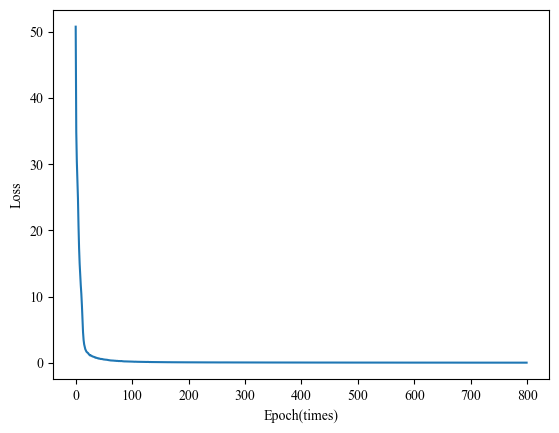

In [38]:
input_size = 500
output_size = 1
num_channels = [100, 100, 100, 100]  
kernel_size = 2
dropout = 0.3

# model = TCN(input_size, output_size, num_channels, kernel_size, dropout)
# model = TCN2_T(input_size, output_size, num_channels, kernel_size, dropout)
# model = TCN2_S(input_size, output_size, num_channels, kernel_size, dropout)
model = TCN2_N(input_size, output_size, num_channels, kernel_size, dropout)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)
EPOCHS = 800
train(model, optimizer, EPOCHS, criterion)

In [39]:
def test(model, x_test, y_test):
    preds1 = []
    preds2 = []
    preds3 = [] 
    y_true1 = []
    y_true2 = []
    y_true3 = []
    
    model.eval()
    with torch.no_grad():       
        x_test = torch.Tensor(x_test).float()
        y_test = torch.Tensor(y_test).float()
        y_test = y_test.squeeze()
        outputs1,outputs2,outputs3 = model(x_test) 
        detached_pred1 = outputs1.detach().cpu().numpy()
        detached_pred2 = outputs2.detach().cpu().numpy()
        detached_pred3 = outputs3.detach().cpu().numpy()       
        detached_label = y_test.detach().cpu().numpy()
        for f in range(0, len(detached_label)):
            preds1.append(detached_pred1[f])
            preds2.append(detached_pred2[f])
            preds3.append(detached_pred3[f])
            y_true1.append(detached_label[f][0])
            y_true2.append(detached_label[f][1])
            y_true3.append(detached_label[f][2])

        mse = MK.mean_squared_error(y_true1, preds1)
        r2 = MK.r2_score(y_true1, preds1)
        print('SO2 MSE:',mse)
        print('SO2 R2:',r2) 
        MSE = MK.mean_squared_error(y_true2, preds2)
        R2 = MK.r2_score(y_true2, preds2)
        print('CS2 MSE:',MSE)
        print('CS2 R2:',R2)  
        MMSE = MK.mean_squared_error(y_true3, preds3)
        RR2 = MK.r2_score(y_true3, preds3)
        print('NO MSE:',MMSE)
        print('NO R2:',RR2) 
        sor = np.argsort(y_test[:,0],axis=0)
        sor1 = np.argsort(y_test[:,1],axis=0)
        sor2 = np.argsort(y_test[:,2],axis=0)
        x_ = range(len(sor))
        plt.figure(1)
        plt.figure(figsize=(10,6))
        plt.scatter(x_, outputs1[sor])
        plt.scatter(x_,y_test[:,0][sor])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.xlabel('Number of data groups',fontsize=20)
        plt.ylabel('$\mathregular{SO_2}$ concentration (ppm)',fontsize=20)
        plt.figure(2)
        plt.figure(figsize=(10,6))
        plt.scatter(x_, outputs2[sor1])
        plt.scatter(x_,y_test[:,1][sor1])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.xlabel('Number of data groups',fontsize=20)
        plt.ylabel('$\mathregular{CS_2}$ concentration (ppm)',fontsize=20)
        plt.figure(3)
        plt.figure(figsize=(10,6))
        plt.scatter(x_, outputs3[sor2])
        plt.scatter(x_,y_test[:,2][sor2])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.xlabel('Number of data groups',fontsize=20)
        plt.ylabel('NO concentration (ppm)',fontsize=20)
        config = {
        "font.family": 'Times New Roman', 
        }
        rcParams.update(config)
        plt.show()
        result=np.c_[y_test[:,0][sor],y_test[:,1][sor1],y_test[:,2][sor2], outputs1[sor],outputs2[sor1],outputs3[sor2]]

SO2 MSE: 0.012727431
SO2 R2: 0.9989835804623377
CS2 MSE: 0.00068021036
CS2 R2: 0.9999451850488883
NO MSE: 0.023000125
NO R2: 0.9981176595437627


<Figure size 640x480 with 0 Axes>

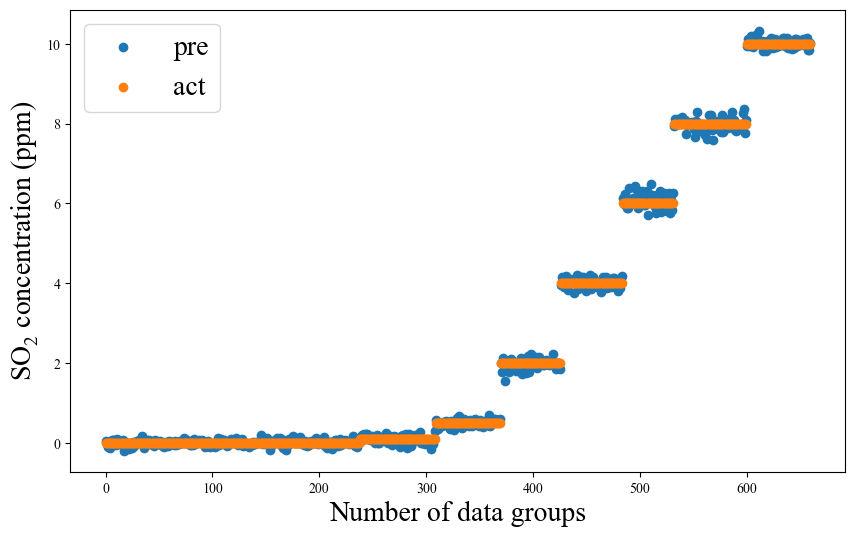

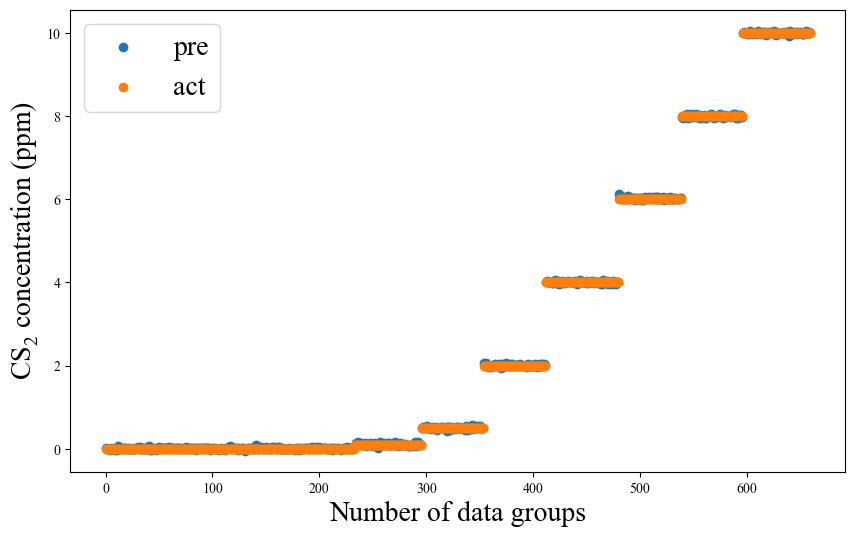

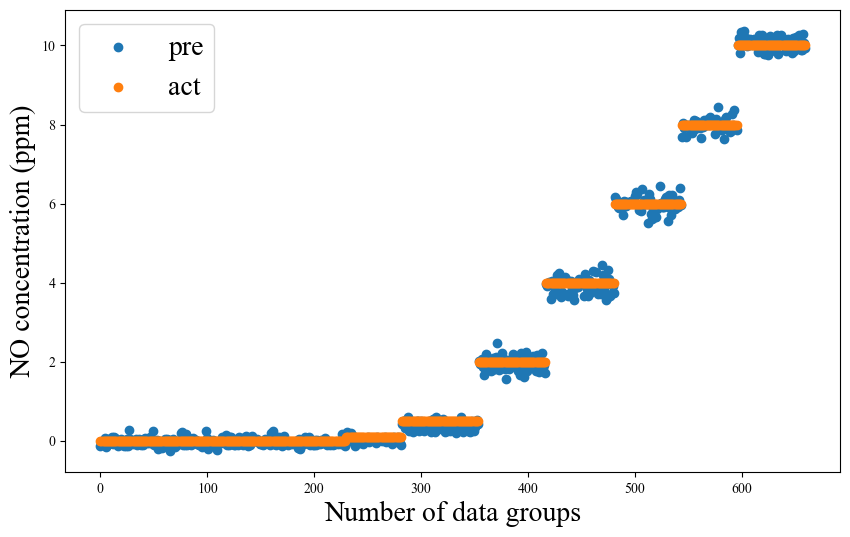

In [40]:
test(model, x_test, y_test)

In [ ]:
def test(model, x_test, y_test):
    preds1 = []
    preds2 = []
    preds3 = [] 
    y_true1 = []
    y_true2 = []
    y_true3 = []

    model.eval()
    with torch.no_grad():
        x_test = torch.Tensor(x_test).float()
        y_test = torch.Tensor(y_test).float()
        y_test = y_test.squeeze()
        outputs1,outputs2,outputs3 = model(x_test) 
        detached_pred1 = outputs1.detach().cpu().numpy()
        detached_pred2 = outputs2.detach().cpu().numpy()
        detached_pred3 = outputs3.detach().cpu().numpy()
        detached_label = y_test.detach().cpu().numpy()
        for f in range(0, len(detached_label)):
            preds1.append(detached_pred1[f])
            preds2.append(detached_pred2[f])
            preds3.append(detached_pred3[f])
            y_true1.append(detached_label[f][0])
            y_true2.append(detached_label[f][1])
            y_true3.append(detached_label[f][2]) 
            
        mse = MK.mean_squared_error(y_true1, preds1)
        r2 = MK.r2_score(y_true1, preds1)
        print('SO2 MSE:',mse)
        print('SO2 R2:',r2) 
        MSE = MK.mean_squared_error(y_true2, preds2)
        R2 = MK.r2_score(y_true2, preds2)
        print('CS2 MSE:',MSE)
        print('CS2 R2:',R2)  
        MMSE = MK.mean_squared_error(y_true3, preds3)
        RR2 = MK.r2_score(y_true3, preds3)
        print('NO MSE:',MMSE)
        print('NO R2:',RR2)           
        x_ = range(len(y_test))
        plt.figure(figsize=(22,6))
        plt.figure(1)
        plt.plot(x_, outputs1)
        plt.plot(x_,y_test[:,0])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.figure(2)
        plt.plot(x_, outputs2)
        plt.plot(x_,y_test[:,1])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.figure(3)
        plt.plot(x_, outputs3)
        plt.plot(x_,y_test[:,2])
        legend = plt.legend(['pre', 'act'],fontsize=20)
        plt.show()

In [ ]:
test(model, x_test, y_test)